In [15]:
import numpy as np
import pandas as pd
fnm_ = 'siRNA_screen_new_data_02052025.xlsx'
df = pd.read_excel(fnm_,sheet_name='screen_results')

df.sort_values(by=['gene','position'],inplace=True)




# Normalize the Standard Deviation

In [16]:
# Normalize Standard Deviation
# dict_max = {
#     'BCAM1':max(df[df['gene']=='BCAM1']['avg_raw_expression_percent']),
#     'GYS1':max(df[df['gene']=='GYS1']['avg_raw_expression_percent']),
#     'MLH1':max(df[df['gene']=='MLH1']['avg_raw_expression_percent']),
#     'MSH3':max(df[df['gene']=='MSH3']['avg_raw_expression_percent']),
# }

# dict_min = {
#     'BCAM1':min(df[df['gene']=='BCAM1']['avg_raw_expression_percent']),
#     'GYS1':min(df[df['gene']=='GYS1']['avg_raw_expression_percent']),
#     'MLH1':min(df[df['gene']=='MLH1']['avg_raw_expression_percent']),
#     'MSH3':min(df[df['gene']=='MSH3']['avg_raw_expression_percent']),
# }

# df['std_norm_expression_percent'] = df.apply(lambda x: 100*(x['std_raw_expression_percent']/(dict_max[x['gene']]-dict_min[x['gene']])),axis=1)
# df.to_csv('siRNA_screen_new_data_02052025_fixed.csv',index=False)


In [17]:
seq_df  = pd.read_excel('siRNA_screen_new_data_02052025.xlsx',sheet_name='target_sequences',header=None)
seq_df.columns = ['gene','seq']
seq_df.set_index('gene',inplace=True)
seq_df

seq_dict = seq_df.to_dict()['seq']
seq_dict


{'BCAM1': 'AGTCTCCGCCGCCGCCGTGAACATGGAGCCCCCGGACGCACCGGCCCAGGCGCGCGGGGCCCCGCGGCTGCTGTTGCTCGCAGTCCTGCTGGCGGCGCACCCAGATGCCCAGGCGGAGGTGCGCTTGTCTGTACCCCCGCTGGTGGAGGTGATGCGAGGAAAGTCTGTCATTCTGGACTGCACCCCTACGGGAACCCACGACCATTATATGCTGGAATGGTTCCTTACCGACCGCTCGGGAGCTCGCCCCCGCCTAGCCTCGGCTGAGATGCAGGGCTCTGAGCTCCAGGTCACAATGCACGACACCCGGGGCCGCAGTCCCCCATACCAGCTGGACTCCCAGGGGCGCCTGGTGCTGGCTGAGGCCCAGGTGGGCGACGAGCGAGACTACGTGTGCGTGGTGAGGGCAGGGGCGGCAGGCACTGCTGAGGCCACTGCGCGGCTCAACGTGTTTGCAAAGCCAGAGGCCACTGAGGTCTCCCCCAACAAAGGGACACTGTCTGTGATGGAGGACTCTGCCCAGGAGATCGCCACCTGCAACAGCCGGAACGGGAACCCGGCCCCCAAGATCACGTGGTATCGCAACGGGCAGCGCCTGGAGGTGCCCGTAGAGATGAACCCAGAGGGCTACATGACCAGCCGCACGGTCCGGGAGGCCTCGGGCCTGCTCTCCCTCACCAGCACCCTCTACCTGCGGCTCCGCAAGGATGACCGAGACGCCAGCTTCCACTGCGCCGCCCACTACAGCCTGCCCGAGGGCCGCCACGGCCGCCTGGACAGCCCCACCTTCCACCTCACCCTGCACTATCCCACGGAGCACGTGCAGTTCTGGGTGGGCAGCCCGTCCACCCCAGCAGGCTGGGTACGCGAGGGTGACACTGTCCAGCTGCTCTGCCGGGGGGACGGCAGCCCCAGCCCGGAGTATACGCTTTTCCGCCTTCAGGATGAGCAGGAGGAAGTGCTGAATGTGAATCTCGAGGGGAACTTGA

# Plot siRNA efficacy by Position in Target Gene

In [18]:
df

oligo  position   gene  Replicate_1  Replicate_2  Replicate_3  \
0    BCAM1_139       139  BCAM1     29.33086     22.71854     20.63844   
1    BCAM1_140       140  BCAM1     48.30093     45.66608     39.31965   
2    BCAM1_370       370  BCAM1     78.97290     72.99040     76.55842   
3    BCAM1_666       666  BCAM1     65.25128     74.51008     65.61525   
4    BCAM1_709       709  BCAM1     59.23448     67.82481     65.12263   
..         ...       ...    ...          ...          ...          ...   
115  MSH3_4010      4010   MSH3     54.60428     53.32035     59.08915   
116  MSH3_4035      4035   MSH3     65.19468     69.44057     66.70707   
117  MSH3_4036      4036   MSH3     83.31917     95.32704     82.90980   
118  MSH3_4068      4068   MSH3     88.64831     91.02084     83.15288   
119  MSH3_4069      4069   MSH3     66.10081     75.15333     77.84770   

     avg_raw_expression_percent  std_raw_expression_percent  \
0                     24.229280                    3.705968   
1                     44.428887                    3.769512   
2                     76.173907                    2.457433   
3                     68.458870                    4.281431   
4                     64.060640                    3.586485   
..                          ...                         ...   
115                   55.671260                    2.473001   
116                   67.114107                    1.757110   
117                   87.185337                    5.759479   
118                   87.607343                    3.295341   
119                   73.033947                    5.024354   

     normalized_expression_percent  std_norm_expression_percent  ...  \
0                         7.604094                     3.997113  ...   
1                        29.390607                     4.065650  ...   
2                        63.629556                     2.650492  ...   
3                        55.308416                     4.617785  ...   
4                        50.564656                     3.868243  ...   
..                             ...                          ...  ...   
115                      41.721688                     2.942242  ...   
116                      55.335765                     2.090514  ...   
117                      79.215425                     6.852315  ...   
118                      79.717505                     3.920618  ...   
119                      62.378870                     5.977703  ...   

    raw_prob_preds_6 raw_prob_preds_7 raw_prob_preds_8  raw_prob_preds_9  \
0           0.549941         0.536857         0.549759          0.533108   
1           0.530782         0.538165         0.541403          0.517564   
2           0.503699         0.509157         0.548767          0.504353   
3           0.441079         0.423224         0.444349          0.468941   
4           0.454132         0.446383         0.479126          0.423206   
..               ...              ...              ...               ...   
115         0.438566         0.445610         0.472277          0.421920   
116         0.464138         0.420784         0.452185          0.444067   
117         0.417311         0.435477         0.435652          0.440811   
118         0.456890         0.422349         0.430380          0.423178   
119         0.449837         0.424444         0.449796          0.424620   

    raw_prob_preds_10 raw_probabilities_mean raw_probabilities_std      aver  \
0            0.552188               0.541744              0.009811  0.541744   
1            0.524716               0.536304              0.010486  0.536304   
2            0.545508               0.521891              0.017571  0.521891   
3            0.456978               0.438936              0.015080  0.438936   
4            0.437169               0.444062              0.015241  0.444062   
..                ...                    ...                   ...       ...   
115          0.443915    

In [19]:
df_g_

oligo  position   gene  Replicate_1  Replicate_2  Replicate_3  \
0    BCAM1_139       139  BCAM1     29.33086     22.71854     20.63844   
1    BCAM1_140       140  BCAM1     48.30093     45.66608     39.31965   
2    BCAM1_370       370  BCAM1     78.97290     72.99040     76.55842   
3    BCAM1_666       666  BCAM1     65.25128     74.51008     65.61525   
4    BCAM1_709       709  BCAM1     59.23448     67.82481     65.12263   
5    BCAM1_748       748  BCAM1     66.72445     71.21383     62.66859   
6    BCAM1_793       793  BCAM1     64.30527     65.74098     63.04053   
7    BCAM1_795       795  BCAM1     38.45244     33.01304     34.99650   
8   BCAM1_1008      1008  BCAM1     97.26560     88.60484     83.23213   
9   BCAM1_1017      1017  BCAM1     21.79560     19.28832     20.65900   
10  BCAM1_1030      1030  BCAM1     60.09126     61.31311     44.68805   
11  BCAM1_1065      1065  BCAM1     44.86619     53.85981     60.86463   
12  BCAM1_1066      1066  BCAM1     46.71158     63.04497     53.63020   
13  BCAM1_1439      1439  BCAM1     71.93407     66.00230     80.46349   
14  BCAM1_1545      1545  BCAM1     84.35833     81.04824     78.98396   
15  BCAM1_1546      1546  BCAM1    109.39510    102.32150    117.96890   
16  BCAM1_1548      1548  BCAM1     79.50262     84.31656     69.79395   
17  BCAM1_1550      1550  BCAM1     29.10331     30.20890     36.99280   
18  BCAM1_1580      1580  BCAM1     58.64069     69.01365     61.32545   
19  BCAM1_1858      1858  BCAM1     20.26196     19.30814     19.01011   
20  BCAM1_1920      1920  BCAM1     14.91738     17.29551     19.32429   
21  BCAM1_1939      1939  BCAM1     55.39389     57.72958     62.17609   
22  BCAM1_1995      1995  BCAM1     58.41137     68.54388     63.70260   
23  BCAM1_1996      1996  BCAM1     67.64506     78.40566     74.48791   
24  BCAM1_1997      1997  BCAM1     77.53603     76.43224     69.99333   
25  BCAM1_2000      2000  BCAM1     71.32478     72.31143     75.88004   
26  BCAM1_2002      2002  BCAM1     60.39357     59.90941     58.27604   
27  BCAM1_2003      2003  BCAM1     60.38715     57.34173     57.45444   
28  BCAM1_2053      2053  BCAM1     89.39490     86.77522     84.67042   
29  BCAM1_2120      2120  BCAM1     24.48134     17.22601     23.70260   

    avg_raw_expression_percent  std_raw_expression_percent  \
0                    24.229280                    3.705968   
1                    44.428887                    3.769512   
2                    76.173907                    2.457433   
3                    68.458870                    4.281431   
4                    64.060640                    3.586485   
5                    66.868957                    3.490076   
6                    64.362260                    1.103190   
7                    35.487327                    2.247584   
8                    89.700857                    5.781321   
9                    20.580973                    1.025079   
10                   55.364140                    7.565598   
11                   53.196877                    6.548136   
12                   54.462250                    6.693984   
13                   72.799953                    5.935420   
14                   81.463510                    2.213640   
15                  109.895167                    6.397803   
16                   77.871043                    6.040038   
17                   32.101670                    3.487879   
18                   62.993263                    4.395890   
19                   19.526737                    0.533929   
20                   17.179060                    1.800997   
21                   58.433187                    2.813166   
22                   63.552617                    4.137939   
23                   73.512877                    4.446770   
24                   74.653867                    3.326163   
25                   73.172083                    1.956722   
26                   59.526340          

oligo  position   gene  Replicate_1  Replicate_2  Replicate_3  \
8   BCAM1_1008      1008  BCAM1     97.26560     88.60484     83.23213   
9   BCAM1_1017      1017  BCAM1     21.79560     19.28832     20.65900   
10  BCAM1_1030      1030  BCAM1     60.09126     61.31311     44.68805   
11  BCAM1_1065      1065  BCAM1     44.86619     53.85981     60.86463   
12  BCAM1_1066      1066  BCAM1     46.71158     63.04497     53.63020   
0    BCAM1_139       139  BCAM1     29.33086     22.71854     20.63844   
1    BCAM1_140       140  BCAM1     48.30093     45.66608     39.31965   
13  BCAM1_1439      1439  BCAM1     71.93407     66.00230     80.46349   
14  BCAM1_1545      1545  BCAM1     84.35833     81.04824     78.98396   
15  BCAM1_1546      1546  BCAM1    109.39510    102.32150    117.96890   
16  BCAM1_1548      1548  BCAM1     79.50262     84.31656     69.79395   
17  BCAM1_1550      1550  BCAM1     29.10331     30.20890     36.99280   
18  BCAM1_1580      1580  BCAM1     58.64069     69.01365     61.32545   
19  BCAM1_1858      1858  BCAM1     20.26196     19.30814     19.01011   
20  BCAM1_1920      1920  BCAM1     14.91738     17.29551     19.32429   
21  BCAM1_1939      1939  BCAM1     55.39389     57.72958     62.17609   
22  BCAM1_1995      1995  BCAM1     58.41137     68.54388     63.70260   
23  BCAM1_1996      1996  BCAM1     67.64506     78.40566     74.48791   
24  BCAM1_1997      1997  BCAM1     77.53603     76.43224     69.99333   
25  BCAM1_2000      2000  BCAM1     71.32478     72.31143     75.88004   
26  BCAM1_2002      2002  BCAM1     60.39357     59.90941     58.27604   
27  BCAM1_2003      2003  BCAM1     60.38715     57.34173     57.45444   
28  BCAM1_2053      2053  BCAM1     89.39490     86.77522     84.67042   
29  BCAM1_2120      2120  BCAM1     24.48134     17.22601     23.70260   
2    BCAM1_370       370  BCAM1     78.97290     72.99040     76.55842   
3    BCAM1_666       666  BCAM1     65.25128     74.51008     65.61525   
4    BCAM1_709       709  BCAM1     59.23448     67.82481     65.12263   
5    BCAM1_748       748  BCAM1     66.72445     71.21383     62.66859   
6    BCAM1_793       793  BCAM1     64.30527     65.74098     63.04053   
7    BCAM1_795       795  BCAM1     38.45244     33.01304     34.99650   

    avg_raw_expression_percent  std_raw_expression_percent  \
8                    89.700857                    5.781321   
9                    20.580973                    1.025079   
10                   55.364140                    7.565598   
11                   53.196877                    6.548136   
12                   54.462250                    6.693984   
0                    24.229280                    3.705968   
1                    44.428887                    3.769512   
13                   72.799953                    5.935420   
14                   81.463510                    2.213640   
15                  109.895167                    6.397803   
16                   77.871043                    6.040038   
17                   32.101670                    3.487879   
18                   62.993263                    4.395890   
19                   19.526737                    0.533929   
20                   17.179060                    1.800997   
21                   58.433187                    2.813166   
22                   63.552617                    4.137939   
23                   73.512877                    4.446770   
24                   74.653867                    3.326163   
25                   73.172083                    1.956722   
26                   59.526340                    0.905921   
27                   58.394440                    1.409810   
28                   86.946847                    1.932575   
29                   21.803317                    3.252221   
2                    76.173907                    2.457433   
3                    68.458870                    4.281431   
4                    64.060640          

2409 BCAM1


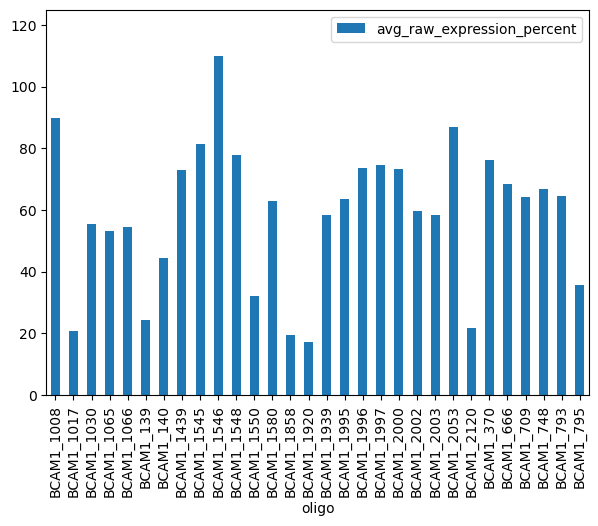

In [21]:
for g_ in list(df['gene'].value_counts().index)[0:1]:
    df_g_ = df[df['gene'] == g_].copy()
    df_g_.sort_values(by='oligo',inplace=True)
    display(df_g_)
    gene_length_ = len(seq_dict[g_])
    print(gene_length_,g_)


    
    from matplotlib import pyplot as plt
    fig, ax = plt.subplots()
    fig.set_size_inches(w=7, h=5)
    
    df_g_.plot.bar(
        x='oligo',
        y='avg_raw_expression_percent',
        # y='normalized_expression_percent',
        # alpha=0.6,
        # c='color',
        ax=ax,
    )
    # ax.set_xlim(0,gene_length_)
    ax.set_ylim(0,125)

    
    

In [22]:

for_plotting_by_gene_dict = {}

for gene_ in list(df['gene'].value_counts().index):
    
    pos_ls_gene_ = list(range(1,len(seq_dict[gene_])+1))
    
    expr_ls_gene_ = []
    stdev_ls_gene_ = []
    norm_expr_ls_gene_ = []
    norm_stdev_ls_gene_ = []

    # Loop through all positions in the given gene
    for pos_ct_ in pos_ls_gene_:
        if pos_ct_ in list(df[df['gene'] == gene_]['position']): # Check if position has a corresponding oligo
            
            # If it does,find the index in the dataframe
            row_ = (df[df['gene'] == gene_])['position'] [ (df[df['gene'] == gene_])['position'] == pos_ct_ ].index[0]
            #print(df.at[row_,'position'],pos_ct_)
            #print('HERE!')

            # Use the index to get the data
            expr_ls_gene_.append( df.at[row_,'avg_raw_expression_percent'])
            stdev_ls_gene_.append( df.at[row_,'std_raw_expression_percent'])
            norm_expr_ls_gene_.append( df.at[row_,'normalized_expression_percent'])
            norm_stdev_ls_gene_.append( df.at[row_,'std_norm_expression_percent'])
           
        else: # If position does not have corresponding oligo add zero values to all the data lists
            expr_ls_gene_.append(0)
            stdev_ls_gene_.append(0)
            norm_expr_ls_gene_.append(0)
            norm_stdev_ls_gene_.append(0)
            
        
    for_plotting_by_gene_dict[gene_] = {
        'positions':pos_ls_gene_,
        'raw_expression_percents':expr_ls_gene_,
        'raw_stdev_percents':stdev_ls_gene_,
        'norm_expression_percents':norm_expr_ls_gene_,
        'norm_stdev_percents':norm_stdev_ls_gene_,
    }
    print("All data added to 'for_plotting_by_gene_dict' for gene:",gene_)
        
        

All data added to 'for_plotting_by_gene_dict' for gene: BCAM1
All data added to 'for_plotting_by_gene_dict' for gene: GYS1
All data added to 'for_plotting_by_gene_dict' for gene: MLH1
All data added to 'for_plotting_by_gene_dict' for gene: MSH3


# TODO: Make position-based plot


Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	plot_experimental_eval_efficacy_by_position_siRNA_screen_new_data_02052025.png
	plot_experimental_eval_efficacy_by_position_siRNA_screen_new_data_02052025.svg


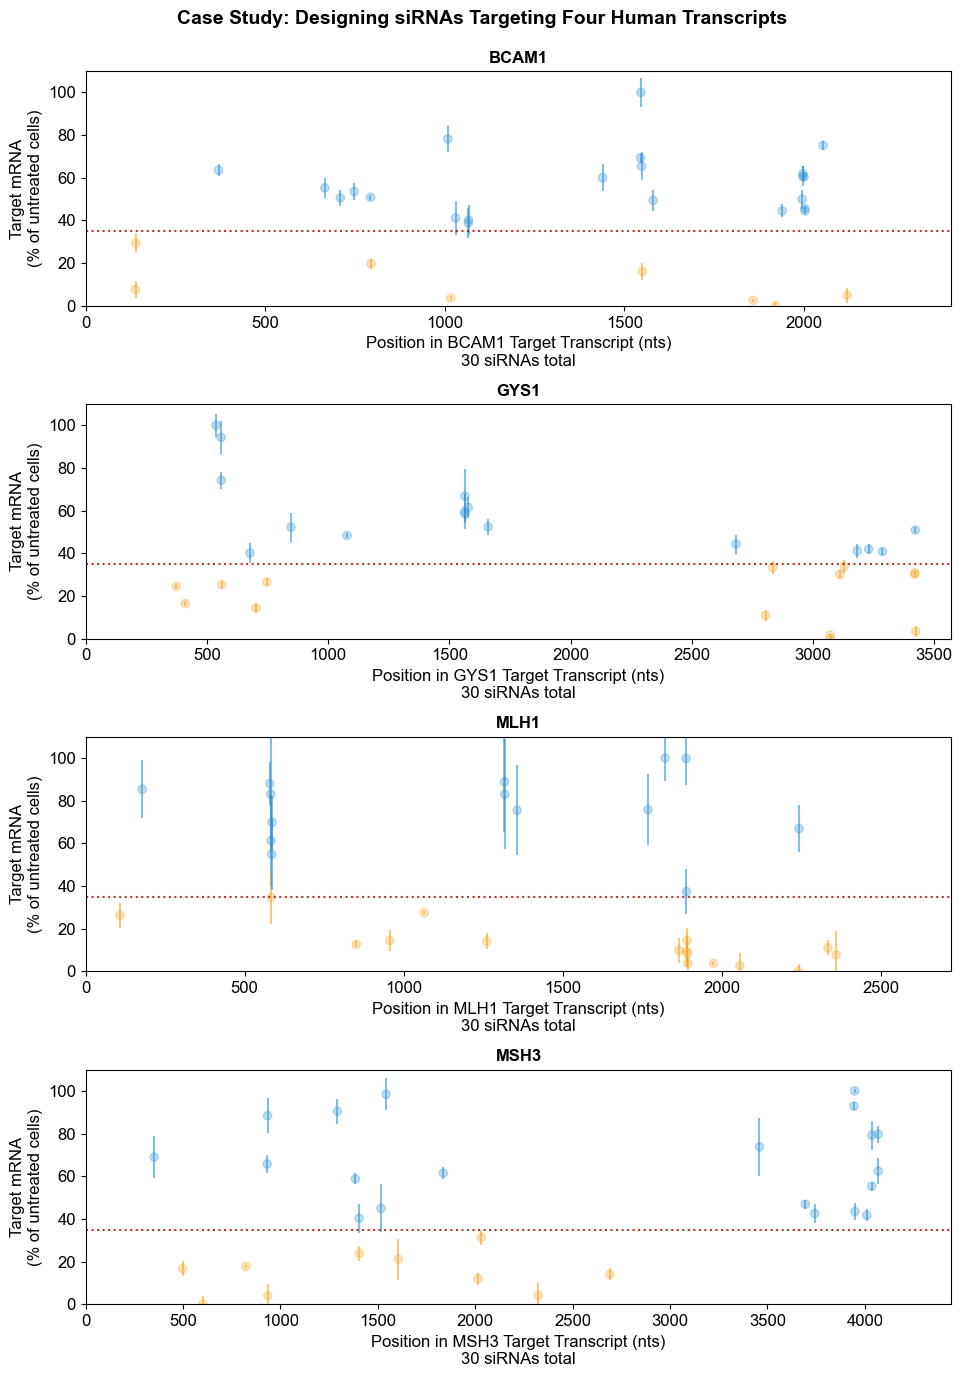

In [24]:
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt



## Update Plot Fonts
params = {'legend.fontsize': 12,
          'legend.title_fontsize':12,
          # 'figure.figsize': (6,4),
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize':12,
          'ytick.labelsize':12,
          'font.family':'Arial',
         }
pylab.rcParams.update(params)



## Make Plot and Axis
fig,axs = plt.subplots(4)
fig.set_size_inches(w=9.75,h=3.5*4)

ax_row_ = 0
for gene_ in list(df['gene'].value_counts().index):#[0:1]:
    ## Colors
    class_color_dict = {1:'#F4A624',0:'#3294D5'}
    colors_ls= [class_color_dict[int(x < 35)] for x in list(df[df['gene'] == gene_]['normalized_expression_percent'])]
    
    
    ## Plot scatter
    axs[ax_row_].scatter(
        # x=for_plotting_by_gene_dict[gene_]['positions'],
        # y=for_plotting_by_gene_dict[gene_]['norm_expression_percents'],
        x=df[df['gene'] == gene_]['position'],
        y=df[df['gene'] == gene_]['normalized_expression_percent'],
        alpha=0.3,
        color=colors_ls,
    )
    
    plot_line = axs[ax_row_].errorbar(
        x=df[df['gene'] == gene_]['position'],
        y=df[df['gene'] == gene_]['normalized_expression_percent'],
        yerr=df[df['gene'] == gene_]['std_norm_expression_percent'],
        fmt=" ",# remove marker
        linestyle=None,# remove connecting lines
        ## color='grey',# OLD change all colors (cannot be a list)
        ecolor=colors_ls,# change color for edges only (can have different colors)
        alpha=0.6,
        zorder=-1,
    )
    
    ## Axes
    axs[ax_row_].set_ylim(0,110)
    axs[ax_row_].set_xlim(0,len(seq_dict[gene_])+1)
    axs[ax_row_].set_ylabel('Target mRNA\n(% of untreated cells)')
    axs[ax_row_].set_xlabel('Position in '+gene_+' Target Transcript (nts)\n' + str(len(df[df['gene'] == gene_])) + ' siRNAs total')
    # axs[ax_row_].tick_params(axis='x',bottom=False,labelbottom=False)  # remove x-axis ticks and labels
    
    
    ## Title
    axs[ax_row_].set_title(gene_,fontweight='bold')
    axs[ax_row_].axhline(y=35,xmin=0,xmax=100,linestyle='dotted',color='#AD0000',alpha=0.8)

    ax_row_+=1


fig.suptitle('Case Study: Designing siRNAs Targeting Four Human Transcripts\n',
             fontweight='bold',fontsize=14)#,y=0.93)#,ha='center',x=0)
    
    

## Save Figure
fnm_final_ = 'plot_experimental_eval_efficacy_by_position_'+fnm_.replace('.xlsx','')

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')



# Try Plotting all Together 
## Using a common gene position coordinate

### Generate a Position coordinate for each oligo based off of `max_rounded_gene_coordinate_`

In [25]:
# Normalize Position
dict_max_posn = {
    'BCAM1':max(df[df['gene']=='BCAM1']['position']),
    'GYS1':max(df[df['gene']=='GYS1']['position']),
    'MLH1':max(df[df['gene']=='MLH1']['position']),
    'MSH3':max(df[df['gene']=='MSH3']['position']),
}

dict_min_posn = {
    'BCAM1':min(df[df['gene']=='BCAM1']['position']),
    'GYS1':min(df[df['gene']=='GYS1']['position']),
    'MLH1':min(df[df['gene']=='MLH1']['position']),
    'MSH3':min(df[df['gene']=='MSH3']['position']),
}

df['position_normalized'] = df.apply(lambda x: int(np.round(1000*(
    
   ( x['position']- dict_min_posn[x['gene']])/( dict_max_posn[x['gene']] - dict_min_posn[x['gene']] )

)))
                                     ,axis=1)


display(df[['position','position_normalized']])

for gene_ in list(df['gene'].value_counts().index):#[0:1]:
    print(gene_,
          min(df[df['gene'] == gene_]['position']),
          min(df[df['gene'] == gene_]['position_normalized']),
          max(df[df['gene'] == gene_]['position']),
          max(df[df['gene'] == gene_]['position_normalized']),
          
         )


position  position_normalized
0         139                    0
1         140                    1
2         370                  117
3         666                  266
4         709                  288
..        ...                  ...
115      4010                  984
116      4035                  991
117      4036                  991
118      4068                 1000
119      4069                 1000

[120 rows x 2 columns]

BCAM1 139 0 2120 1000
GYS1 374 0 3423 1000
MLH1 108 0 2360 1000
MSH3 352 0 4069 1000


Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	plot_experimental_eval_efficacy_common_position_coordinate_siRNA_screen_new_data_02052025.png
	plot_experimental_eval_efficacy_common_position_coordinate_siRNA_screen_new_data_02052025.svg


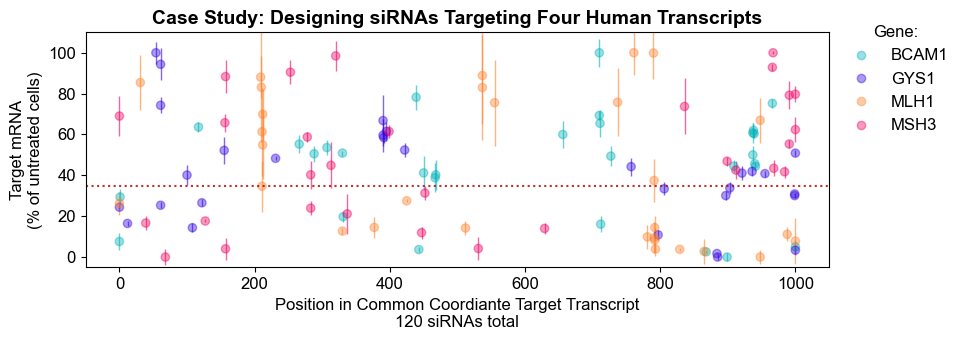

In [27]:
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt
import numpy as np


## Update Plot Fonts
params = {'legend.fontsize': 12,
          'legend.title_fontsize':12,
          # 'figure.figsize': (6,4),
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize':12,
          'ytick.labelsize':12,
          'font.family':'Arial',
         }
pylab.rcParams.update(params)



## Make Plot and Axis
fig,ax = plt.subplots()
fig.set_size_inches(w=9.75,h=3.5)

## Colors
gene_color_dict = {
    'BCAM1':'#00B2BA',
    'GYS1':'#3000E0',
    'MLH1':'#FF812C',
    'MSH3':'#EE0063',
}
colors_ls= df['gene'].apply(lambda x: gene_color_dict[x])


## Plot scatter
ax.scatter(
    # x=for_plotting_by_gene_dict[gene_]['positions'],
    # y=for_plotting_by_gene_dict[gene_]['norm_expression_percents'],
    x=df['position_normalized'],
    y=df['normalized_expression_percent'],
    alpha=0.4,
    color=colors_ls,
)

plot_line = ax.errorbar(
    x=df['position_normalized'],
    y=df['normalized_expression_percent'],
    yerr = df['std_norm_expression_percent'],
    fmt=" ",# remove marker
    linestyle=None,# remove connecting lines
    elinewidth=1,
    ## color='grey',# OLD change all colors (cannot be a list)
    ecolor=colors_ls,# change color for edges only (can have different colors)
    alpha=0.6,
    zorder=-1,
)
    
## Axes
ax.set_ylim(-5,110)
ax.set_xlim(-50,1050)
ax.set_ylabel('Target mRNA\n(% of untreated cells)')
ax.set_xlabel('Position in Common Coordiante Target Transcript\n' + str(len(df)) + ' siRNAs total')
# ax.tick_params(axis='x',bottom=False,labelbottom=False)  # remove x-axis ticks and labels

    

ax.set_title('Case Study: Designing siRNAs Targeting Four Human Transcripts',
             fontweight='bold',fontsize=14)#,y=0.93)#,ha='center',x=0)

## Legend
import matplotlib.lines as mlines
handles = []
for gene_ in list(df['gene'].value_counts().index):
    handles.append(
        mlines.Line2D([],[],color=gene_color_dict[gene_],
                      marker='o',linestyle='None', alpha= 0.4,label=gene_))
# Move legend to outside of plot:
#   Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0,box.y0,box.width * 0.8,box.height])

# Put a legend to the right of the current axis
ax.legend(title='Gene:',frameon=False,handles = handles,loc='center left',bbox_to_anchor=(1,0.8))

ax.axhline(y=35,xmin=0,xmax=100,linestyle='dotted',color='#AD0000',alpha=0.8)


## Save Figure
fnm_final_ = 'plot_experimental_eval_efficacy_common_position_coordinate_'+fnm_.replace('.xlsx','')

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')



In [28]:
mlines.Line2D([],[],color='red',marker='o',linestyle='None',markersize=10,label='Red Points')

In [29]:
handles

In [30]:
df['position'].apply(lambda x: x/(max_rounded_gene_coordinate_))

NameError: name 'max_rounded_gene_coordinate_' is not defined

In [31]:
pl_ = plot_line[0]
pl_.get

AttributeError: 'Line2D' object has no attribute 'get'

In [32]:
plot_line[0].get_children()

[]

In [33]:
plot_line[2][0]

In [34]:
plot_line#.set_markerfacecolor        
plot_line.get_marker()

elines = plot_line.get_children()
elines
# elines[1].set_color('green')
# pl.xlim(1.3,3.6)
# pl.ylim(24.0,29.0)
# pl.show()

AttributeError: 'ErrorbarContainer' object has no attribute 'get_marker'

# Load in old data that were scored improperly

In [35]:
df_old_scores = pd.read_excel('second_round_scores_all_4_genes_ssrf_MSH3_BCAM1_MLH1_GYS1.xlsx',sheet_name='scores')
df_old_scores


Oligo_position                Oligo_ID Target_Region_Sequence_20mer  \
0               2057  MLH1_XM_005265161_2057         UCAGUAAAGAAUGCGCUAUG   
1                139    BCAM_NM_00000000_139         GCUGGUGGAGGUGAUGCGAG   
2                583   MLH1_XM_005265161_583         GUACACAAUGCAGGCAUUAG   
3                584   MLH1_XM_005265161_584         UACACAAUGCAGGCAUUAGU   
4               1822  MLH1_XM_005265161_1822         ACAGAGGAAGAUGGUCCCAA   
...              ...                     ...                          ...   
9323            3813     MSH3_NM_002439_3813         UUUUUAUUUGUUUCAGUUCA   
9324             154      MSH3_NM_002439_154         AUUCUUCCAGUCUACGGGAA   
9325            2233     MSH3_NM_002439_2233         UCAAGGUGUUAUUGACGAGA   
9326             156      MSH3_NM_002439_156         UCUUCCAGUCUACGGGAAGC   
9327            1482     MSH3_NM_002439_1482         UCCAGGCAGUUACAGAGUUU   

                                        Gene_region  GC_content  \
0     AATGTTTTGAAAGCCTCAGTAAAGAATGCGCTATGTTCTATTCCA          40   
1     CTTGTCTGTACCCCCGCTGGTGGAGGTGATGCGAGGAAAGTCTGT          65   
2     GTTGGCAGGTATTCAGTACACAATGCAGGCATTAGTTTCTCAGTT          45   
3     TTGGCAGGTATTCAGTACACAATGCAGGCATTAGTTTCTCAGTTA          40   
4     CCAGAGAGTGGCTGGACAGAGGAAGATGGTCCCAAAGAAGGACTT          50   
...                                             ...         ...   
9323  AAAATTTACTTGATATTTTTATTTGTTTCAGTTCAGATAATTGGC          20   
9324  AGCGGTTTTGAGCCGATTCTTCCAGTCTACGGGAAGCCTGAAATC          45   
9325  GAGGAAGGATGAAATTCAAGGTGTTATTGACGAGATCCGAATGCA          40   
9326  CGGTTTTGAGCCGATTCTTCCAGTCTACGGGAAGCCTGAAATCCA          55   
9327  AATACAGCCATGCTTTCCAGGCAGTTACAGAGTTTTATGCAAAAG          45   

             Revcomp_Guide            Oligo_ID_sense  \
0     CAUAGCGCAUUCUUUACUGA  MLH1_XM_005265161_2057_s   
1     CUCGCAUCACCUCCACCAGC    BCAM_NM_00000000_139_s   
2     CUAAUGCCUGCAUUGUGUAC   MLH1_XM_005265161_583_s   
3     ACUAAUGCCUGCAUUGUGUA   MLH1_XM_005265161_584_s   
4     UUGGGACCAUCUUCCUCUGU  MLH1_XM_005265161_1822_s   
...                    ...                       ...   
9323  UGAACUGAAACAAAUAAAAA     MSH3_NM_002439_3813_s   
9324  UUCCCGUAGACUGGAAGAAU      MSH3_NM_002439_154_s   
9325  UCUCGUCAAUAACACCUUGA     MSH3_NM_002439_2233_s   
9326  GCUUCCCGUAGACUGGAAGA      MSH3_NM_002439_156_s   
9327  AAACUCUGUAACUGCCUGGA     MSH3_NM_002439_1482_s   

             Oligo_ID_antisense  Score Region  ...  raw_prob_preds_6  \
0     MLH1_XM_005265161_2057_as    133    ORF  ...          0.569503   
1       BCAM_NM_00000000_139_as     34    NaN  ...          0.549941   
2      MLH1_XM_005265161_583_as     67    ORF  ...          0.535464   
3      MLH1_XM_005265161_584_as    121    ORF  ...          0.530242   
4     MLH1_XM_005265161_1822_as     20    ORF  ...          0.533276   
...                         ...    ...    ...  ...               ...   
9323     MSH3_NM_002439_3813_as     27   3UTR  ...          0.460394   
9324      MSH3_NM_002439_154_as    -19    ORF  ...          0.470517   
9325     MSH3_NM_002439_2233_as     21    ORF  ...          0.466575   
9326      MSH3_NM_002439_156_as     97    ORF  ...          0.474750   
9327     MSH3_NM_002439_1482_as     76    ORF  ...          0.523753   

     raw_prob_preds_7  raw_prob_preds_8  raw_prob_preds_9 raw_prob_preds_10  \
0            0.534026          0.537983          0.568142          0.538343   
1            0.536857          0.549759          0.533108          0.552188   
2            0.507185          0.558606          0.542799          0.543109   
3            0.539265          0.550932          0.525023          0.547155   
4            0.561365          0.534383          0.534370          0.519792   
...               ...               ...               ...               ...   
9323         0.463809          0.463187          0.457249          0.441039   
9324         0.499725          0.482829          0.459914          0.472861   
9325         0.497953      

In [36]:
df_old_scores['oligo_id_new'] = df_old_scores.apply(lambda x: x['gene'].replace('BCAM','BCAM1') + '_'+str(x['Oligo_position']),axis = 1)
df_old_scores
                                                    

Oligo_position                Oligo_ID Target_Region_Sequence_20mer  \
0               2057  MLH1_XM_005265161_2057         UCAGUAAAGAAUGCGCUAUG   
1                139    BCAM_NM_00000000_139         GCUGGUGGAGGUGAUGCGAG   
2                583   MLH1_XM_005265161_583         GUACACAAUGCAGGCAUUAG   
3                584   MLH1_XM_005265161_584         UACACAAUGCAGGCAUUAGU   
4               1822  MLH1_XM_005265161_1822         ACAGAGGAAGAUGGUCCCAA   
...              ...                     ...                          ...   
9323            3813     MSH3_NM_002439_3813         UUUUUAUUUGUUUCAGUUCA   
9324             154      MSH3_NM_002439_154         AUUCUUCCAGUCUACGGGAA   
9325            2233     MSH3_NM_002439_2233         UCAAGGUGUUAUUGACGAGA   
9326             156      MSH3_NM_002439_156         UCUUCCAGUCUACGGGAAGC   
9327            1482     MSH3_NM_002439_1482         UCCAGGCAGUUACAGAGUUU   

                                        Gene_region  GC_content  \
0     AATGTTTTGAAAGCCTCAGTAAAGAATGCGCTATGTTCTATTCCA          40   
1     CTTGTCTGTACCCCCGCTGGTGGAGGTGATGCGAGGAAAGTCTGT          65   
2     GTTGGCAGGTATTCAGTACACAATGCAGGCATTAGTTTCTCAGTT          45   
3     TTGGCAGGTATTCAGTACACAATGCAGGCATTAGTTTCTCAGTTA          40   
4     CCAGAGAGTGGCTGGACAGAGGAAGATGGTCCCAAAGAAGGACTT          50   
...                                             ...         ...   
9323  AAAATTTACTTGATATTTTTATTTGTTTCAGTTCAGATAATTGGC          20   
9324  AGCGGTTTTGAGCCGATTCTTCCAGTCTACGGGAAGCCTGAAATC          45   
9325  GAGGAAGGATGAAATTCAAGGTGTTATTGACGAGATCCGAATGCA          40   
9326  CGGTTTTGAGCCGATTCTTCCAGTCTACGGGAAGCCTGAAATCCA          55   
9327  AATACAGCCATGCTTTCCAGGCAGTTACAGAGTTTTATGCAAAAG          45   

             Revcomp_Guide            Oligo_ID_sense  \
0     CAUAGCGCAUUCUUUACUGA  MLH1_XM_005265161_2057_s   
1     CUCGCAUCACCUCCACCAGC    BCAM_NM_00000000_139_s   
2     CUAAUGCCUGCAUUGUGUAC   MLH1_XM_005265161_583_s   
3     ACUAAUGCCUGCAUUGUGUA   MLH1_XM_005265161_584_s   
4     UUGGGACCAUCUUCCUCUGU  MLH1_XM_005265161_1822_s   
...                    ...                       ...   
9323  UGAACUGAAACAAAUAAAAA     MSH3_NM_002439_3813_s   
9324  UUCCCGUAGACUGGAAGAAU      MSH3_NM_002439_154_s   
9325  UCUCGUCAAUAACACCUUGA     MSH3_NM_002439_2233_s   
9326  GCUUCCCGUAGACUGGAAGA      MSH3_NM_002439_156_s   
9327  AAACUCUGUAACUGCCUGGA     MSH3_NM_002439_1482_s   

             Oligo_ID_antisense  Score Region  ...  raw_prob_preds_7  \
0     MLH1_XM_005265161_2057_as    133    ORF  ...          0.534026   
1       BCAM_NM_00000000_139_as     34    NaN  ...          0.536857   
2      MLH1_XM_005265161_583_as     67    ORF  ...          0.507185   
3      MLH1_XM_005265161_584_as    121    ORF  ...          0.539265   
4     MLH1_XM_005265161_1822_as     20    ORF  ...          0.561365   
...                         ...    ...    ...  ...               ...   
9323     MSH3_NM_002439_3813_as     27   3UTR  ...          0.463809   
9324      MSH3_NM_002439_154_as    -19    ORF  ...          0.499725   
9325     MSH3_NM_002439_2233_as     21    ORF  ...          0.497953   
9326      MSH3_NM_002439_156_as     97    ORF  ...          0.507113   
9327     MSH3_NM_002439_1482_as     76    ORF  ...          0.477490   

     raw_prob_preds_8  raw_prob_preds_9  raw_prob_preds_10  \
0            0.537983          0.568142           0.538343   
1            0.549759          0.533108           0.552188   
2            0.558606          0.542799           0.543109   
3            0.550932          0.525023           0.547155   
4            0.534383          0.534370           0.519792   
...               ...               ...                ...   
9323         0.463187          0.457249           0.441039   
9324         0.482829          0.459914           0.472861   
9325         0.445332          0.482948           0.510923   
9326         0.490302          0.501773           0.465218   
9327         0.462518          0.460254           0.4682

In [37]:
df_old_exps = pd.read_excel('second_round_scores_all_4_genes_ssrf_MSH3_BCAM1_MLH1_GYS1.xlsx',sheet_name='screening_results')
df_old_exps



gene  oligo_name  position  replicate_1  replicate_2  replicate_3  \
0    MSH3    MSH3_177       177    80.379202    90.750826    88.613403   
1    MSH3    MSH3_180       180   106.560090   102.077136   106.502855   
2    MSH3    MSH3_785       785    68.726577    72.291595    75.143417   
3    MSH3    MSH3_786       786   101.306418    96.679259   104.624327   
4    MSH3    MSH3_998       998    86.034008    81.446960    80.392671   
..    ...         ...       ...          ...          ...          ...   
79  BCAM1  BCAM1_1421      1421    55.796746    53.959586    58.710003   
80  BCAM1  BCAM1_2123      2123    52.229672    65.251239    59.937506   
81  BCAM1  BCAM1_2124      2124    43.391651    43.351126    41.137934   
82  BCAM1  BCAM1_2127      2127    15.332125    16.295715    14.423762   
83  BCAM1  BCAM1_2158      2158    62.717274    65.186601    67.992226   

    avg_expression_percent  stdev_expression_percent       NTC_1       NTC_2  \
0                86.581143                  5.476331  104.567149  101.784531   
1               105.046694                  2.571871  104.567149  101.784531   
2                72.053863                  3.215019  104.567149  101.784531   
3               100.870001                  3.990473  104.567149  101.784531   
4                82.624546                  2.999367  104.567149  101.784531   
..                     ...                       ...         ...         ...   
79               56.155445                  2.395436   79.894648   84.324944   
80               59.139472                  6.547362   79.894648   84.324944   
81               42.626904                  1.289645   79.894648   84.324944   
82               15.350534                  0.936112   79.894648   84.324944   
83               65.298700                  2.639262   79.894648   84.324944   

         NTC_3     NTC_avg  NTC_stdev       UNT_1       UNT_2       UNT_3  \
0   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
1   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
2   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
3   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
4   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
..         ...         ...        ...         ...         ...         ...   
79   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
80   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
81   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
82   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
83   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   

      UNT_avg  UNT_stdev  
0   95.470607  10.877360  
1   95.470607  10.877360  
2   95.470607  10.877360  
3   95.470607  10.877360  
4   95.470607  10.877360  
..        ...        ...  
79  89.659067  15.237465  
80  89.659067  15.237465  
81  89.659067  15.237465  
82  89.659067  15.237465  
83  89.659067  15.237465  

[84 rows x 18 columns]

## Select only though from scores that have screening data for

In [38]:
df_old_scores['oligo_id_new'].isin(df_old_exps['oligo_name']).value_counts()





False    9250
True       78
Name: oligo_id_new, dtype: int64

In [39]:
df_old_exps['oligo_name'].isin(df_old_scores['oligo_id_new']).value_counts()


True     78
False     6
Name: oligo_name, dtype: int64

# TODO: find missing MLH1 scores (6 oligos)

In [40]:
df_old_exps[~df_old_exps['oligo_name'].isin(df_old_scores['oligo_id_new'])
]

gene oligo_name  position  replicate_1  replicate_2  replicate_3  \
21  MLH1   MLH1_422       422    79.203283    73.234841    75.653879   
22  MLH1   MLH1_423       423    27.016540    26.527845    26.838918   
23  MLH1   MLH1_424       424    17.892877    19.562938    17.491094   
29  MLH1   MLH1_724       724    61.434407    62.304718    61.226658   
30  MLH1   MLH1_725       725    76.018187    79.069525    73.067422   
41  MLH1  MLH1_2464      2464    48.702588    45.131057    49.532716   

    avg_expression_percent  stdev_expression_percent      NTC_1      NTC_2  \
21               76.030667                  3.002008  93.791357  97.093312   
22               26.794434                  0.247366  93.791357  97.093312   
23               18.315636                  1.098717  93.791357  97.093312   
29               61.655261                  0.571958  93.791357  97.093312   
30               76.051711                  3.001192  93.791357  97.093312   
41               47.788787                  2.338787  93.791357  97.093312   

         NTC_3    NTC_avg  NTC_stdev      UNT_1       UNT_2      UNT_3  \
21  105.947593  98.944087   6.285901  92.702293  102.395938  98.360583   
22  105.947593  98.944087   6.285901  92.702293  102.395938  98.360583   
23  105.947593  98.944087   6.285901  92.702293  102.395938  98.360583   
29  105.947593  98.944087   6.285901  92.702293  102.395938  98.360583   
30  105.947593  98.944087   6.285901  92.702293  102.395938  98.360583   
41  105.947593  98.944087   6.285901  92.702293  102.395938  98.360583   

      UNT_avg  UNT_stdev  
21  97.819605   4.869413  
22  97.819605   4.869413  
23  97.819605   4.869413  
29  97.819605   4.869413  
30  97.819605   4.869413  
41  97.819605   4.869413

In [41]:
df_old_scores[df_old_scores['Oligo_position'] == 424]

Oligo_position               Oligo_ID Target_Region_Sequence_20mer  \
1070             424  GYS1_NM_001161587_424         AGGUGGAACUGCUGGAGGCC   
3072             424   BCAM_NM_00000000_424         UGCUGAGGCCACUGCGCGGC   
7865             424     MSH3_NM_002439_424         UGGCAACUCUGAGCCAAAGA   

                                        Gene_region  GC_content  \
1070  AGGGCGTGAGGACCCAGGTGGAACTGCTGGAGGCCCCCACCCCGG          65   
3072  AGGGGCGGCAGGCACTGCTGAGGCCACTGCGCGGCTCAACGTGTT          75   
7865  TGATCTGGGAATGTCTGGCAACTCTGAGCCAAAGAAATGTCTGAG          50   

             Revcomp_Guide           Oligo_ID_sense        Oligo_ID_antisense  \
1070  GGCCUCCAGCAGUUCCACCU  GYS1_NM_001161587_424_s  GYS1_NM_001161587_424_as   
3072  GCCGCGCAGUGGCCUCAGCA   BCAM_NM_00000000_424_s   BCAM_NM_00000000_424_as   
7865  UCUUUGGCUCAGAGUUGCCA     MSH3_NM_002439_424_s     MSH3_NM_002439_424_as   

      Score Region  ...  raw_prob_preds_7 raw_prob_preds_8  raw_prob_preds_9  \
1070   -100    ORF  ...          0.486837         0.502499          0.517229   
3072      1    NaN  ...          0.481497         0.472234          0.484460   
7865    -14    ORF  ...          0.458876         0.481445          0.472993   

      raw_prob_preds_10 raw_probabilities_mean raw_probabilities_std  \
1070           0.521739               0.495481              0.022329   
3072           0.486627               0.480313              0.008775   
7865           0.470897               0.471711              0.011006   

          aver       max  Unnamed: 41  oligo_id_new  
1070  0.495481  0.525652          NaN      GYS1_424  
3072  0.480313  0.488986          NaN     BCAM1_424  
7865  0.471711  0.490642          NaN      MSH3_424  

[3 rows x 43 columns]

## Combine scores and expression %'s'

In [42]:
df_old_exps

gene  oligo_name  position  replicate_1  replicate_2  replicate_3  \
0    MSH3    MSH3_177       177    80.379202    90.750826    88.613403   
1    MSH3    MSH3_180       180   106.560090   102.077136   106.502855   
2    MSH3    MSH3_785       785    68.726577    72.291595    75.143417   
3    MSH3    MSH3_786       786   101.306418    96.679259   104.624327   
4    MSH3    MSH3_998       998    86.034008    81.446960    80.392671   
..    ...         ...       ...          ...          ...          ...   
79  BCAM1  BCAM1_1421      1421    55.796746    53.959586    58.710003   
80  BCAM1  BCAM1_2123      2123    52.229672    65.251239    59.937506   
81  BCAM1  BCAM1_2124      2124    43.391651    43.351126    41.137934   
82  BCAM1  BCAM1_2127      2127    15.332125    16.295715    14.423762   
83  BCAM1  BCAM1_2158      2158    62.717274    65.186601    67.992226   

    avg_expression_percent  stdev_expression_percent       NTC_1       NTC_2  \
0                86.581143                  5.476331  104.567149  101.784531   
1               105.046694                  2.571871  104.567149  101.784531   
2                72.053863                  3.215019  104.567149  101.784531   
3               100.870001                  3.990473  104.567149  101.784531   
4                82.624546                  2.999367  104.567149  101.784531   
..                     ...                       ...         ...         ...   
79               56.155445                  2.395436   79.894648   84.324944   
80               59.139472                  6.547362   79.894648   84.324944   
81               42.626904                  1.289645   79.894648   84.324944   
82               15.350534                  0.936112   79.894648   84.324944   
83               65.298700                  2.639262   79.894648   84.324944   

         NTC_3     NTC_avg  NTC_stdev       UNT_1       UNT_2       UNT_3  \
0   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
1   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
2   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
3   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
4   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
..         ...         ...        ...         ...         ...         ...   
79   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
80   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
81   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
82   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
83   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   

      UNT_avg  UNT_stdev  
0   95.470607  10.877360  
1   95.470607  10.877360  
2   95.470607  10.877360  
3   95.470607  10.877360  
4   95.470607  10.877360  
..        ...        ...  
79  89.659067  15.237465  
80  89.659067  15.237465  
81  89.659067  15.237465  
82  89.659067  15.237465  
83  89.659067  15.237465  

[84 rows x 18 columns]

In [43]:
df_old_exps

df_old_exps['normalized_expression_percent'] = np.nan
max_e_g_ = {}
min_e_g_ = {}
for g_ in list(df_old_exps['gene'].value_counts().index):
    print(g_)
    max_e_ = max(df_old_exps[df_old_exps['gene'] == g_]['avg_expression_percent'])
    min_e_ = min(df_old_exps[df_old_exps['gene'] == g_]['avg_expression_percent'])
    max_e_g_[g_] = max_e_
    min_e_g_[g_] = min_e_

    
df_old_exps['normalized_expression_percent'] =  df_old_exps.apply(lambda x: 100*((x['avg_expression_percent']-(min_e_g_[x['gene']]))/((max_e_g_[x['gene']])-(min_e_g_[x['gene']]))),axis=1)


df_old_exps



MSH3
MLH1
GYS1
BCAM1


gene  oligo_name  position  replicate_1  replicate_2  replicate_3  \
0    MSH3    MSH3_177       177    80.379202    90.750826    88.613403   
1    MSH3    MSH3_180       180   106.560090   102.077136   106.502855   
2    MSH3    MSH3_785       785    68.726577    72.291595    75.143417   
3    MSH3    MSH3_786       786   101.306418    96.679259   104.624327   
4    MSH3    MSH3_998       998    86.034008    81.446960    80.392671   
..    ...         ...       ...          ...          ...          ...   
79  BCAM1  BCAM1_1421      1421    55.796746    53.959586    58.710003   
80  BCAM1  BCAM1_2123      2123    52.229672    65.251239    59.937506   
81  BCAM1  BCAM1_2124      2124    43.391651    43.351126    41.137934   
82  BCAM1  BCAM1_2127      2127    15.332125    16.295715    14.423762   
83  BCAM1  BCAM1_2158      2158    62.717274    65.186601    67.992226   

    avg_expression_percent  stdev_expression_percent       NTC_1       NTC_2  \
0                86.581143                  5.476331  104.567149  101.784531   
1               105.046694                  2.571871  104.567149  101.784531   
2                72.053863                  3.215019  104.567149  101.784531   
3               100.870001                  3.990473  104.567149  101.784531   
4                82.624546                  2.999367  104.567149  101.784531   
..                     ...                       ...         ...         ...   
79               56.155445                  2.395436   79.894648   84.324944   
80               59.139472                  6.547362   79.894648   84.324944   
81               42.626904                  1.289645   79.894648   84.324944   
82               15.350534                  0.936112   79.894648   84.324944   
83               65.298700                  2.639262   79.894648   84.324944   

         NTC_3     NTC_avg  NTC_stdev       UNT_1       UNT_2       UNT_3  \
0   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
1   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
2   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
3   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
4   103.080526  103.144069   1.392397  102.101039  101.393628   82.917156   
..         ...         ...        ...         ...         ...         ...   
79   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
80   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
81   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
82   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   
83   99.346008   87.855200  10.194895   78.498004   83.460239  107.018959   

      UNT_avg  UNT_stdev  normalized_expression_percent  
0   95.470607  10.877360                      71.848814  
1   95.470607  10.877360                      98.618883  
2   95.470607  10.877360                      50.788174  
3   95.470607  10.877360                      92.563806  
4   95.470607  10.877360                      66.112815  
..        ...        ...                            ...  
79  89.659067  15.237465                      48.308289  
80  89.659067  15.237465                      51.459262  
81  89.659067  15.237465                      34.022875  
82  89.659067  15.237465                       5.220489  
83  89.659067  15.237465                      57.963077  

[84 rows x 19 columns]

In [44]:
df_old_scores['oligo_name'] = df_old_scores['oligo_id_new']

In [45]:
# df_old_exps['oligo_name'].isin(df_old_scores['oligo_id_new']).value_counts()
df_old_scores['oligo_id_new'].isin(df_old_exps['oligo_name']).value_counts()



False    9250
True       78
Name: oligo_id_new, dtype: int64

In [46]:
# pd.concat([df2_screened,df1_scored],join = 'right')#,ignore_index=True)
df_combined = pd.merge(df_old_scores,df_old_exps,on=["oligo_name"])
df_combined



Oligo_position                Oligo_ID Target_Region_Sequence_20mer  \
0              580   MLH1_XM_005265161_580         UCAGUACACAAUGCAGGCAU   
1              578   MLH1_XM_005265161_578         AUUCAGUACACAAUGCAGGC   
2             1030   BCAM_NM_00000000_1030         CUGCAGAGUGGAGGAUUACG   
3             3050  GYS1_NM_001161587_3050         CAAGCAAGAGGUGGUAGAAC   
4              147    BCAM_NM_00000000_147         AGGUGAUGCGAGGAAAGUCU   
..             ...                     ...                          ...   
73            1925     MSH3_NM_002439_1925         AAAUUGCCCGACAUAGAGAG   
74            2250     MSH3_NM_002439_2250         AGAUCCGAAUGCAUUUGCAA   
75            4283     MSH3_NM_002439_4283         AAAUAGAAUUAUCAAGCUUU   
76            4282     MSH3_NM_002439_4282         GAAAUAGAAUUAUCAAGCUU   
77            2522     MSH3_NM_002439_2522         GAACAUUAUCACUCCUUGUG   

                                      Gene_region  GC_content  \
0   GTTGTTGGCAGGTATTCAGTACACAATGCAGGCATTAGTTTCTCA          45   
1   AAGTTGTTGGCAGGTATTCAGTACACAATGCAGGCATTAGTTTCT          45   
2   GAGCGGGACCTATGGCTGCAGAGTGGAGGATTACGACGCGGCAGA          55   
3   CCCCTACACTTTGGCCAAGCAAGAGGTGGTAGAACCACTTGGCTG          50   
4   TACCCCCGCTGGTGGAGGTGATGCGAGGAAAGTCTGTCATTCTGG          50   
..                                            ...         ...   
73  GAAAATCATCTACGTAAATTGCCCGACATAGAGAGGGGACTCTGT          45   
74  AAGGTGTTATTGACGAGATCCGAATGCATTTGCAAGAAATACGAA          40   
75  AAGAAAAAAGAAAAGAAATAGAATTATCAAGCTTTTAAAAACTAG          20   
76  AAAGAAAAAAGAAAAGAAATAGAATTATCAAGCTTTTAAAAACTA          25   
77  CTAGAGAAATTCAGTGAACATTATCACTCCTTGTGTAAAGCAGTG          40   

           Revcomp_Guide            Oligo_ID_sense         Oligo_ID_antisense  \
0   AUGCCUGCAUUGUGUACUGA   MLH1_XM_005265161_580_s   MLH1_XM_005265161_580_as   
1   GCCUGCAUUGUGUACUGAAU   MLH1_XM_005265161_578_s   MLH1_XM_005265161_578_as   
2   CGUAAUCCUCCACUCUGCAG   BCAM_NM_00000000_1030_s   BCAM_NM_00000000_1030_as   
3   GUUCUACCACCUCUUGCUUG  GYS1_NM_001161587_3050_s  GYS1_NM_001161587_3050_as   
4   AGACUUUCCUCGCAUCACCU    BCAM_NM_00000000_147_s    BCAM_NM_00000000_147_as   
..                   ...                       ...                        ...   
73  CUCUCUAUGUCGGGCAAUUU     MSH3_NM_002439_1925_s     MSH3_NM_002439_1925_as   
74  UUGCAAAUGCAUUCGGAUCU     MSH3_NM_002439_2250_s     MSH3_NM_002439_2250_as   
75  AAAGCUUGAUAAUUCUAUUU     MSH3_NM_002439_4283_s     MSH3_NM_002439_4283_as   
76  AAGCUUGAUAAUUCUAUUUC     MSH3_NM_002439_4282_s     MSH3_NM_002439_4282_as   
77  CACAAGGAGUGAUAAUGUUC     MSH3_NM_002439_2522_s     MSH3_NM_002439_2522_as   

    Score Region  ...       NTC_2       NTC_3     NTC_avg  NTC_stdev  \
0     104    ORF  ...   97.093312  105.947593   98.944087   6.285901   
1      21    ORF  ...   97.093312  105.947593   98.944087   6.285901   
2      27    NaN  ...   84.324944   99.346008   87.855200  10.194895   
3     -12   3UTR  ...   83.560124   86.953709   81.806294   6.212849   
4      14    NaN  ...   84.324944   99.346008   87.855200  10.194895   
..    ...    ...  ...         ...         ...         ...        ...   
73    -80    ORF  ...  101.784531  103.080526  103.144069   1.392397   
74      9    ORF  ...  101.784531  103.080526  103.144069   1.392397   
75     92   3UTR  ...  101.784531  103.080526  103.144069   1.392397   
76     78   3UTR  ...  101.784531  103.080526  103.144069   1.392397   
77     21    ORF  ...  101.784531  103.080526  103.144069   1.392397   

         UNT_1       UNT_2       UNT_3     UNT_avg  UNT_stdev  \
0    92.702293  102.395938   98.360583   97.819605   4.869413   
1    92.702293  102.395938   98.360583   97.819605   4.869413   
2    78.498004   83.460239  107.018959   89.659067  15.237465   
3    96.495020  104.637383  138.676088  113.269497  22.376230   
4    78.498004   83.460239  107.018959   89.659067  15.237465   
..         ...         ...         ...         ...        ...   
73  102.101039  101.393628   

In [47]:
df_combined['gene'] = df_combined['Oligo_ID'].apply(lambda x: x.split('_')[0])

Oligo_position               Oligo_ID Target_Region_Sequence_20mer  \
4              147   BCAM_NM_00000000_147         AGGUGAUGCGAGGAAAGUCU   
10             445   BCAM_NM_00000000_445         CAACGUGUUUGCAAAGCCAG   
15             606   BCAM_NM_00000000_606         CCGUAGAGAUGAACCCAGAG   
31             607   BCAM_NM_00000000_607         CGUAGAGAUGAACCCAGAGG   
44             613   BCAM_NM_00000000_613         GAUGAACCCAGAGGGCUACA   
2             1030  BCAM_NM_00000000_1030         CUGCAGAGUGGAGGAUUACG   
21            1033  BCAM_NM_00000000_1033         CAGAGUGGAGGAUUACGACG   
8             1248  BCAM_NM_00000000_1248         UGUCGCUCAGUUCUAUCACC   
7             1249  BCAM_NM_00000000_1249         GUCGCUCAGUUCUAUCACCU   
17            1250  BCAM_NM_00000000_1250         UCGCUCAGUUCUAUCACCUU   
25            1251  BCAM_NM_00000000_1251         CGCUCAGUUCUAUCACCUUC   
48            1276  BCAM_NM_00000000_1276         CAAUGGCACCUACGUAUGUG   
37            1334  BCAM_NM_00000000_1334         CAGAACUUCACGCUGCUGGU   
13            1357  BCAM_NM_00000000_1357         AGGCUCGCCAGAGCUAAAGA   
29            1369  BCAM_NM_00000000_1369         GCUAAAGACAGCGGAAAUAG   
36            1415  BCAM_NM_00000000_1415         GAAGGAGACGAAGUCACACU   
19            1421  BCAM_NM_00000000_1421         GACGAAGUCACACUCAUCUG   
20            2123  BCAM_NM_00000000_2123         CCUUCCUCCAGGGAAUGUGA   
45            2124  BCAM_NM_00000000_2124         CUUCCUCCAGGGAAUGUGAC   
49            2127  BCAM_NM_00000000_2127         CCUCCAGGGAAUGUGACUCU   
33            2158  BCAM_NM_00000000_2158         GAAUAGCUCCUGGACCCAAG   

                                      Gene_region  GC_content  \
4   TACCCCCGCTGGTGGAGGTGATGCGAGGAAAGTCTGTCATTCTGG          50   
10  GGCCACTGCGCGGCTCAACGTGTTTGCAAAGCCAGAGGCCACTGA          50   
15  AGCGCCTGGAGGTGCCCGTAGAGATGAACCCAGAGGGCTACATGA          55   
31  GCGCCTGGAGGTGCCCGTAGAGATGAACCCAGAGGGCTACATGAC          55   
44  GGAGGTGCCCGTAGAGATGAACCCAGAGGGCTACATGACCAGCCG          55   
2   GAGCGGGACCTATGGCTGCAGAGTGGAGGATTACGACGCGGCAGA          55   
21  CGGGACCTATGGCTGCAGAGTGGAGGATTACGACGCGGCAGATGA          55   
8   GCGATGGCCCCATGCTGTCGCTCAGTTCTATCACCTTCGATTCCA          50   
7   CGATGGCCCCATGCTGTCGCTCAGTTCTATCACCTTCGATTCCAA          50   
17  GATGGCCCCATGCTGTCGCTCAGTTCTATCACCTTCGATTCCAAT          45   
25  ATGGCCCCATGCTGTCGCTCAGTTCTATCACCTTCGATTCCAATG          50   
48  TATCACCTTCGATTCCAATGGCACCTACGTATGTGAGGCCTCCCT          50   
37  GTCCTCAGCCGCACCCAGAACTTCACGCTGCTGGTCCAAGGCTCG          55   
13  CACGCTGCTGGTCCAAGGCTCGCCAGAGCTAAAGACAGCGGAAAT          55   
29  CCAAGGCTCGCCAGAGCTAAAGACAGCGGAAATAGAGCCCAAGGC          45   
36  GATGGCAGCTGGAGGGAAGGAGACGAAGTCACACTCATCTGCTCT          50   
19  AGCTGGAGGGAAGGAGACGAAGTCACACTCATCTGCTCTGCCCGC          50   
20  GTGGGTGGGAGGGGGCCTTCCTCCAGGGAATGTGACTCTCCCAGG          55   
45  TGGGTGGGAGGGGGCCTTCCTCCAGGGAATGTGACTCTCCCAGGC          55   
49  GTGGGAGGGGGCCTTCCTCCAGGGAATGTGACTCTCCCAGGCCCC          55   
33  CTCTCCCAGGCCCCAGAATAGCTCCTGGACCCAAGCCCAAGGCCC          55   

           Revcomp_Guide           Oligo_ID_sense        Oligo_ID_antisense  \
4   AGACUUUCCUCGCAUCACCU   BCAM_NM_00000000_147_s   BCAM_NM_00000000_147_as   
10  CUGGCUUUGCAAACACGUUG   BCAM_NM_00000000_445_s   BCAM_NM_00000000_445_as   
15  CUCUGGGUUCAUCUCUACGG   BCAM_NM_00000000_606_s   BCAM_NM_00000000_606_as   
31  CCUCUGGGUUCAUCUCUACG   BCAM_NM_00000000_607_s   BCAM_NM_00000000_607_as   
44  UGUAGCCCUCUGGGUUCAUC   BCAM_NM_00000000_613_s   BCAM_NM_00000000_613_as   
2   CGUAAUCCUCCACUCUGCAG  BCAM_NM_00000000_1030_s  BCAM_NM_00000000_1030_as   
21  CGUCGUAAUCCUCCACUCUG  BCAM_NM_00000000_1033_s  BCAM_NM_00000000_1033_as   
8   GGUGAUAGAACUGAGCGACA  BCAM_NM_00000000_1248_s  BCAM_NM_00000000_1248_as   
7   AGGUGAUAGAACUGAGCGAC  BCAM_NM_00000000_1249_s  BCAM_NM_00000000_1249_as   
17  AAGGUGAUAGAACUGAGCGA  BCAM_NM_00000000_1250_s  BCAM_NM_00000000_1250_as   
25  GAAGGUGAUAGAACUGAGCG  BCAM_NM_00000000_1251_s  BCAM_NM_00000000_1251_as

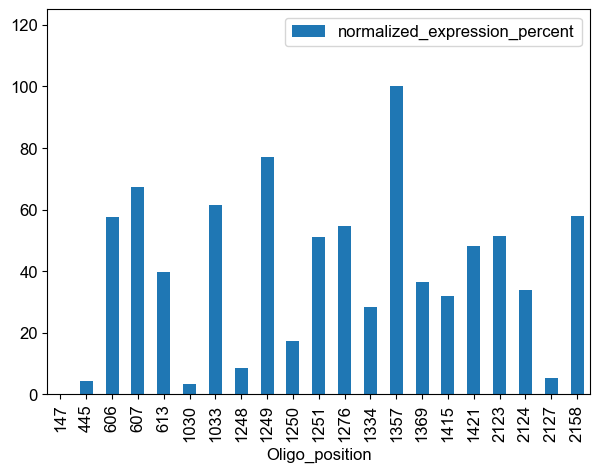

In [48]:
for g_ in list(df_combined['gene'].value_counts().index)[0:1]:
    df_g_ = df_combined[df_combined['gene'] == g_].copy()
    df_g_.sort_values(by='Oligo_position',inplace=True)
    display(df_g_)
    # gene_length_ = len(seq_dict[g_])
    # print(gene_length_,g_)


    
    from matplotlib import pyplot as plt
    fig,ax = plt.subplots()
    fig.set_size_inches(w=7,h=5)
    
    df_g_.plot.bar(
        x='Oligo_position',
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        # alpha=0.6,
        # c='color',
        ax=ax,
    )
    # ax.set_xlim(0,gene_length_)
    ax.set_ylim(0,125)

    
    

In [49]:
df_combined

Oligo_position                Oligo_ID Target_Region_Sequence_20mer  \
0              580   MLH1_XM_005265161_580         UCAGUACACAAUGCAGGCAU   
1              578   MLH1_XM_005265161_578         AUUCAGUACACAAUGCAGGC   
2             1030   BCAM_NM_00000000_1030         CUGCAGAGUGGAGGAUUACG   
3             3050  GYS1_NM_001161587_3050         CAAGCAAGAGGUGGUAGAAC   
4              147    BCAM_NM_00000000_147         AGGUGAUGCGAGGAAAGUCU   
..             ...                     ...                          ...   
73            1925     MSH3_NM_002439_1925         AAAUUGCCCGACAUAGAGAG   
74            2250     MSH3_NM_002439_2250         AGAUCCGAAUGCAUUUGCAA   
75            4283     MSH3_NM_002439_4283         AAAUAGAAUUAUCAAGCUUU   
76            4282     MSH3_NM_002439_4282         GAAAUAGAAUUAUCAAGCUU   
77            2522     MSH3_NM_002439_2522         GAACAUUAUCACUCCUUGUG   

                                      Gene_region  GC_content  \
0   GTTGTTGGCAGGTATTCAGTACACAATGCAGGCATTAGTTTCTCA          45   
1   AAGTTGTTGGCAGGTATTCAGTACACAATGCAGGCATTAGTTTCT          45   
2   GAGCGGGACCTATGGCTGCAGAGTGGAGGATTACGACGCGGCAGA          55   
3   CCCCTACACTTTGGCCAAGCAAGAGGTGGTAGAACCACTTGGCTG          50   
4   TACCCCCGCTGGTGGAGGTGATGCGAGGAAAGTCTGTCATTCTGG          50   
..                                            ...         ...   
73  GAAAATCATCTACGTAAATTGCCCGACATAGAGAGGGGACTCTGT          45   
74  AAGGTGTTATTGACGAGATCCGAATGCATTTGCAAGAAATACGAA          40   
75  AAGAAAAAAGAAAAGAAATAGAATTATCAAGCTTTTAAAAACTAG          20   
76  AAAGAAAAAAGAAAAGAAATAGAATTATCAAGCTTTTAAAAACTA          25   
77  CTAGAGAAATTCAGTGAACATTATCACTCCTTGTGTAAAGCAGTG          40   

           Revcomp_Guide            Oligo_ID_sense         Oligo_ID_antisense  \
0   AUGCCUGCAUUGUGUACUGA   MLH1_XM_005265161_580_s   MLH1_XM_005265161_580_as   
1   GCCUGCAUUGUGUACUGAAU   MLH1_XM_005265161_578_s   MLH1_XM_005265161_578_as   
2   CGUAAUCCUCCACUCUGCAG   BCAM_NM_00000000_1030_s   BCAM_NM_00000000_1030_as   
3   GUUCUACCACCUCUUGCUUG  GYS1_NM_001161587_3050_s  GYS1_NM_001161587_3050_as   
4   AGACUUUCCUCGCAUCACCU    BCAM_NM_00000000_147_s    BCAM_NM_00000000_147_as   
..                   ...                       ...                        ...   
73  CUCUCUAUGUCGGGCAAUUU     MSH3_NM_002439_1925_s     MSH3_NM_002439_1925_as   
74  UUGCAAAUGCAUUCGGAUCU     MSH3_NM_002439_2250_s     MSH3_NM_002439_2250_as   
75  AAAGCUUGAUAAUUCUAUUU     MSH3_NM_002439_4283_s     MSH3_NM_002439_4283_as   
76  AAGCUUGAUAAUUCUAUUUC     MSH3_NM_002439_4282_s     MSH3_NM_002439_4282_as   
77  CACAAGGAGUGAUAAUGUUC     MSH3_NM_002439_2522_s     MSH3_NM_002439_2522_as   

    Score Region  ...       NTC_3     NTC_avg  NTC_stdev       UNT_1  \
0     104    ORF  ...  105.947593   98.944087   6.285901   92.702293   
1      21    ORF  ...  105.947593   98.944087   6.285901   92.702293   
2      27    NaN  ...   99.346008   87.855200  10.194895   78.498004   
3     -12   3UTR  ...   86.953709   81.806294   6.212849   96.495020   
4      14    NaN  ...   99.346008   87.855200  10.194895   78.498004   
..    ...    ...  ...         ...         ...        ...         ...   
73    -80    ORF  ...  103.080526  103.144069   1.392397  102.101039   
74      9    ORF  ...  103.080526  103.144069   1.392397  102.101039   
75     92   3UTR  ...  103.080526  103.144069   1.392397  102.101039   
76     78   3UTR  ...  103.080526  103.144069   1.392397  102.101039   
77     21    ORF  ...  103.080526  103.144069   1.392397  102.101039   

         UNT_2       UNT_3     UNT_avg  UNT_stdev  \
0   102.395938   98.360583   97.819605   4.869413   
1   102.395938   98.360583   97.819605   4.869413   
2    83.460239  107.018959   89.659067  15.237465   
3   104.637383  138.676088  113.269497  22.376230   
4    83.460239  107.018959   89.659067  15.237465   
..         ...         ...         ...        ...   
73  101.393628   82.917156   95.470607  10.877360   
74  101.393628   82.917156   95.470607  10.877360   
75  101

# Check sequences match old designs (compare AS and S sequences)

In [50]:
df_for_synth = pd.read_excel('second_round_scores_all_4_genes_ssrf_MSH3_BCAM1_MLH1_GYS1.xlsx',sheet_name='for_synthesis')

df_for_synth['Oligo_ID_sense'] = df_for_synth['Oligo_ID_sense'].apply(lambda x: x[:-1]+'s')
df_for_synth['Oligo_ID_antisense'] = df_for_synth['Oligo_ID_antisense'].apply(lambda x: x[:-2]+'as')

df_for_synth


gene    oligo_id  position         Oligo_ID_sense  \
0    MSH3   MSH3_1445      1445  MSH3_NM_002439_1445_s   
1    MSH3   MSH3_3450      3450  MSH3_NM_002439_3450_s   
2    MSH3   MSH3_1467      1467  MSH3_NM_002439_1467_s   
3    MSH3   MSH3_4283      4283  MSH3_NM_002439_4283_s   
4    MSH3   MSH3_4282      4282  MSH3_NM_002439_4282_s   
..    ...         ...       ...                    ...   
79  BCAM1  BCAM1_1250      1250  BCAM_NM_005581_1250_s   
80  BCAM1  BCAM1_1334      1334  BCAM_NM_005581_1334_s   
81  BCAM1  BCAM1_1357      1357  BCAM_NM_005581_1357_s   
82  BCAM1  BCAM1_1248      1248  BCAM_NM_005581_1248_s   
83  BCAM1  BCAM1_1249      1249  BCAM_NM_005581_1249_s   

        Oligo_ID_antisense                                     sense_sequence  \
0   MSH3_NM_002439_1445_as  (mU)#(mG)#(mG)(fA)(mU)(fA)(mA)(fC)(mA)(fU)(mU)...   
1   MSH3_NM_002439_3450_as  (mC)#(mA)#(mA)(fC)(mA)(fU)(mG)(fG)(mA)(fA)(mG)...   
2   MSH3_NM_002439_1467_as  (mC)#(mA)#(mG)(fC)(mC)(fA)(mU)(fG)(mC)(fU)(mU)...   
3   MSH3_NM_002439_4283_as  (mA)#(mG)#(mA)(fA)(mU)(fU)(mA)(fU)(mC)(fA)(mA)...   
4   MSH3_NM_002439_4282_as  (mU)#(mA)#(mG)(fA)(mA)(fU)(mU)(fA)(mU)(fC)(mA)...   
..                     ...                                                ...   
79  BCAM_NM_005581_1250_as  (mU)#(mC)#(mA)(fG)(mU)(fU)(mC)(fU)(mA)(fU)(mC)...   
80  BCAM_NM_005581_1334_as  (mA)#(mC)#(mU)(fU)(mC)(fA)(mC)(fG)(mC)(fU)(mG)...   
81  BCAM_NM_005581_1357_as  (mU)#(mC)#(mG)(fC)(mC)(fA)(mG)(fA)(mG)(fC)(mU)...   
82  BCAM_NM_005581_1248_as  (mG)#(mC)#(mU)(fC)(mA)(fG)(mU)(fU)(mC)(fU)(mA)...   
83  BCAM_NM_005581_1249_as  (mC)#(mU)#(mC)(fA)(mG)(fU)(mU)(fC)(mU)(fA)(mU)...   

                                   antisense_sequence  
0   P(mU)#(fA)#(mA)(fU)(fA)(fA)(mA)(fU)(mG)(fU)(mU...  
1   P(mU)#(fG)#(mU)(fU)(fU)(fC)(mU)(fU)(mC)(fC)(mA...  
2   P(mU)#(fU)#(mG)(fG)(fA)(fA)(mA)(fG)(mC)(fA)(mU...  
3   P(mU)#(fA)#(mA)(fG)(fC)(fU)(mU)(fG)(mA)(fU)(mA...  
4   P(mU)#(fA)#(mG)(fC)(fU)(fU)(mG)(fA)(mU)(fA)(mA...  
..                                                ...  
79  P(mU)#(fA)#(mG)(fG)(fU)(fG)(mA)(fU)(mA)(fG)(mA...  
80  P(mU)#(fC)#(mC)(fA)(fG)(fC)(mA)(fG)(mC)(fG)(mU...  
81  P(mU)#(fC)#(mU)(fU)(fU)(fA)(mG)(fC)(mU)(fC)(mU...  
82  P(mU)#(fG)#(mU)(fG)(fA)(fU)(mA)(fG)(mA)(fA)(mC...  
83  P(mU)#(fG)#(mG)(fU)(fG)(fA)(mU)(fA)(mG)(fA)(mA...  

[84 rows x 7 columns]

In [52]:
df_old_scores['with_accession_Oligo_ID_sense'] = df_old_scores['Oligo_ID_sense']
df_old_scores['with_accession_Oligo_ID_antisense'] = df_old_scores['Oligo_ID_antisense']


In [53]:

df_old_scores['Oligo_ID_sense'] = df_old_scores['with_accession_Oligo_ID_sense'].apply(lambda x: x.split('_')[0]+'_'+x.split('_')[-2])
df_old_scores['Oligo_ID_antisense'] = df_old_scores['with_accession_Oligo_ID_antisense'].apply(lambda x: x.split('_')[0]+'_'+x.split('_')[-2])

df_old_scores['with_accession_Oligo_ID_sense'] = df_old_scores['with_accession_Oligo_ID_sense'].apply(lambda x: x[:-1]+'s')
df_old_scores['with_accession_Oligo_ID_antisense'] = df_old_scores['with_accession_Oligo_ID_sense'].apply(lambda x: x[:-2]+'as')


In [54]:
df_for_synth['Oligo_ID_sense'].isin(df_old_scores['with_accession_Oligo_ID_sense']).value_counts()

True     57
False    27
Name: Oligo_ID_sense, dtype: int64

### NOTE: BCAM oligos have different names because of different accession numbers

In [55]:
df_for_synth['Oligo_ID_sense'].apply(lambda x: x.replace('BCAM_NM_005581_','BCAM_NM_00000000_')).isin(df_old_scores['with_accession_Oligo_ID_sense']).value_counts()



True     78
False     6
Name: Oligo_ID_sense, dtype: int64

In [56]:
df_for_synth[df_for_synth['Oligo_ID_sense'].apply(lambda x: x.replace('BCAM_NM_005581_','BCAM_NM_00000000_')).isin(df_old_scores['with_accession_Oligo_ID_sense'])]




gene    oligo_id  position         Oligo_ID_sense  \
0    MSH3   MSH3_1445      1445  MSH3_NM_002439_1445_s   
1    MSH3   MSH3_3450      3450  MSH3_NM_002439_3450_s   
2    MSH3   MSH3_1467      1467  MSH3_NM_002439_1467_s   
3    MSH3   MSH3_4283      4283  MSH3_NM_002439_4283_s   
4    MSH3   MSH3_4282      4282  MSH3_NM_002439_4282_s   
..    ...         ...       ...                    ...   
79  BCAM1  BCAM1_1250      1250  BCAM_NM_005581_1250_s   
80  BCAM1  BCAM1_1334      1334  BCAM_NM_005581_1334_s   
81  BCAM1  BCAM1_1357      1357  BCAM_NM_005581_1357_s   
82  BCAM1  BCAM1_1248      1248  BCAM_NM_005581_1248_s   
83  BCAM1  BCAM1_1249      1249  BCAM_NM_005581_1249_s   

        Oligo_ID_antisense                                     sense_sequence  \
0   MSH3_NM_002439_1445_as  (mU)#(mG)#(mG)(fA)(mU)(fA)(mA)(fC)(mA)(fU)(mU)...   
1   MSH3_NM_002439_3450_as  (mC)#(mA)#(mA)(fC)(mA)(fU)(mG)(fG)(mA)(fA)(mG)...   
2   MSH3_NM_002439_1467_as  (mC)#(mA)#(mG)(fC)(mC)(fA)(mU)(fG)(mC)(fU)(mU)...   
3   MSH3_NM_002439_4283_as  (mA)#(mG)#(mA)(fA)(mU)(fU)(mA)(fU)(mC)(fA)(mA)...   
4   MSH3_NM_002439_4282_as  (mU)#(mA)#(mG)(fA)(mA)(fU)(mU)(fA)(mU)(fC)(mA)...   
..                     ...                                                ...   
79  BCAM_NM_005581_1250_as  (mU)#(mC)#(mA)(fG)(mU)(fU)(mC)(fU)(mA)(fU)(mC)...   
80  BCAM_NM_005581_1334_as  (mA)#(mC)#(mU)(fU)(mC)(fA)(mC)(fG)(mC)(fU)(mG)...   
81  BCAM_NM_005581_1357_as  (mU)#(mC)#(mG)(fC)(mC)(fA)(mG)(fA)(mG)(fC)(mU)...   
82  BCAM_NM_005581_1248_as  (mG)#(mC)#(mU)(fC)(mA)(fG)(mU)(fU)(mC)(fU)(mA)...   
83  BCAM_NM_005581_1249_as  (mC)#(mU)#(mC)(fA)(mG)(fU)(mU)(fC)(mU)(fA)(mU)...   

                                   antisense_sequence  
0   P(mU)#(fA)#(mA)(fU)(fA)(fA)(mA)(fU)(mG)(fU)(mU...  
1   P(mU)#(fG)#(mU)(fU)(fU)(fC)(mU)(fU)(mC)(fC)(mA...  
2   P(mU)#(fU)#(mG)(fG)(fA)(fA)(mA)(fG)(mC)(fA)(mU...  
3   P(mU)#(fA)#(mA)(fG)(fC)(fU)(mU)(fG)(mA)(fU)(mA...  
4   P(mU)#(fA)#(mG)(fC)(fU)(fU)(mG)(fA)(mU)(fA)(mA...  
..                                                ...  
79  P(mU)#(fA)#(mG)(fG)(fU)(fG)(mA)(fU)(mA)(fG)(mA...  
80  P(mU)#(fC)#(mC)(fA)(fG)(fC)(mA)(fG)(mC)(fG)(mU...  
81  P(mU)#(fC)#(mU)(fU)(fU)(fA)(mG)(fC)(mU)(fC)(mU...  
82  P(mU)#(fG)#(mU)(fG)(fA)(fU)(mA)(fG)(mA)(fA)(mC...  
83  P(mU)#(fG)#(mG)(fU)(fG)(fA)(mU)(fA)(mG)(fA)(mA...  

[78 rows x 7 columns]

## Same MLH1 Oligos didn't find above

In [57]:
df_for_synth[~df_for_synth['Oligo_ID_sense'].apply(lambda x: x.replace('BCAM_NM_005581_','BCAM_NM_00000000_')).isin(df_old_scores['with_accession_Oligo_ID_sense'])]





gene   oligo_id  position            Oligo_ID_sense  \
23  MLH1   MLH1_724       724   MLH1_XM_005265161_724_s   
27  MLH1   MLH1_725       725   MLH1_XM_005265161_725_s   
29  MLH1  MLH1_2464      2464  MLH1_XM_005265161_2464_s   
37  MLH1   MLH1_424       424   MLH1_XM_005265161_424_s   
39  MLH1   MLH1_423       423   MLH1_XM_005265161_423_s   
40  MLH1   MLH1_422       422   MLH1_XM_005265161_422_s   

           Oligo_ID_antisense  \
23   MLH1_XM_005265161_724_as   
27   MLH1_XM_005265161_725_as   
29  MLH1_XM_005265161_2464_as   
37   MLH1_XM_005265161_424_as   
39   MLH1_XM_005265161_423_as   
40   MLH1_XM_005265161_422_as   

                                       sense_sequence  \
23  (mC)#(mA)#(mA)(fC)(mA)(fU)(mA)(fG)(mC)(fC)(mA)...   
27  (mA)#(mA)#(mC)(fA)(mU)(fA)(mG)(fC)(mC)(fA)(mC)...   
29  (mU)#(mG)#(mG)(fA)(mA)(fA)(mU)(fA)(mU)(fC)(mC)...   
37  (mG)#(mU)#(mU)(fG)(mA)(fU)(mU)(fC)(mA)(fG)(mA)...   
39  (mA)#(mG)#(mU)(fU)(mG)(fA)(mU)(fU)(mC)(fA)(mG)...   
40  (mA)#(mA)#(mG)(fU)(mU)(fG)(mA)(fU)(mU)(fC)(mA)...   

                                   antisense_sequence  
23  P(mU)#(fC)#(mU)(fC)(fG)(fU)(mG)(fG)(mC)(fU)(mA...  
27  P(mU)#(fC)#(mC)(fU)(fC)(fG)(mU)(fG)(mG)(fC)(mU...  
29  P(mU)#(fU)#(mG)(fC)(fA)(fG)(mG)(fA)(mU)(fA)(mU...  
37  P(mU)#(fU)#(mG)(fG)(fA)(fU)(mC)(fU)(mG)(fA)(mA...  
39  P(mU)#(fG)#(mG)(fA)(fU)(fC)(mU)(fG)(mA)(fA)(mU...  
40  P(mU)#(fG)#(mA)(fU)(fC)(fU)(mG)(fA)(mA)(fU)(mC...

## Compare antisense and sense sequences of those that have matches (78 oligos)

In [58]:
check_df__ = df_for_synth[df_for_synth['Oligo_ID_sense'].apply(
    lambda x: x.replace('BCAM_NM_005581_','BCAM_NM_00000000_')).isin(
    df_old_scores['with_accession_Oligo_ID_sense'])].copy()

check_df__.reset_index(inplace=True,drop=True)
check_df__



gene    oligo_id  position         Oligo_ID_sense  \
0    MSH3   MSH3_1445      1445  MSH3_NM_002439_1445_s   
1    MSH3   MSH3_3450      3450  MSH3_NM_002439_3450_s   
2    MSH3   MSH3_1467      1467  MSH3_NM_002439_1467_s   
3    MSH3   MSH3_4283      4283  MSH3_NM_002439_4283_s   
4    MSH3   MSH3_4282      4282  MSH3_NM_002439_4282_s   
..    ...         ...       ...                    ...   
73  BCAM1  BCAM1_1250      1250  BCAM_NM_005581_1250_s   
74  BCAM1  BCAM1_1334      1334  BCAM_NM_005581_1334_s   
75  BCAM1  BCAM1_1357      1357  BCAM_NM_005581_1357_s   
76  BCAM1  BCAM1_1248      1248  BCAM_NM_005581_1248_s   
77  BCAM1  BCAM1_1249      1249  BCAM_NM_005581_1249_s   

        Oligo_ID_antisense                                     sense_sequence  \
0   MSH3_NM_002439_1445_as  (mU)#(mG)#(mG)(fA)(mU)(fA)(mA)(fC)(mA)(fU)(mU)...   
1   MSH3_NM_002439_3450_as  (mC)#(mA)#(mA)(fC)(mA)(fU)(mG)(fG)(mA)(fA)(mG)...   
2   MSH3_NM_002439_1467_as  (mC)#(mA)#(mG)(fC)(mC)(fA)(mU)(fG)(mC)(fU)(mU)...   
3   MSH3_NM_002439_4283_as  (mA)#(mG)#(mA)(fA)(mU)(fU)(mA)(fU)(mC)(fA)(mA)...   
4   MSH3_NM_002439_4282_as  (mU)#(mA)#(mG)(fA)(mA)(fU)(mU)(fA)(mU)(fC)(mA)...   
..                     ...                                                ...   
73  BCAM_NM_005581_1250_as  (mU)#(mC)#(mA)(fG)(mU)(fU)(mC)(fU)(mA)(fU)(mC)...   
74  BCAM_NM_005581_1334_as  (mA)#(mC)#(mU)(fU)(mC)(fA)(mC)(fG)(mC)(fU)(mG)...   
75  BCAM_NM_005581_1357_as  (mU)#(mC)#(mG)(fC)(mC)(fA)(mG)(fA)(mG)(fC)(mU)...   
76  BCAM_NM_005581_1248_as  (mG)#(mC)#(mU)(fC)(mA)(fG)(mU)(fU)(mC)(fU)(mA)...   
77  BCAM_NM_005581_1249_as  (mC)#(mU)#(mC)(fA)(mG)(fU)(mU)(fC)(mU)(fA)(mU)...   

                                   antisense_sequence  
0   P(mU)#(fA)#(mA)(fU)(fA)(fA)(mA)(fU)(mG)(fU)(mU...  
1   P(mU)#(fG)#(mU)(fU)(fU)(fC)(mU)(fU)(mC)(fC)(mA...  
2   P(mU)#(fU)#(mG)(fG)(fA)(fA)(mA)(fG)(mC)(fA)(mU...  
3   P(mU)#(fA)#(mA)(fG)(fC)(fU)(mU)(fG)(mA)(fU)(mA...  
4   P(mU)#(fA)#(mG)(fC)(fU)(fU)(mG)(fA)(mU)(fA)(mA...  
..                                                ...  
73  P(mU)#(fA)#(mG)(fG)(fU)(fG)(mA)(fU)(mA)(fG)(mA...  
74  P(mU)#(fC)#(mC)(fA)(fG)(fC)(mA)(fG)(mC)(fG)(mU...  
75  P(mU)#(fC)#(mU)(fU)(fU)(fA)(mG)(fC)(mU)(fC)(mU...  
76  P(mU)#(fG)#(mU)(fG)(fA)(fU)(mA)(fG)(mA)(fA)(mC...  
77  P(mU)#(fG)#(mG)(fU)(fG)(fA)(mU)(fA)(mG)(fA)(mA...  

[78 rows x 7 columns]

## Check sequences by comparing antisense/sense with Target Region/seed/revcomp_guide

In [59]:
def remove_mods(seq):
    clean_seq = ''
    for p_ in list(seq.replace('TegChol','')):
        if p_ in ['A','U','C','G']:
            clean_seq+=p_
    return clean_seq

# seq = check_df__.iloc[idx_2]['antisense_sequence']
# seq = check_df__.iloc[idx_2]['sense_sequence']

check_df__['sense_sequence_no_mods'] = check_df__['sense_sequence'].apply(lambda x: remove_mods(x))

check_df__['antisense_sequence_no_mods'] = check_df__['antisense_sequence'].apply(lambda x: remove_mods(x))

  

1) Portion of Sense sequence should be in the Target region 20mer

In [60]:
mismatch_sequences_oligos_ls = []
mismatch_sequences_idx1_ls = []
mismatch_sequences_idx2_ls = []
for o_ in list(check_df__['oligo_id']):#[0:2]:
    if o_ not in list(df_combined['oligo_id_new']):
        print("OLIGO NOT FOUND:",o_)
    idx_1 = df_combined[df_combined['oligo_id_new'] == o_].index[0]
    idx_2 = check_df__[check_df__['oligo_id'] == o_].index[0]
    
    # display(df_combined.iloc[idx_1][['oligo_id_new','Target_Region_Sequence_20mer','Gene_region','Revcomp_Guide','refseq_seed']])
    # display(check_df__.iloc[idx_2][['oligo_id','sense_sequence_no_mods','antisense_sequence_no_mods']])
    # print('\n\n\n**************************\n')

    seq20mer__ = df_combined.iloc[idx_1]['Target_Region_Sequence_20mer']
    seqGeneRegion__ = df_combined.iloc[idx_1]['Gene_region']
    seqRevCompGuide__ = df_combined.iloc[idx_1]['Revcomp_Guide']
    seqRefSeqSeed__ = df_combined.iloc[idx_1]['refseq_seed']
    
    seqS__ = check_df__.iloc[idx_2]['sense_sequence_no_mods']
    seqAS__ = check_df__.iloc[idx_2]['antisense_sequence_no_mods']
    
    # print(seq20mer__)
    # print(seqGeneRegion__)
    # print(seqRevCompGuide__)
    # print(seqRefSeqSeed__)
    # print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
    
    # print(seqS__)
    # print(seqAS__)

    # 1) Portion of Sense sequence should be in the Target region 20mer
    if seqS__[:-1] not in seq20mer__:
        if seqS__[::-1][:-1]  in seq20mer__:
            print('found flipped match!')
        # print(o_)
        #print(df_combined.iloc[idx_1]['oligo_id_new'])
        #print(check_df__.iloc[idx_2]['oligo_id'])
        # print("SENSE not found in 20mer:\n",'    '+seqS__[::-1] ,'\n',seq20mer__,"\n")

        # print(seq20mer__)
        # print(seqGeneRegion__)
        # print(seqRevCompGuide__)
        # print(seqRefSeqSeed__)
        # print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
        
        # print(seqS__)
        # print(seqAS__)

        # print('\n\n')
        mismatch_sequences_oligos_ls.append(o_)
        mismatch_sequences_idx1_ls.append(idx_1)
        mismatch_sequences_idx2_ls.append(idx_2)
        
print("Mismatching sense and antisense without corresponding 20mers:",len(mismatch_sequences_oligos_ls))


Mismatching sense and antisense without corresponding 20mers: 15


In [61]:
seqS__[::-1]

'ACCACUAUCUUGACUC'

## Check that none of the weird oligos that have mismatching sequences (and no corresponding 20mers) aren't in the newest round of screening data

In [62]:
df['oligo'].isin(mismatch_sequences_oligos_ls).value_counts()

False    120
Name: oligo, dtype: int64

In [63]:
check_df__.iloc[mismatch_sequences_idx2_ls[0]]['sense_sequence_no_mods']#.replace('A','u').replace('U','a').replace('C','g').replace('G','c').upper()




'ACAGCAUCAAACCAAA'

In [64]:
df_combined.iloc[mismatch_sequences_idx1_ls[0]]['Target_Region_Sequence_20mer'].replace('A','u').replace('U','a').replace('C','g').replace('G','c').upper()[::-1]



'AGCAUCUCAGCCUUCUUCUU'

In [65]:
check_df__.iloc[mismatch_sequences_idx2_ls[0]]['antisense_sequence_no_mods']

'UUUGGUUUGAUGCUGUGCCUU'

In [66]:
df_combined

Oligo_position                Oligo_ID Target_Region_Sequence_20mer  \
0              580   MLH1_XM_005265161_580         UCAGUACACAAUGCAGGCAU   
1              578   MLH1_XM_005265161_578         AUUCAGUACACAAUGCAGGC   
2             1030   BCAM_NM_00000000_1030         CUGCAGAGUGGAGGAUUACG   
3             3050  GYS1_NM_001161587_3050         CAAGCAAGAGGUGGUAGAAC   
4              147    BCAM_NM_00000000_147         AGGUGAUGCGAGGAAAGUCU   
..             ...                     ...                          ...   
73            1925     MSH3_NM_002439_1925         AAAUUGCCCGACAUAGAGAG   
74            2250     MSH3_NM_002439_2250         AGAUCCGAAUGCAUUUGCAA   
75            4283     MSH3_NM_002439_4283         AAAUAGAAUUAUCAAGCUUU   
76            4282     MSH3_NM_002439_4282         GAAAUAGAAUUAUCAAGCUU   
77            2522     MSH3_NM_002439_2522         GAACAUUAUCACUCCUUGUG   

                                      Gene_region  GC_content  \
0   GTTGTTGGCAGGTATTCAGTACACAATGCAGGCATTAGTTTCTCA          45   
1   AAGTTGTTGGCAGGTATTCAGTACACAATGCAGGCATTAGTTTCT          45   
2   GAGCGGGACCTATGGCTGCAGAGTGGAGGATTACGACGCGGCAGA          55   
3   CCCCTACACTTTGGCCAAGCAAGAGGTGGTAGAACCACTTGGCTG          50   
4   TACCCCCGCTGGTGGAGGTGATGCGAGGAAAGTCTGTCATTCTGG          50   
..                                            ...         ...   
73  GAAAATCATCTACGTAAATTGCCCGACATAGAGAGGGGACTCTGT          45   
74  AAGGTGTTATTGACGAGATCCGAATGCATTTGCAAGAAATACGAA          40   
75  AAGAAAAAAGAAAAGAAATAGAATTATCAAGCTTTTAAAAACTAG          20   
76  AAAGAAAAAAGAAAAGAAATAGAATTATCAAGCTTTTAAAAACTA          25   
77  CTAGAGAAATTCAGTGAACATTATCACTCCTTGTGTAAAGCAGTG          40   

           Revcomp_Guide            Oligo_ID_sense         Oligo_ID_antisense  \
0   AUGCCUGCAUUGUGUACUGA   MLH1_XM_005265161_580_s   MLH1_XM_005265161_580_as   
1   GCCUGCAUUGUGUACUGAAU   MLH1_XM_005265161_578_s   MLH1_XM_005265161_578_as   
2   CGUAAUCCUCCACUCUGCAG   BCAM_NM_00000000_1030_s   BCAM_NM_00000000_1030_as   
3   GUUCUACCACCUCUUGCUUG  GYS1_NM_001161587_3050_s  GYS1_NM_001161587_3050_as   
4   AGACUUUCCUCGCAUCACCU    BCAM_NM_00000000_147_s    BCAM_NM_00000000_147_as   
..                   ...                       ...                        ...   
73  CUCUCUAUGUCGGGCAAUUU     MSH3_NM_002439_1925_s     MSH3_NM_002439_1925_as   
74  UUGCAAAUGCAUUCGGAUCU     MSH3_NM_002439_2250_s     MSH3_NM_002439_2250_as   
75  AAAGCUUGAUAAUUCUAUUU     MSH3_NM_002439_4283_s     MSH3_NM_002439_4283_as   
76  AAGCUUGAUAAUUCUAUUUC     MSH3_NM_002439_4282_s     MSH3_NM_002439_4282_as   
77  CACAAGGAGUGAUAAUGUUC     MSH3_NM_002439_2522_s     MSH3_NM_002439_2522_as   

    Score Region  ...       NTC_3     NTC_avg  NTC_stdev       UNT_1  \
0     104    ORF  ...  105.947593   98.944087   6.285901   92.702293   
1      21    ORF  ...  105.947593   98.944087   6.285901   92.702293   
2      27    NaN  ...   99.346008   87.855200  10.194895   78.498004   
3     -12   3UTR  ...   86.953709   81.806294   6.212849   96.495020   
4      14    NaN  ...   99.346008   87.855200  10.194895   78.498004   
..    ...    ...  ...         ...         ...        ...         ...   
73    -80    ORF  ...  103.080526  103.144069   1.392397  102.101039   
74      9    ORF  ...  103.080526  103.144069   1.392397  102.101039   
75     92   3UTR  ...  103.080526  103.144069   1.392397  102.101039   
76     78   3UTR  ...  103.080526  103.144069   1.392397  102.101039   
77     21    ORF  ...  103.080526  103.144069   1.392397  102.101039   

         UNT_2       UNT_3     UNT_avg  UNT_stdev  \
0   102.395938   98.360583   97.819605   4.869413   
1   102.395938   98.360583   97.819605   4.869413   
2    83.460239  107.018959   89.659067  15.237465   
3   104.637383  138.676088  113.269497  22.376230   
4    83.460239  107.018959   89.659067  15.237465   
..         ...         ...         ...        ...   
73  101.393628   82.917156   95.470607  10.877360   
74  101.393628   82.917156   95.470607  10.877360   
75  101

In [67]:
df

oligo  position   gene  Replicate_1  Replicate_2  Replicate_3  \
0    BCAM1_139       139  BCAM1     29.33086     22.71854     20.63844   
1    BCAM1_140       140  BCAM1     48.30093     45.66608     39.31965   
2    BCAM1_370       370  BCAM1     78.97290     72.99040     76.55842   
3    BCAM1_666       666  BCAM1     65.25128     74.51008     65.61525   
4    BCAM1_709       709  BCAM1     59.23448     67.82481     65.12263   
..         ...       ...    ...          ...          ...          ...   
115  MSH3_4010      4010   MSH3     54.60428     53.32035     59.08915   
116  MSH3_4035      4035   MSH3     65.19468     69.44057     66.70707   
117  MSH3_4036      4036   MSH3     83.31917     95.32704     82.90980   
118  MSH3_4068      4068   MSH3     88.64831     91.02084     83.15288   
119  MSH3_4069      4069   MSH3     66.10081     75.15333     77.84770   

     avg_raw_expression_percent  std_raw_expression_percent  \
0                     24.229280                    3.705968   
1                     44.428887                    3.769512   
2                     76.173907                    2.457433   
3                     68.458870                    4.281431   
4                     64.060640                    3.586485   
..                          ...                         ...   
115                   55.671260                    2.473001   
116                   67.114107                    1.757110   
117                   87.185337                    5.759479   
118                   87.607343                    3.295341   
119                   73.033947                    5.024354   

     normalized_expression_percent  std_norm_expression_percent  ...  \
0                         7.604094                     3.997113  ...   
1                        29.390607                     4.065650  ...   
2                        63.629556                     2.650492  ...   
3                        55.308416                     4.617785  ...   
4                        50.564656                     3.868243  ...   
..                             ...                          ...  ...   
115                      41.721688                     2.942242  ...   
116                      55.335765                     2.090514  ...   
117                      79.215425                     6.852315  ...   
118                      79.717505                     3.920618  ...   
119                      62.378870                     5.977703  ...   

    raw_prob_preds_7 raw_prob_preds_8 raw_prob_preds_9  raw_prob_preds_10  \
0           0.536857         0.549759         0.533108           0.552188   
1           0.538165         0.541403         0.517564           0.524716   
2           0.509157         0.548767         0.504353           0.545508   
3           0.423224         0.444349         0.468941           0.456978   
4           0.446383         0.479126         0.423206           0.437169   
..               ...              ...              ...                ...   
115         0.445610         0.472277         0.421920           0.443915   
116         0.420784         0.452185         0.444067           0.457238   
117         0.435477         0.435652         0.440811           0.442939   
118         0.422349         0.430380         0.423178           0.450153   
119         0.424444         0.449796         0.424620           0.446935   

    raw_probabilities_mean raw_probabilities_std      aver       max  \
0                 0.541744              0.009811  0.541744  0.552392   
1                 0.536304              0.010486  0.536304  0.553814   
2                 0.521891              0.017571  0.521891  0.548767   
3                 0.438936              0.015080  0.438936  0.468941   
4                 0.444062              0.015241  0.444062  0.479126   
..                     ...                   ...       ...       ...   
115               0.435881              0.016084  0.435881  0.472277 

In [68]:
df_combined['gene_y']

0      MLH1
1      MLH1
2     BCAM1
3      GYS1
4     BCAM1
      ...  
73     MSH3
74     MSH3
75     MSH3
76     MSH3
77     MSH3
Name: gene_y, Length: 78, dtype: object

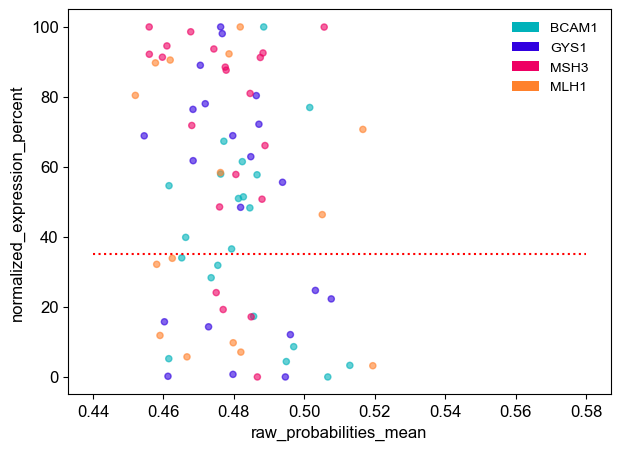

In [69]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots()
fig.set_size_inches(w=7,h=5)

colors_ls= df_combined['gene_y'].apply(lambda x: gene_color_dict[x])
df_combined.plot.scatter(
    
    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    
    alpha=0.6,
    c=colors_ls,

    ax=ax,
)


# Legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements=[]
for g_ in df_combined.gene_y.value_counts().index:
    legend_elements.append(
        Patch(facecolor=gene_color_dict[g_],edgecolor=None,label=g_)
    )
ax.legend(handles=legend_elements,loc='upper right',frameon=False,fontsize=10)

ax.hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')
# fig.suptitle('Fig 1A. Full Dataset',fontweight='bold',ha='left',x=0)

# ax.set_xlabel('Score')
# ax.set_ylabel('Expression Normalized by Max-Min(%)')




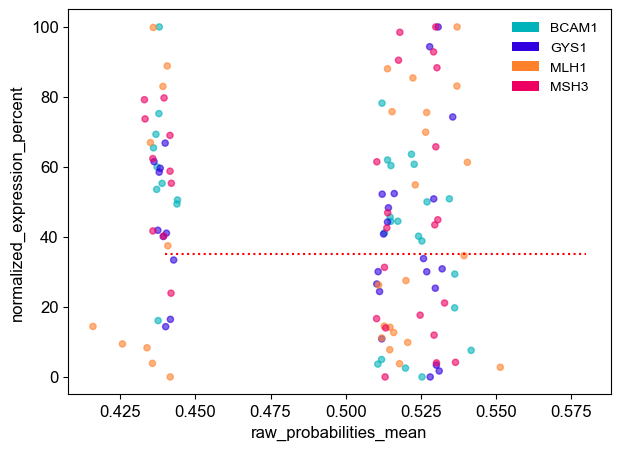

In [70]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots()
fig.set_size_inches(w=7,h=5)

colors_ls= df['gene'].apply(lambda x: gene_color_dict[x])
df.plot.scatter(
    
    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    
    alpha=0.6,
    c=colors_ls,

    ax=ax,
)


# Legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements=[]
for g_ in df.gene.value_counts().index:
    legend_elements.append(
        Patch(facecolor=gene_color_dict[g_],edgecolor=None,label=g_)
    )
ax.legend(handles=legend_elements,loc='upper right',frameon=False,fontsize=10)

ax.hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')
# fig.suptitle('Fig 1A. Full Dataset',fontweight='bold',ha='left',x=0)

# ax.set_xlabel('Score')
# ax.set_ylabel('Expression Normalized by Max-Min(%)')




Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	plot_score-vs-expression_normalized_experimental_eval.png
	plot_score-vs-expression_normalized_experimental_eval.svg


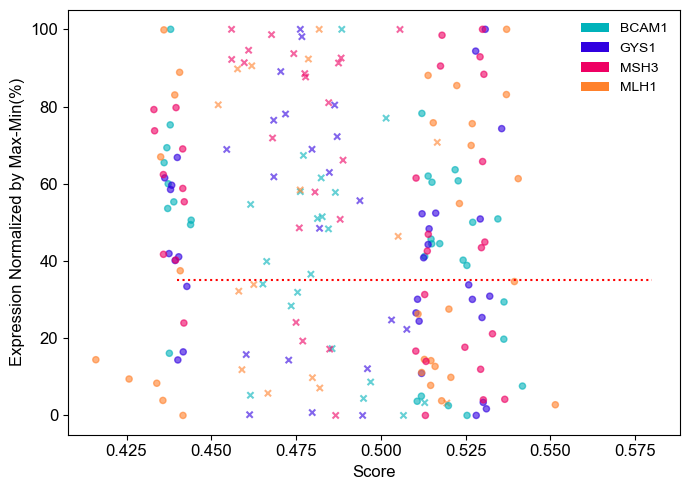

In [193]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax = plt.subplots()
fig.set_size_inches(w=7,h=5)

colors_ls_df_combined= df_combined['gene_y'].apply(lambda x: gene_color_dict[x])
df_combined.plot.scatter(
    
    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='x',
    alpha=0.6,
    c=colors_ls_df_combined,

    ax=ax,
)
colors_ls_df= df['gene'].apply(lambda x: gene_color_dict[x])
df.plot.scatter(
    
    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='o',
    alpha=0.6,
    c=colors_ls_df,

    ax=ax,
)

# Legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements=[]
for g_ in df_combined.gene_y.value_counts().index:
    legend_elements.append(
        Patch(facecolor=gene_color_dict[g_],edgecolor=None,label=g_)
    )
ax.legend(handles=legend_elements,loc='upper right',frameon=False,fontsize=10)

ax.hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')
# fig.suptitle('Fig 1A. Full Dataset',fontweight='bold',ha='left',x=0)

ax.set_xlabel('Score')
ax.set_ylabel('Expression Normalized by Max-Min(%)')


## Save Figure
fnm_final_ = 'plot_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')


BCAM1


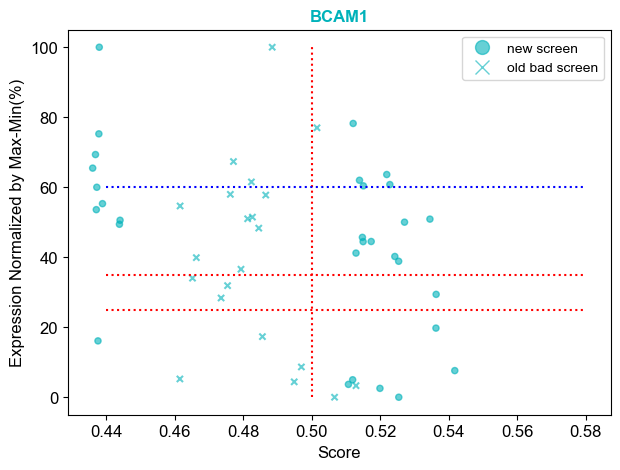

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	BCAM1_plot_score-vs-expression_normalized_experimental_eval.png
	BCAM1_plot_score-vs-expression_normalized_experimental_eval.svg
GYS1


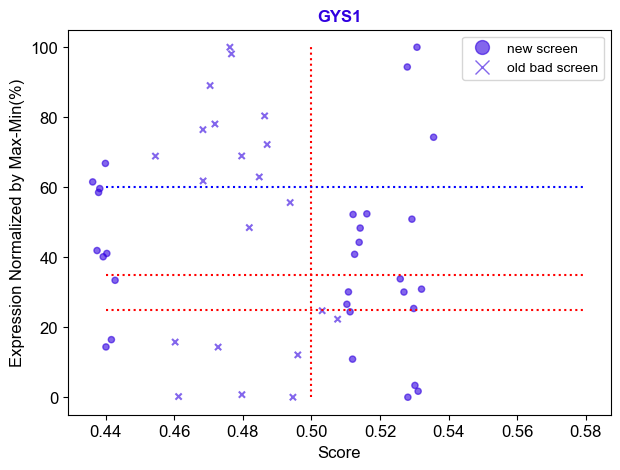

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	GYS1_plot_score-vs-expression_normalized_experimental_eval.png
	GYS1_plot_score-vs-expression_normalized_experimental_eval.svg
MLH1


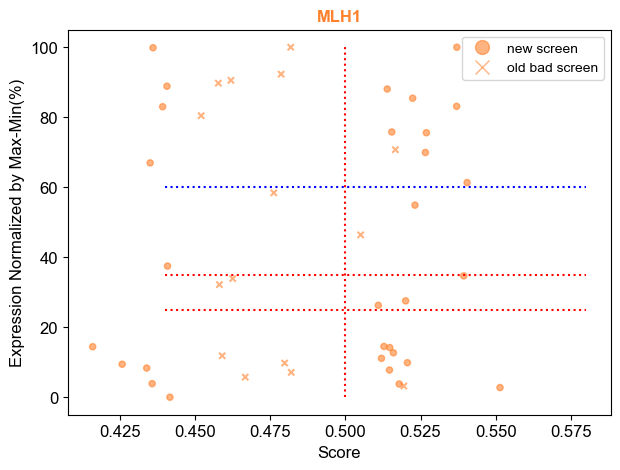

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	MLH1_plot_score-vs-expression_normalized_experimental_eval.png
	MLH1_plot_score-vs-expression_normalized_experimental_eval.svg
MSH3


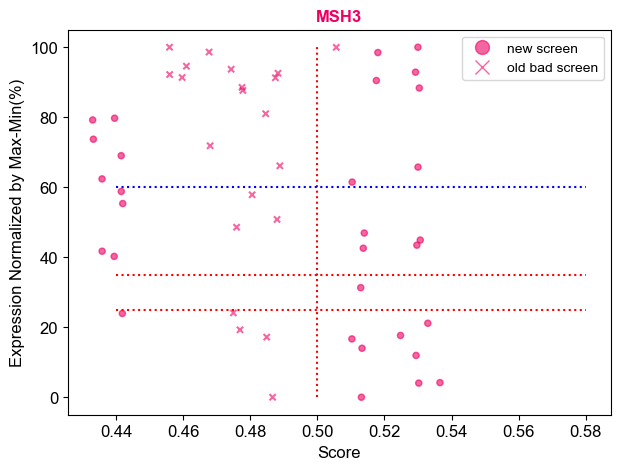

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	MSH3_plot_score-vs-expression_normalized_experimental_eval.png
	MSH3_plot_score-vs-expression_normalized_experimental_eval.svg


In [194]:
from matplotlib import pyplot as plt
import numpy as np

for gene_ in ['BCAM1','GYS1','MLH1','MSH3']: # list(df['gene'].value_counts().index)
    fig,ax = plt.subplots()
    fig.set_size_inches(w=7,h=5)

    print(gene_)
    colors_ls_df_combined= df_combined[df_combined['gene_y'] == gene_]['gene_y'].apply(lambda x: gene_color_dict[x])
    df_combined[df_combined['gene_y'] == gene_].plot.scatter(
        
        x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='x',
        alpha=0.6,
        c=colors_ls_df_combined,
    
        ax=ax,
    )
    colors_ls_df= df[df['gene'] == gene_]['gene'].apply(lambda x: gene_color_dict[x])
    df[df['gene'] == gene_].plot.scatter(
        
        x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        c=colors_ls_df,
    
        ax=ax,
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    legend_elements=[
        Line2D([0],[0],marker='o',color=gene_color_dict[gene_],linestyle='None',markersize=10,label='new screen',alpha=0.6),
        Line2D([0],[0],marker='x',color=gene_color_dict[gene_],linestyle='None',markersize=10,label='old bad screen',alpha=0.6),
    ]
    ax.legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)
    
    ax.vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')

    ax.hlines(y=60,xmin=0.44,xmax=0.58,linestyle='dotted',color='blue')

    ax.hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')
    ax.hlines(y=25,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')

    
    ax.set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    ax.set_xlabel('Score')
    ax.set_ylabel('Expression Normalized by Max-Min(%)')
    
    plt.show()
    ## Save Figure
    fnm_final_ = gene_.upper()+'_plot_score-vs-expression_normalized_experimental_eval'
    
    fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
    fig.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
    fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
    fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
    print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')



# Compute confusion matrixes of results to get numeric performance with old data included

In [79]:
df_combined['predicted_functional'] = df_combined['raw_probabilities_mean'].apply(lambda x: x>0.5)
df_combined['actually_functional'] = df_combined['normalized_expression_percent'].apply(lambda x: x<35)


In [80]:
df_combined
df_combined['actually_functional']

for gene_ in ['BCAM1','GYS1','MLH1','MSH3']: # list(df['gene'].value_counts().index)
    print(gene_)
    display(df_combined[df_combined['gene_y'] == gene_]['predicted_functional'].value_counts())
    display(df_combined[df_combined['gene_y'] == gene_]['actually_functional'].value_counts())
    print('\n\n')

    

BCAM1


False    18
True      3
Name: predicted_functional, dtype: int64

False    12
True      9
Name: actually_functional, dtype: int64




GYS1


False    19
True      2
Name: predicted_functional, dtype: int64

False    13
True      8
Name: actually_functional, dtype: int64




MLH1


False    12
True      3
Name: predicted_functional, dtype: int64

False    8
True     7
Name: actually_functional, dtype: int64




MSH3


False    20
True      1
Name: predicted_functional, dtype: int64

False    17
True      4
Name: actually_functional, dtype: int64

# Confusion Matrixes with old data `df_combined`

BCAM1
GYS1
MLH1
MSH3


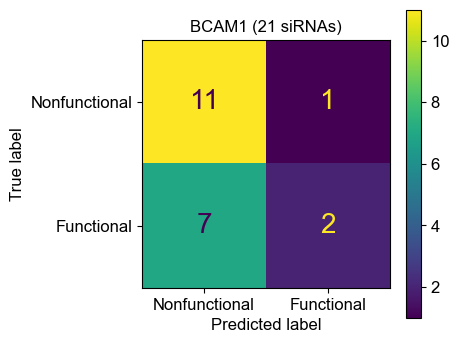

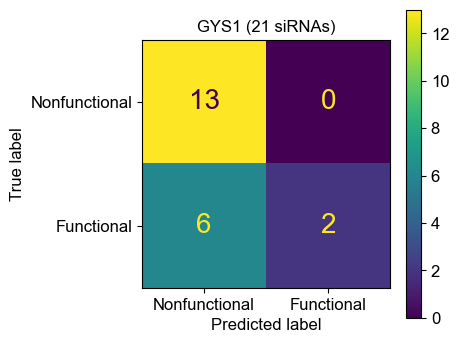

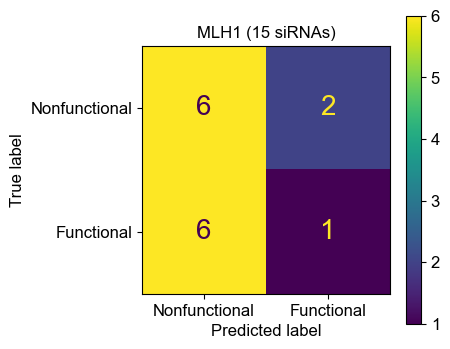

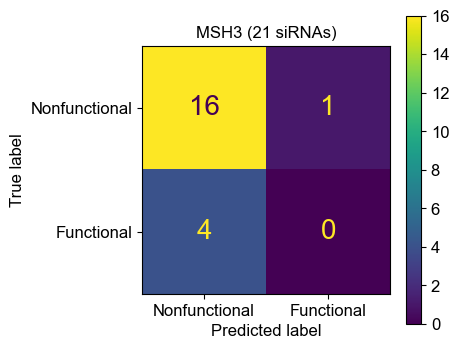

In [81]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)



for gene_ in ['BCAM1','GYS1','MLH1','MSH3']: # list(df['gene'].value_counts().index)
    fig,ax = plt.subplots()
    fig.set_size_inches(w=4,h=4)
    print(gene_)

    cm = confusion_matrix(df_combined[df_combined['gene_y'] == gene_]['actually_functional'],
                 df_combined[df_combined['gene_y'] == gene_]['predicted_functional'] )

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Nonfunctional","Functional"])
    disp.plot(ax=ax)

    for txt in ax.texts:
        txt.set_fontsize(20)
    ax.set_title(gene_+' ('+str(len(df_combined[df_combined['gene_y'] == gene_]))+' siRNAs)')



# Confusion Matrixes with new data `df`

In [82]:
df['predicted_functional'] = df['raw_probabilities_mean'].apply(lambda x: x>0.5)
df['actually_functional'] = df['normalized_expression_percent'].apply(lambda x: x<35)

df
df['actually_functional']

for gene_ in ['BCAM1','GYS1','MLH1','MSH3']: # list(df['gene'].value_counts().index)
    print(gene_)
    display(df[df['gene'] == gene_]['predicted_functional'].value_counts())
    display(df[df['gene'] == gene_]['actually_functional'].value_counts())
    print('\n\n')

    

BCAM1


True     20
False    10
Name: predicted_functional, dtype: int64

False    22
True      8
Name: actually_functional, dtype: int64




GYS1


True     20
False    10
Name: predicted_functional, dtype: int64

False    16
True     14
Name: actually_functional, dtype: int64




MLH1


True     20
False    10
Name: predicted_functional, dtype: int64

True     16
False    14
Name: actually_functional, dtype: int64




MSH3


True     20
False    10
Name: predicted_functional, dtype: int64

False    20
True     10
Name: actually_functional, dtype: int64

BCAM1
GYS1
MLH1
MSH3


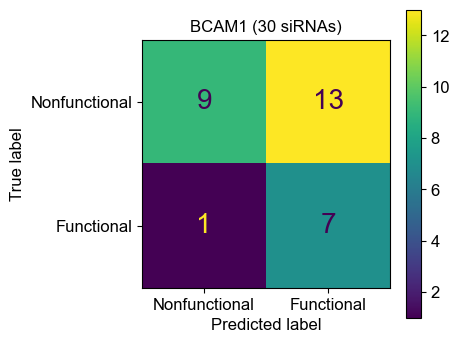

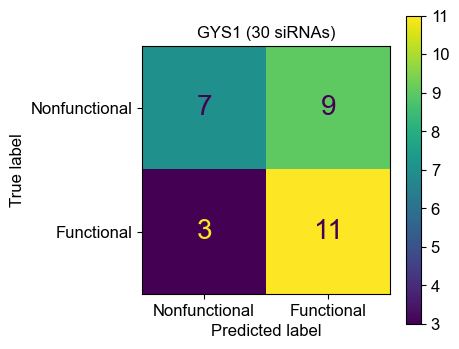

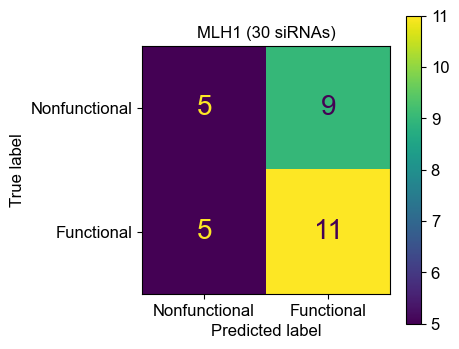

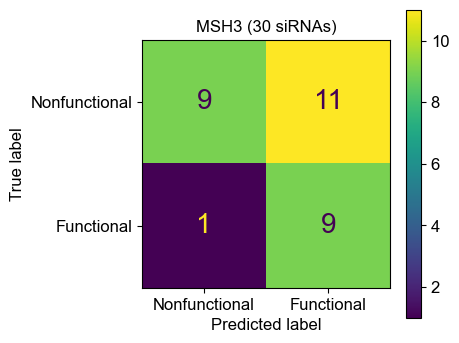

In [83]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)



for gene_ in ['BCAM1','GYS1','MLH1','MSH3']: # list(df['gene'].value_counts().index)
    fig,ax = plt.subplots()
    fig.set_size_inches(w=4,h=4)
    print(gene_)

    cm = confusion_matrix(df[df['gene'] == gene_]['actually_functional'],
                 df[df['gene'] == gene_]['predicted_functional'] )

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Nonfunctional","Functional"])
    disp.plot(ax=ax)

    for txt in ax.texts:
        txt.set_fontsize(20)
    ax.set_title(gene_+' ('+str(len(df[df['gene'] == gene_]))+' siRNAs)')



# Combine old and new data into single set `df_old_new`

In [84]:
df.columns

Index(['oligo', 'position', 'gene', 'Replicate_1', 'Replicate_2',
       'Replicate_3', 'avg_raw_expression_percent',
       'std_raw_expression_percent', 'normalized_expression_percent',
       'std_norm_expression_percent', 'Oligo_ID',
       'Target_Region_Sequence_20mer', 'Gene_region', 'GC_content',
       'Revcomp_Guide', 'Oligo_ID_sense', 'Oligo_ID_antisense', 'Score',
       'Region', 'Hits2microRNA', 'refseq_seed', 'hits2accessions',
       'hits2gIDs', 'gIDs', 'Accessions', 'hits2mouse', 'hits2mm', 'hits2mf',
       'hits2human', 'hits2rat', 'in_top', 'previously_screened_16mer',
       'flanking_sequence', 'seqs_to_embed', 'GloVe_embedded_sequences',
       'raw_prob_preds_1', 'raw_prob_preds_2', 'raw_prob_preds_3',
       'raw_prob_preds_4', 'raw_prob_preds_5', 'raw_prob_preds_6',
       'raw_prob_preds_7', 'raw_prob_preds_8', 'raw_prob_preds_9',
       'raw_prob_preds_10', 'raw_probabilities_mean', 'raw_probabilities_std',
       'aver', 'max', 'unknown_AK_scoring', 'posit

In [85]:
df_combined[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10',
    'oligo_name',##
    'gene_y',##
    'predicted_functional',
    'actually_functional',
    'raw_probabilities_mean',
    'aver',
    'max',
    'position',
    'avg_expression_percent',##
    'normalized_expression_percent']]

df_combined['oligo'] = df_combined['oligo_name']
df_combined['gene'] = df_combined['gene_y']
df_combined['avg_raw_expression_percent'] = df_combined['avg_expression_percent']

df_combined['old_screen_or_new'] = len(df_combined)*['old']

df['old_screen_or_new'] = len(df)*['new']


In [86]:
df_old_new = (df_combined[[
            'oligo',##
            'gene',##
            'predicted_functional',
            'actually_functional',
     'raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10',
    
            'raw_probabilities_mean',
            'aver',
            'max',
            'position',
            'avg_raw_expression_percent',##
            'normalized_expression_percent',
            'old_screen_or_new',
]]).append((df[[
    'oligo',##
    'gene',##
    'predicted_functional',
    'actually_functional',
 'raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10',
    
    'raw_probabilities_mean',
    'aver',
    'max',
    'position',
    'avg_raw_expression_percent',##
    'normalized_expression_percent','old_screen_or_new']]),ignore_index=True)

    

df_old_new


/var/folders/j7/bnr07l810hn_c_x_0b1rf2rh0000gp/T/ipykernel_21709/2391034002.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_old_new = (df_combined[[


oligo   gene  predicted_functional  actually_functional  \
0      MLH1_580   MLH1                  True                 True   
1      MLH1_578   MLH1                  True                False   
2    BCAM1_1030  BCAM1                  True                 True   
3     GYS1_3050   GYS1                  True                 True   
4     BCAM1_147  BCAM1                  True                 True   
..          ...    ...                   ...                  ...   
193   MSH3_4010   MSH3                 False                False   
194   MSH3_4035   MSH3                 False                False   
195   MSH3_4036   MSH3                 False                False   
196   MSH3_4068   MSH3                 False                False   
197   MSH3_4069   MSH3                 False                False   

     raw_prob_preds_1  raw_prob_preds_2  raw_prob_preds_3  raw_prob_preds_4  \
0            0.489886          0.522860          0.523478          0.521240   
1            0.510816          0.531920          0.507199          0.532700   
2            0.542173          0.522829          0.519606          0.524784   
3            0.530530          0.525590          0.520618          0.489031   
4            0.499403          0.509483          0.489794          0.527536   
..                ...               ...               ...               ...   
193          0.432268          0.411023          0.427649          0.423220   
194          0.434745          0.449677          0.411295          0.427558   
195          0.429446          0.449793          0.421434          0.425195   
196          0.443764          0.435206          0.432979          0.452194   
197          0.441492          0.439797          0.420430          0.429036   

     raw_prob_preds_5  raw_prob_preds_6  ...  raw_prob_preds_8  \
0            0.522266          0.537053  ...          0.522836   
1            0.509908          0.526346  ...          0.502178   
2            0.507740          0.507478  ...          0.506249   
3            0.505680          0.525554  ...          0.489741   
4            0.498614          0.493165  ...          0.515158   
..                ...               ...  ...               ...   
193          0.442365          0.438566  ...          0.472277   
194          0.458531          0.464138  ...          0.452185   
195          0.432610          0.417311  ...          0.435652   
196          0.448816          0.456890  ...          0.430380   
197          0.432132          0.449837  ...          0.449796   

     raw_prob_preds_9  raw_prob_preds_10  raw_probabilities_mean      aver  \
0            0.510149           0.520215                0.519438  0.519438   
1            0.525081           0.505109                0.516625  0.516625   
2            0.498033           0.509864                0.512919  0.512919   
3            0.493699           0.495246                0.507646  0.507646   
4            0.524555           0.503203                0.506661  0.506661   
..                ...                ...                     ...       ...   
193          0.421920           0.443915                0.435881  0.435881   
194          0.444067           0.457238                0.442022  0.442022   
195          0.440811           0.442939                0.433067  0.433067   
196          0.423178           0.450153                0.439591  0.439591   
197          0.424620           0.446935                0.435852  0.435852   

          max  position  avg_raw_expression_percent  \
0    0.537053       580                   20.909093   
1    0.532700       578                   75.514644   
2    0.542173      1030                   13.537658   
3    0.530530      3050                   43.044598   
4    0.527536       147                   10.406638   
..        ...       ...                         ...   
193  0.472277      4010                   55.671260   
194  0.464138      4035                   67.114107   
195  0.

# new data --> `df`
# old data --> `df_combined`

In [88]:
len(df_combined)+len(df)

198

In [90]:
len(df_old_new)

198

In [89]:
df_old_new

oligo   gene  predicted_functional  actually_functional  \
0      MLH1_580   MLH1                  True                 True   
1      MLH1_578   MLH1                  True                False   
2    BCAM1_1030  BCAM1                  True                 True   
3     GYS1_3050   GYS1                  True                 True   
4     BCAM1_147  BCAM1                  True                 True   
..          ...    ...                   ...                  ...   
193   MSH3_4010   MSH3                 False                False   
194   MSH3_4035   MSH3                 False                False   
195   MSH3_4036   MSH3                 False                False   
196   MSH3_4068   MSH3                 False                False   
197   MSH3_4069   MSH3                 False                False   

     raw_prob_preds_1  raw_prob_preds_2  raw_prob_preds_3  raw_prob_preds_4  \
0            0.489886          0.522860          0.523478          0.521240   
1            0.510816          0.531920          0.507199          0.532700   
2            0.542173          0.522829          0.519606          0.524784   
3            0.530530          0.525590          0.520618          0.489031   
4            0.499403          0.509483          0.489794          0.527536   
..                ...               ...               ...               ...   
193          0.432268          0.411023          0.427649          0.423220   
194          0.434745          0.449677          0.411295          0.427558   
195          0.429446          0.449793          0.421434          0.425195   
196          0.443764          0.435206          0.432979          0.452194   
197          0.441492          0.439797          0.420430          0.429036   

     raw_prob_preds_5  raw_prob_preds_6  ...  raw_prob_preds_8  \
0            0.522266          0.537053  ...          0.522836   
1            0.509908          0.526346  ...          0.502178   
2            0.507740          0.507478  ...          0.506249   
3            0.505680          0.525554  ...          0.489741   
4            0.498614          0.493165  ...          0.515158   
..                ...               ...  ...               ...   
193          0.442365          0.438566  ...          0.472277   
194          0.458531          0.464138  ...          0.452185   
195          0.432610          0.417311  ...          0.435652   
196          0.448816          0.456890  ...          0.430380   
197          0.432132          0.449837  ...          0.449796   

     raw_prob_preds_9  raw_prob_preds_10  raw_probabilities_mean      aver  \
0            0.510149           0.520215                0.519438  0.519438   
1            0.525081           0.505109                0.516625  0.516625   
2            0.498033           0.509864                0.512919  0.512919   
3            0.493699           0.495246                0.507646  0.507646   
4            0.524555           0.503203                0.506661  0.506661   
..                ...                ...                     ...       ...   
193          0.421920           0.443915                0.435881  0.435881   
194          0.444067           0.457238                0.442022  0.442022   
195          0.440811           0.442939                0.433067  0.433067   
196          0.423178           0.450153                0.439591  0.439591   
197          0.424620           0.446935                0.435852  0.435852   

          max  position  avg_raw_expression_percent  \
0    0.537053       580                   20.909093   
1    0.532700       578                   75.514644   
2    0.542173      1030                   13.537658   
3    0.530530      3050                   43.044598   
4    0.527536       147                   10.406638   
..        ...       ...                         ...   
193  0.472277      4010                   55.671260   
194  0.464138      4035                   67.114107   
195  0.

BCAM1
Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	BCAM1_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	BCAM1_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg
GYS1
Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	GYS1_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	GYS1_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg
MLH1
Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	MLH1_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	MLH1_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg
MSH3
Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_pape

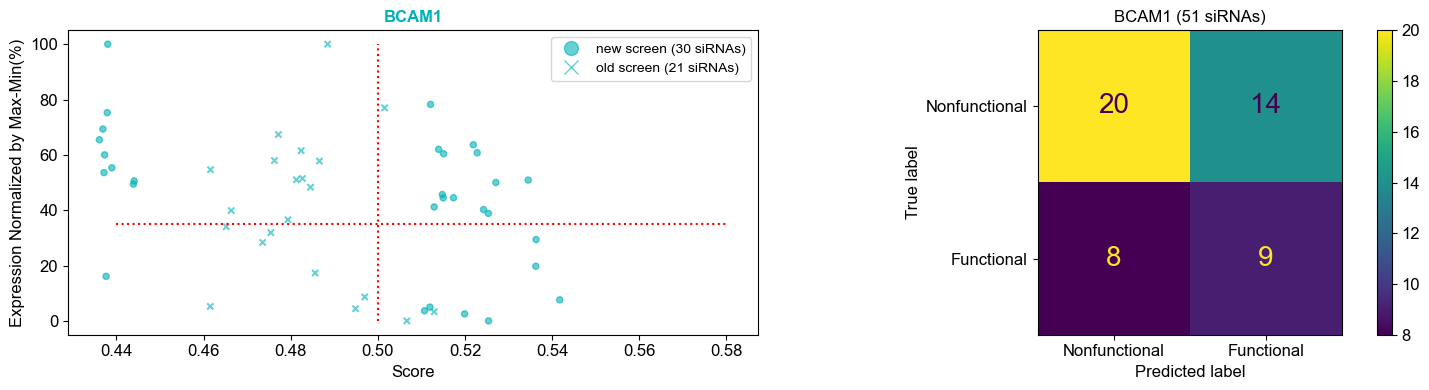

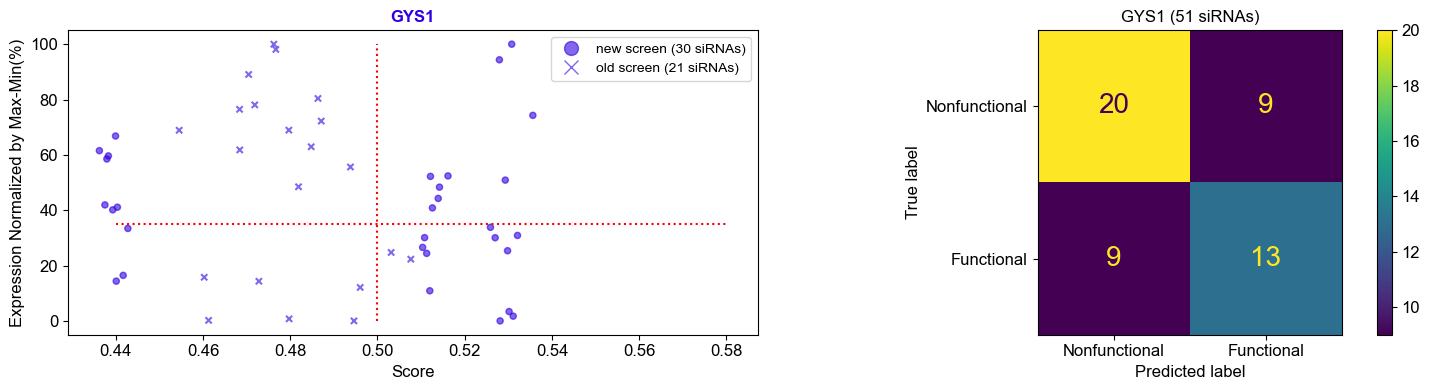

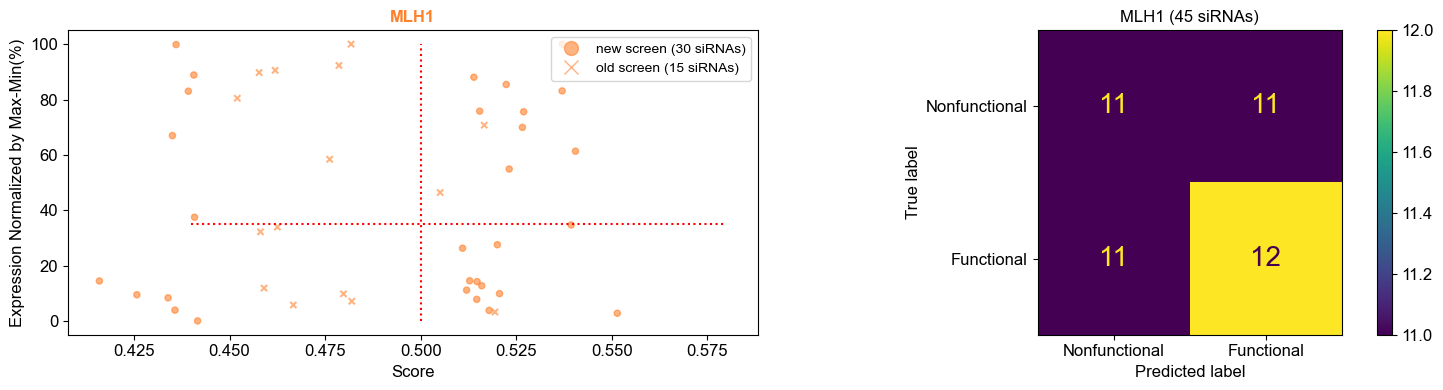

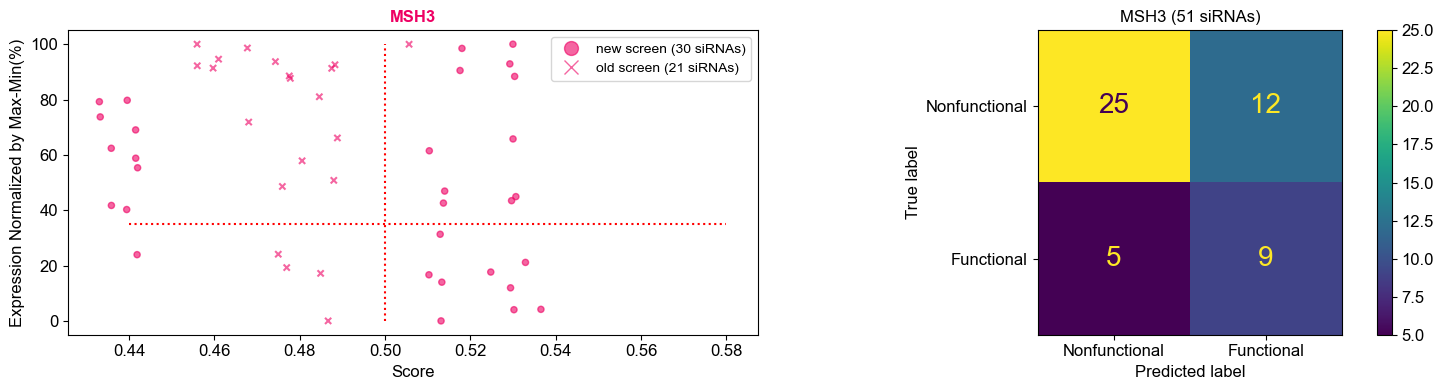

In [196]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)



for gene_ in ['BCAM1','GYS1','MLH1','MSH3']: # list(df['gene'].value_counts().index)
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)
    print(gene_)

    colors_ls_new_screen= df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'new') ]['gene'].apply(lambda x: gene_color_dict[x])
    
    
    df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
        
        x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        c=colors_ls_new_screen,
    
        ax=axs[0],
    )

    
    colors_ls_old_screen= df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'old') ]['gene'].apply(lambda x: gene_color_dict[x])
    
    
    df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
        
        x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='x',
        alpha=0.6,
        c=colors_ls_old_screen,
    
        ax=axs[0],
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    legend_elements=[
        Line2D([0],[0],marker='o',color=gene_color_dict[gene_],linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
        Line2D([0],[0],marker='x',color=gene_color_dict[gene_],linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
    ]
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)
    
    axs[0].vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')


    axs[0].hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')

    
    axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel('Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')
    

    cm = confusion_matrix(df_old_new[df_old_new['gene'] == gene_]['actually_functional'],
                 df_old_new[df_old_new['gene'] == gene_]['predicted_functional'] )

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])
    disp.plot(ax=axs[1])

    for txt in axs[1].texts:
        txt.set_fontsize(20)
    axs[1].set_title(gene_+' ('+str(len(df_old_new[df_old_new['gene'] == gene_]))+' siRNAs)')

    ## Save Figure
    fnm_final_ = gene_.upper()+'_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'
    
    fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
    fig.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
    fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
    fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
    print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')


    

# Plotted All Genes and Old and New Screens Together

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	Combined_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	Combined_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


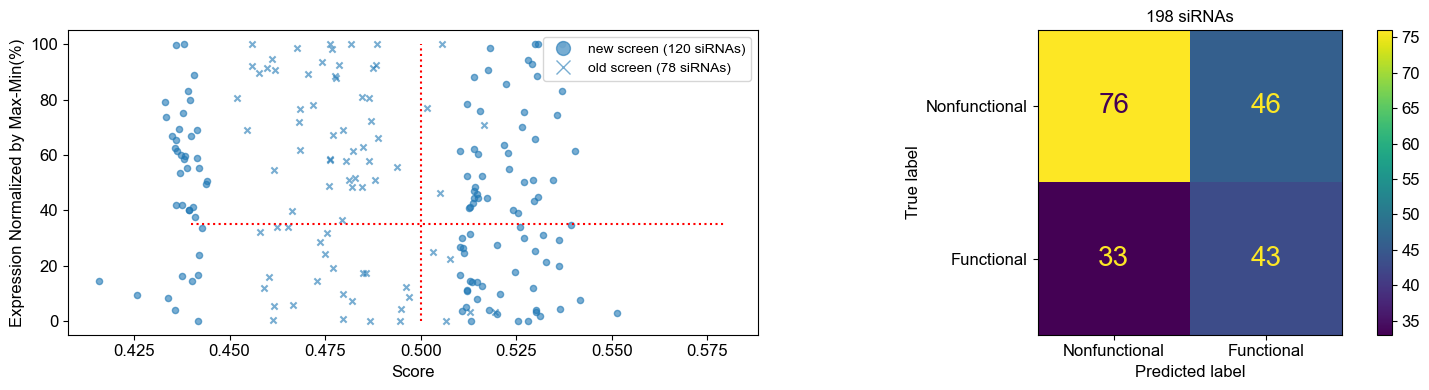

In [198]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)



fig,axs = plt.subplots(1,2)
fig.set_size_inches(w=15,h=4)



df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
    
    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='x',
    alpha=0.6,
    #c=colors_ls_new_screen,

    ax=axs[0],
)




df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
    
    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='o',
    alpha=0.6,
    #c=colors_ls_old_screen,

    ax=axs[0],
)

# Legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements=[
    Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
    Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
]
axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)

axs[0].vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')


axs[0].hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')


# axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')

axs[0].set_xlabel('Score')
axs[0].set_ylabel('Expression Normalized by Max-Min(%)')


cm = confusion_matrix(df_old_new['actually_functional'],
             df_old_new['predicted_functional'] )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Nonfunctional","Functional"])
disp.plot(ax=axs[1])
for txt in axs[1].texts:
    txt.set_fontsize(20)
axs[1].set_title(str(len(df_old_new))+' siRNAs')

## Save Figure
fnm_final_ = 'Combined_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')


# No BCAM1

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	NO-BCAM1_Combined_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	NO-BCAM1_Combined_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


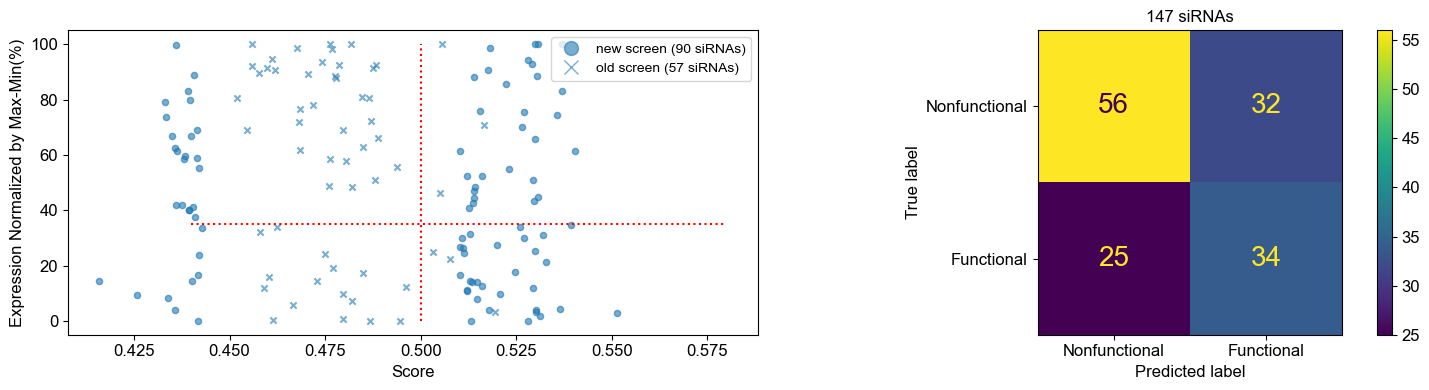

In [320]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)



fig,axs = plt.subplots(1,2)
fig.set_size_inches(w=15,h=4)



df_old_new[ (df_old_new['old_screen_or_new'] == 'old') & (df_old_new['gene'] != 'BCAM1')].plot.scatter(
    
    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='x',
    alpha=0.6,
    #c=colors_ls_new_screen,

    ax=axs[0],
)




df_old_new[(df_old_new['old_screen_or_new'] == 'new') & (df_old_new['gene'] != 'BCAM1')].plot.scatter(
    
    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='o',
    alpha=0.6,
    #c=colors_ls_old_screen,

    ax=axs[0],
)

# Legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements=[
    Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') & (df_old_new['gene'] != 'BCAM1')]))+' siRNAs)',alpha=0.6),
    Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') & (df_old_new['gene'] != 'BCAM1')]))+' siRNAs)',alpha=0.6),
]
axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)

axs[0].vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')


axs[0].hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')


# axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')

axs[0].set_xlabel('Score')
axs[0].set_ylabel('Expression Normalized by Max-Min(%)')


cm = confusion_matrix(df_old_new[(df_old_new['gene'] != 'BCAM1')]['actually_functional'],
             df_old_new[(df_old_new['gene'] != 'BCAM1')]['predicted_functional'] )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Nonfunctional","Functional"])
disp.plot(ax=axs[1])
for txt in axs[1].texts:
    txt.set_fontsize(20)
axs[1].set_title(str(len(df_old_new[(df_old_new['gene'] != 'BCAM1')]))+' siRNAs')

## Save Figure
fnm_final_ = 'NO-BCAM1_Combined_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')


# TODO: plot only PREDICTED FUNCTIONAL (TP and FP) by Position to see if any patterns to discern those False positives

Text(0.5, 1.0, '198 siRNAs')

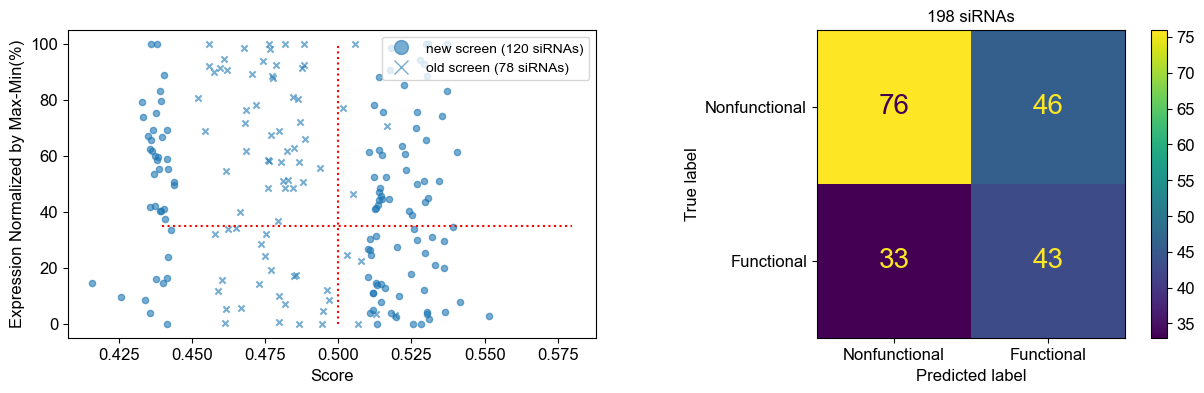

In [200]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)



fig,axs = plt.subplots(1,2)
fig.set_size_inches(w=15,h=4)



df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
    
    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='x',
    alpha=0.6,
    #c=colors_ls_new_screen,

    ax=axs[0],
)




df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
    
    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='o',
    alpha=0.6,
    #c=colors_ls_old_screen,

    ax=axs[0],
)

# Legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements=[
    Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
    Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
]
axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)

axs[0].vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')


axs[0].hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')


# axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')

axs[0].set_xlabel('Score')
axs[0].set_ylabel('Expression Normalized by Max-Min(%)')


cm = confusion_matrix(df_old_new['actually_functional'],
             df_old_new['predicted_functional'] )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Nonfunctional","Functional"])
disp.plot(ax=axs[1])
for txt in axs[1].texts:
    txt.set_fontsize(20)
axs[1].set_title(str(len(df_old_new))+' siRNAs')




# TODO: rescore old data with model (to be sure have correct score values)

In [ ]:
ConfusionMatrixDisplay.()

# Check distribution of scores (standard deviation of scores)

In [201]:
max( df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].apply(lambda x: np.std(x),axis=1))

0.025043650226378368

In [95]:
df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].apply(lambda x: np.std(x),axis=1)

0      0.011602
1      0.010817
2      0.014060
3      0.015496
4      0.011971
         ...   
193    0.016084
194    0.016783
195    0.009532
196    0.011775
197    0.010558
Length: 198, dtype: float64

In [96]:
df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']]

raw_prob_preds_1  raw_prob_preds_2  raw_prob_preds_3  raw_prob_preds_4  \
0            0.489886          0.522860          0.523478          0.521240   
1            0.510816          0.531920          0.507199          0.532700   
2            0.542173          0.522829          0.519606          0.524784   
3            0.530530          0.525590          0.520618          0.489031   
4            0.499403          0.509483          0.489794          0.527536   
..                ...               ...               ...               ...   
193          0.432268          0.411023          0.427649          0.423220   
194          0.434745          0.449677          0.411295          0.427558   
195          0.429446          0.449793          0.421434          0.425195   
196          0.443764          0.435206          0.432979          0.452194   
197          0.441492          0.439797          0.420430          0.429036   

     raw_prob_preds_5  raw_prob_preds_6  raw_prob_preds_7  raw_prob_preds_8  \
0            0.522266          0.537053          0.524400          0.522836   
1            0.509908          0.526346          0.514988          0.502178   
2            0.507740          0.507478          0.490437          0.506249   
3            0.505680          0.525554          0.500771          0.489741   
4            0.498614          0.493165          0.505700          0.515158   
..                ...               ...               ...               ...   
193          0.442365          0.438566          0.445610          0.472277   
194          0.458531          0.464138          0.420784          0.452185   
195          0.432610          0.417311          0.435477          0.435652   
196          0.448816          0.456890          0.422349          0.430380   
197          0.432132          0.449837          0.424444          0.449796   

     raw_prob_preds_9  raw_prob_preds_10  
0            0.510149           0.520215  
1            0.525081           0.505109  
2            0.498033           0.509864  
3            0.493699           0.495246  
4            0.524555           0.503203  
..                ...                ...  
193          0.421920           0.443915  
194          0.444067           0.457238  
195          0.440811           0.442939  
196          0.423178           0.450153  
197          0.424620           0.446935  

[198 rows x 10 columns]

In [97]:
df_old_new['min_pred_score'] = df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].apply(lambda x: min(x),axis=1)

In [98]:
df_old_new['max_pred_score'] = df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].apply(lambda x: max(x),axis=1)

In [99]:
df_old_new['q25_pred_score'] = df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].apply(lambda x: np.quantile(x,q=0.25),axis=1)

df_old_new['q75_pred_score'] = df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].apply(lambda x: np.quantile(x,q=0.75),axis=1)


In [100]:
df_old_new['median_pred_score'] = df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].apply(lambda x: np.median(x),axis=1)

In [101]:
df_old_new['mean_pred_score'] = df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].apply(lambda x: np.mean(x),axis=1)

# TODO: Max-min Normalized within whole dataset
# TODO: Max-min Normalized within Each gene

In [102]:
df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']]

raw_prob_preds_1  raw_prob_preds_2  raw_prob_preds_3  raw_prob_preds_4  \
0            0.489886          0.522860          0.523478          0.521240   
1            0.510816          0.531920          0.507199          0.532700   
2            0.542173          0.522829          0.519606          0.524784   
3            0.530530          0.525590          0.520618          0.489031   
4            0.499403          0.509483          0.489794          0.527536   
..                ...               ...               ...               ...   
193          0.432268          0.411023          0.427649          0.423220   
194          0.434745          0.449677          0.411295          0.427558   
195          0.429446          0.449793          0.421434          0.425195   
196          0.443764          0.435206          0.432979          0.452194   
197          0.441492          0.439797          0.420430          0.429036   

     raw_prob_preds_5  raw_prob_preds_6  raw_prob_preds_7  raw_prob_preds_8  \
0            0.522266          0.537053          0.524400          0.522836   
1            0.509908          0.526346          0.514988          0.502178   
2            0.507740          0.507478          0.490437          0.506249   
3            0.505680          0.525554          0.500771          0.489741   
4            0.498614          0.493165          0.505700          0.515158   
..                ...               ...               ...               ...   
193          0.442365          0.438566          0.445610          0.472277   
194          0.458531          0.464138          0.420784          0.452185   
195          0.432610          0.417311          0.435477          0.435652   
196          0.448816          0.456890          0.422349          0.430380   
197          0.432132          0.449837          0.424444          0.449796   

     raw_prob_preds_9  raw_prob_preds_10  
0            0.510149           0.520215  
1            0.525081           0.505109  
2            0.498033           0.509864  
3            0.493699           0.495246  
4            0.524555           0.503203  
..                ...                ...  
193          0.421920           0.443915  
194          0.444067           0.457238  
195          0.440811           0.442939  
196          0.423178           0.450153  
197          0.424620           0.446935  

[198 rows x 10 columns]

In [103]:
(df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']])

raw_prob_preds_1  raw_prob_preds_2  raw_prob_preds_3  raw_prob_preds_4  \
0            0.489886          0.522860          0.523478          0.521240   
1            0.510816          0.531920          0.507199          0.532700   
2            0.542173          0.522829          0.519606          0.524784   
3            0.530530          0.525590          0.520618          0.489031   
4            0.499403          0.509483          0.489794          0.527536   
..                ...               ...               ...               ...   
193          0.432268          0.411023          0.427649          0.423220   
194          0.434745          0.449677          0.411295          0.427558   
195          0.429446          0.449793          0.421434          0.425195   
196          0.443764          0.435206          0.432979          0.452194   
197          0.441492          0.439797          0.420430          0.429036   

     raw_prob_preds_5  raw_prob_preds_6  raw_prob_preds_7  raw_prob_preds_8  \
0            0.522266          0.537053          0.524400          0.522836   
1            0.509908          0.526346          0.514988          0.502178   
2            0.507740          0.507478          0.490437          0.506249   
3            0.505680          0.525554          0.500771          0.489741   
4            0.498614          0.493165          0.505700          0.515158   
..                ...               ...               ...               ...   
193          0.442365          0.438566          0.445610          0.472277   
194          0.458531          0.464138          0.420784          0.452185   
195          0.432610          0.417311          0.435477          0.435652   
196          0.448816          0.456890          0.422349          0.430380   
197          0.432132          0.449837          0.424444          0.449796   

     raw_prob_preds_9  raw_prob_preds_10  
0            0.510149           0.520215  
1            0.525081           0.505109  
2            0.498033           0.509864  
3            0.493699           0.495246  
4            0.524555           0.503203  
..                ...                ...  
193          0.421920           0.443915  
194          0.444067           0.457238  
195          0.440811           0.442939  
196          0.423178           0.450153  
197          0.424620           0.446935  

[198 rows x 10 columns]

In [104]:
# df_old_new['normalized_whole_dataset_pred_score'] = 
min_whole_dataset_ = min(df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].apply(lambda x: min(x)))

max_whole_dataset_ = max(df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].apply(lambda x: max(x)))



<AxesSubplot:>

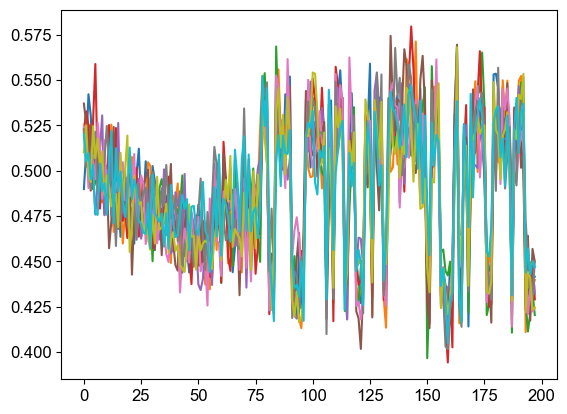

In [105]:
df_old_new[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']].plot(legend=False)

# Normalize Scores by Round (whole dataset ie not split by gene)

In [106]:
for raw_prob_ct_ in [1,2,3,4,5,6,7,8,9,10]:
    df_old_new['raw_prob_preds_'+str(raw_prob_ct_)]
    
    max_ = max(df_old_new['raw_prob_preds_'+str(raw_prob_ct_)])
    min_ = min(df_old_new['raw_prob_preds_'+str(raw_prob_ct_)])

    df_old_new['prob_preds_norm_by_round_'+str(raw_prob_ct_)] = df_old_new['raw_prob_preds_'+str(raw_prob_ct_)].apply(lambda x: np.round(100*((x-min_)/(max_-min_)),1) )




<AxesSubplot:>

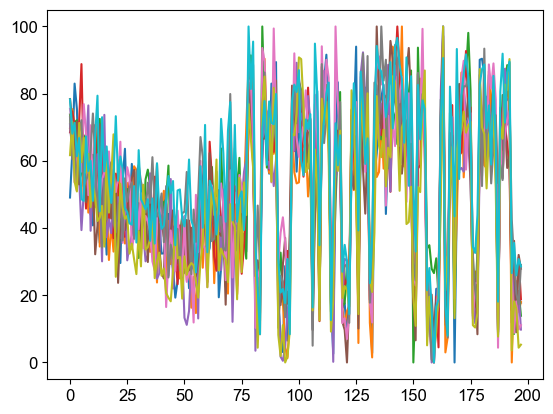

In [107]:
 df_old_new[['prob_preds_norm_by_round_'+str(x+1) for x in list(range(10))]].plot(legend=False)


In [108]:
df_old_new['mean_prob_preds_norm_by_round'] = df_old_new[['prob_preds_norm_by_round_'+str(x+1) for x in list(range(10))]].apply(lambda x: np.mean(x),axis=1)
df_old_new['mean_prob_preds_norm_by_round']


0      69.90
1      68.14
2      65.88
3      62.73
4      62.05
       ...  
193    18.10
194    22.09
195    16.50
196    20.22
197    18.02
Name: mean_prob_preds_norm_by_round, Length: 198, dtype: float64

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	combined-mean-probs-norm_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	combined-mean-probs-norm_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


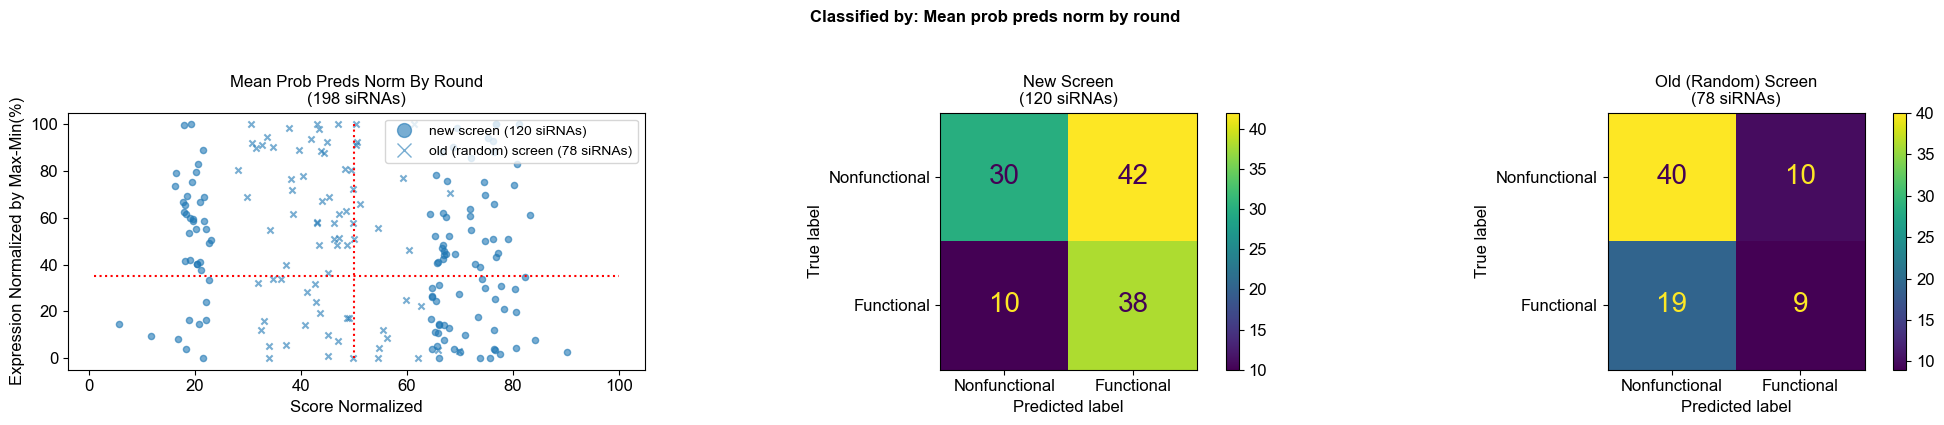

In [203]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






for sc_ in ['mean_prob_preds_norm_by_round']:
    fig,axs = plt.subplots(1,3)
    fig.set_size_inches(w=20,h=4)


    
    df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
    
        x=sc_,
        # x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        
        marker='x',
        alpha=0.6,
        #c=colors_ls_new_screen,
    
        ax=axs[0],
    )
    
    
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
    
        x=sc_,
        # x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        #c=colors_ls_old_screen,
    
        ax=axs[0],
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    legend_elements=[
        Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
        Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old (random) screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
    ]
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)
    
    axs[0].vlines(x=50,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    
    axs[0].hlines(y=35,xmin=1,xmax=100,linestyle='dotted',color='red')
    
    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel('Score Normalized')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')
    axs[0].set_title(sc_.replace('_',' ').title()+'\n('+str(len(df_old_new))+' siRNAs)')

    
    # TODO: recompute confusion matrix
    cm1 = confusion_matrix(df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['actually_functional'],
                 df_old_new[(df_old_new['old_screen_or_new'] == 'new')][sc_].apply(lambda x: x > 50) )

    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                                  display_labels=["Nonfunctional","Functional"])
    
    disp1.plot(ax=axs[1])
    axs[1].set_title('New Screen'+'\n('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)')
    for txt in axs[1].texts:
        txt.set_fontsize(20)
        
    cm2 = confusion_matrix(df_old_new[(df_old_new['old_screen_or_new'] == 'old')]['actually_functional'],
                 df_old_new[(df_old_new['old_screen_or_new'] == 'old')][sc_].apply(lambda x: x > 50) )

    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                                  display_labels=["Nonfunctional","Functional"])
    
    disp2.plot(ax=axs[2])
    axs[2].set_title('Old (Random) Screen'+'\n('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'old')]))+' siRNAs)')

    for txt in axs[2].texts:
        txt.set_fontsize(20)
fig.suptitle('Classified by: '+sc_.replace('_',' ').capitalize(),y=1.05,fontweight='bold')

## Save Figure
fnm_final_ = 'combined-mean-probs-norm_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')

    


Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	combined-raw-prob-means_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	combined-raw-prob-means_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


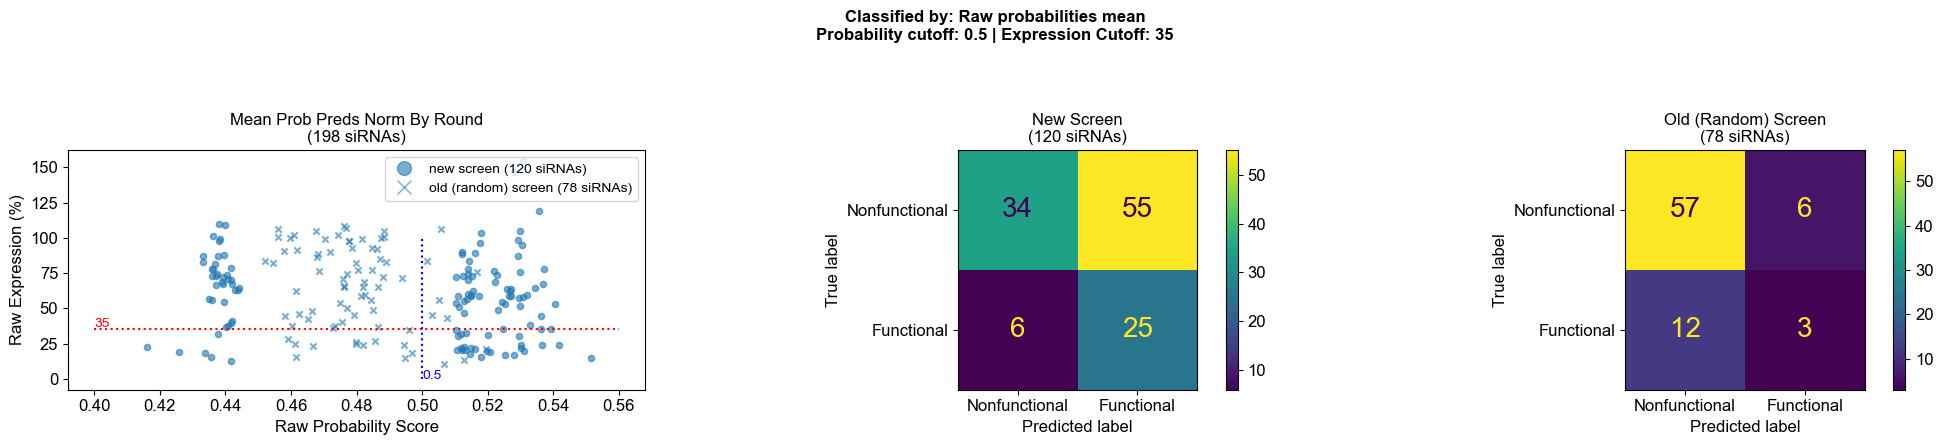

In [204]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






fig,axs = plt.subplots(1,3)
fig.set_size_inches(w=20,h=4)



df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(

    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    y='avg_raw_expression_percent',
    # y='normalized_expression_percent',
    
    marker='x',
    alpha=0.6,
    #c=colors_ls_new_screen,

    ax=axs[0],
)




df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(

    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    y='avg_raw_expression_percent',
    # y='normalized_expression_percent',
    marker='o',
    alpha=0.6,
    #c=colors_ls_old_screen,

    ax=axs[0],
)

# Legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
legend_elements=[
    Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
    Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old (random) screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
]
axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)

prob_co_ = 0.5
axs[0].annotate(str(prob_co_),(prob_co_,0),color='blue')

axs[0].vlines(x=prob_co_,ymin=0,ymax=100,linestyle='dotted',color='blue')

expr_co_ = 35

axs[0].hlines(y=expr_co_,xmin=0.4,xmax=0.56,linestyle='dotted',color='red')
axs[0].annotate(str(expr_co_),(0.40,expr_co_+2),color='red')


# axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')

axs[0].set_xlabel('Raw Probability Score')
axs[0].set_ylabel('Raw Expression (%)')
axs[0].set_title(sc_.replace('_',' ').title()+'\n('+str(len(df_old_new))+' siRNAs)')


# TODO: recompute confusion matrix
cm1 = confusion_matrix(
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['avg_raw_expression_percent'].apply(lambda x: x <= expr_co_),
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['raw_probabilities_mean'].apply(lambda x: x > prob_co_) )
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=["Nonfunctional","Functional"])

disp1.plot(ax=axs[1])
axs[1].set_title('New Screen'+'\n('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)')
for txt in axs[1].texts:
    txt.set_fontsize(20)
    
cm2 = confusion_matrix(
    df_old_new[(df_old_new['old_screen_or_new'] == 'old')]['avg_raw_expression_percent'].apply(lambda x: x <= expr_co_),
    df_old_new[(df_old_new['old_screen_or_new'] == 'old')]['raw_probabilities_mean'].apply(lambda x: x > prob_co_) )

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=["Nonfunctional","Functional"])

disp2.plot(ax=axs[2])
axs[2].set_title('Old (Random) Screen'+'\n('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'old')]))+' siRNAs)')

fig.suptitle('Classified by: '+'raw_probabilities_mean'.replace('_',' ').capitalize() +'\n'+'Probability cutoff: '+str(prob_co_)+' | '+'Expression Cutoff: '+str(expr_co_),y=1.1,fontweight='bold')

for txt in axs[2].texts:
    txt.set_fontsize(20)

## Save Figure
fnm_final_ = 'combined-raw-prob-means_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')

    


Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	NEW_screen_only_raw-prob-mean_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	NEW_screen_only_raw-prob-mean_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


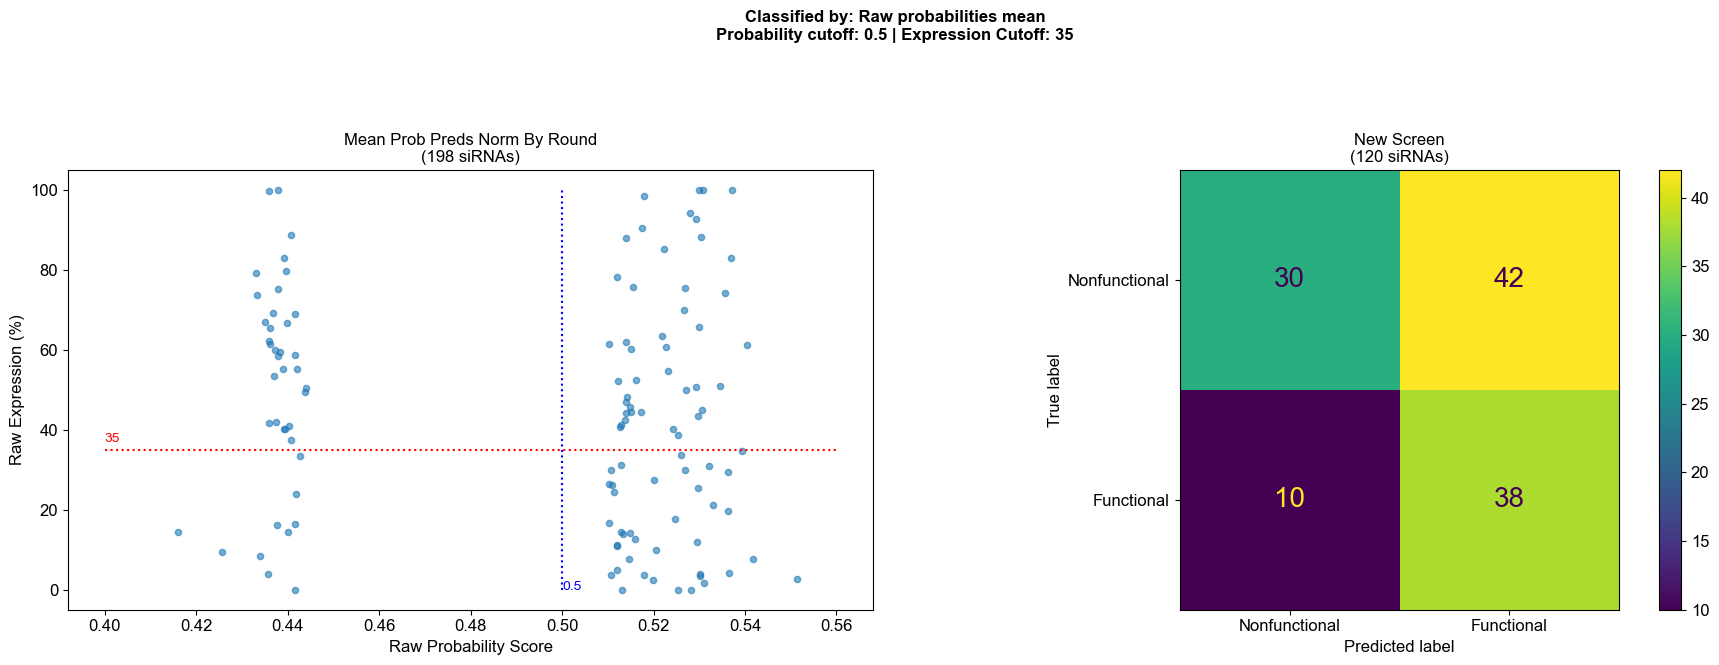

In [206]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






fig,axs = plt.subplots(1,2)
fig.set_size_inches(w=18,h=6)



df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(

    x='raw_probabilities_mean',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    y='normalized_expression_percent',
    # y='normalized_expression_percent',
    marker='o',
    alpha=0.6,
    #c=colors_ls_old_screen,

    ax=axs[0],
)

# df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(

#     x='raw_probabilities_mean',
#     # x = 'score_max_probabilities',
#     # x='position',

#     # y='avg_raw_expression_percent',
#     y='normalized_expression_percent',
#     marker='o',
#     alpha=0.3,
#     #c=colors_ls_old_screen,
#     c = 'red',
#     ax=ax,
# )
# # Legend
# from matplotlib.lines import Line2D
# from matplotlib.patches import Patch
# legend_elements=[
#     Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
#     Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old (random) screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
# ]
# axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)

prob_co_ = 0.5
axs[0].annotate(str(prob_co_),(prob_co_,0),color='blue')

axs[0].vlines(x=prob_co_,ymin=0,ymax=100,linestyle='dotted',color='blue')

expr_co_ = 35

axs[0].hlines(y=expr_co_,xmin=0.4,xmax=0.56,linestyle='dotted',color='red')
axs[0].annotate(str(expr_co_),(0.40,expr_co_+2),color='red')


# axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')

axs[0].set_xlabel('Raw Probability Score')
axs[0].set_ylabel('Raw Expression (%)')
axs[0].set_title(sc_.replace('_',' ').title()+'\n('+str(len(df_old_new))+' siRNAs)')


# TODO: recompute confusion matrix
cm1 = confusion_matrix(
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['normalized_expression_percent'].apply(lambda x: x <= expr_co_),
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['raw_probabilities_mean'].apply(lambda x: x > prob_co_) )
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=["Nonfunctional","Functional"])

disp1.plot(ax=axs[1])
axs[1].set_title('New Screen'+'\n('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)')
for txt in axs[1].texts:
    txt.set_fontsize(20)
    
fig.suptitle('Classified by: '+'raw_probabilities_mean'.replace('_',' ').capitalize() +'\n'+'Probability cutoff: '+str(prob_co_)+' | '+'Expression Cutoff: '+str(expr_co_),y=1.1,fontweight='bold')

## Save Figure
fnm_final_ = 'NEW_screen_only_raw-prob-mean_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')


Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	combined_2_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	combined_2_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


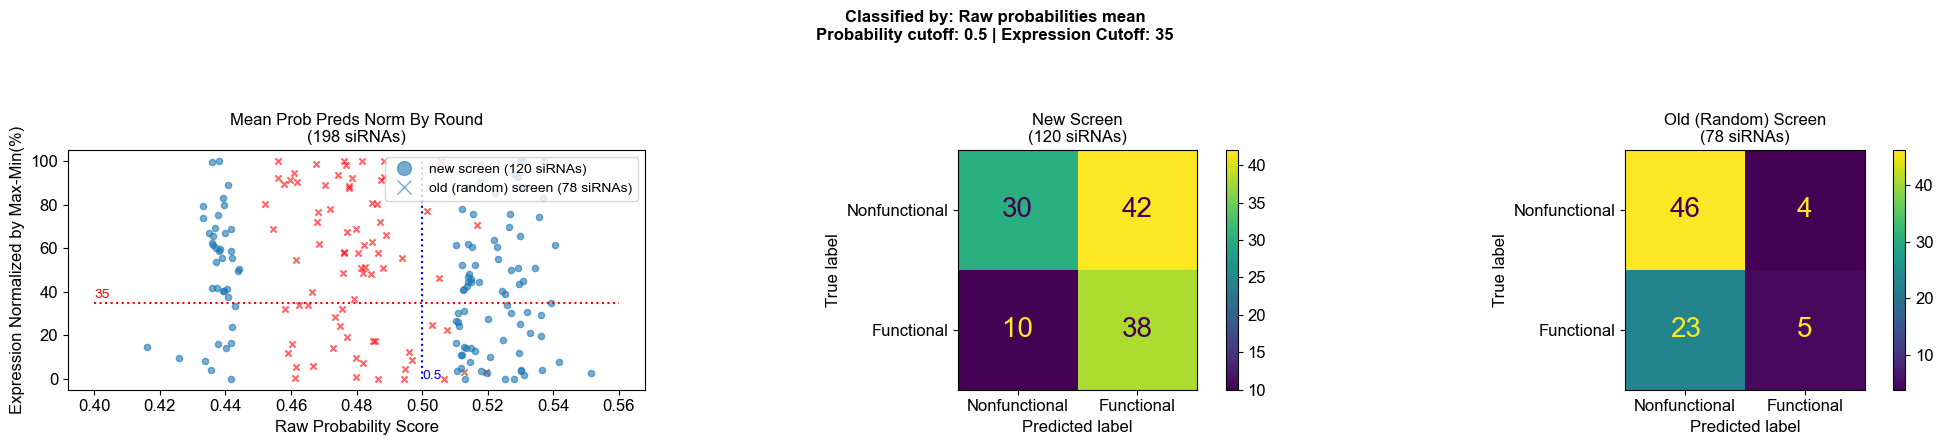

In [207]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






for sc_ in ['mean_prob_preds_norm_by_round']:
    fig,axs = plt.subplots(1,3)
    fig.set_size_inches(w=20,h=4)


    
    df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
    
        x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        
        marker='x',
        alpha=0.6,
        c='red',
        #c=colors_ls_new_screen,
    
        ax=axs[0],
    )
    
    
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
    
        x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        
        #c=colors_ls_old_screen,
    
        ax=axs[0],
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    legend_elements=[
        Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
        Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old (random) screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
    ]
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)

    prob_co_ = 0.5
    axs[0].annotate(str(prob_co_),(prob_co_,0),color='blue')
    
    axs[0].vlines(x=prob_co_,ymin=0,ymax=100,linestyle='dotted',color='blue')
    
    expr_co_ = 35

    axs[0].hlines(y=expr_co_,xmin=0.4,xmax=0.56,linestyle='dotted',color='red')
    axs[0].annotate(str(expr_co_),(0.40,expr_co_+2),color='red')

    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel('Raw Probability Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')
    axs[0].set_title(sc_.replace('_',' ').title()+'\n('+str(len(df_old_new))+' siRNAs)')

    
    # TODO: recompute confusion matrix
    cm1 = confusion_matrix(
        df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['normalized_expression_percent'].apply(lambda x: x <= expr_co_),
        df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['raw_probabilities_mean'].apply(lambda x: x > prob_co_) )
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                                  display_labels=["Nonfunctional","Functional"])
    
    disp1.plot(ax=axs[1])
    axs[1].set_title('New Screen'+'\n('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)')
    for txt in axs[1].texts:
        txt.set_fontsize(20)
        
    cm2 = confusion_matrix(
        df_old_new[(df_old_new['old_screen_or_new'] == 'old')]['normalized_expression_percent'].apply(lambda x: x <= expr_co_),
        df_old_new[(df_old_new['old_screen_or_new'] == 'old')]['raw_probabilities_mean'].apply(lambda x: x > prob_co_) )

    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                                  display_labels=["Nonfunctional","Functional"])
    
    disp2.plot(ax=axs[2])
    axs[2].set_title('Old (Random) Screen'+'\n('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'old')]))+' siRNAs)')

    for txt in axs[2].texts:
        txt.set_fontsize(20)
fig.suptitle('Classified by: '+'raw_probabilities_mean'.replace('_',' ').capitalize() +'\n'+'Probability cutoff: '+str(prob_co_)+' | '+'Expression Cutoff: '+str(expr_co_),y=1.1,fontweight='bold')

## Save Figure
fnm_final_ = 'combined_2_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')

    


Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	all_combined_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	all_combined_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


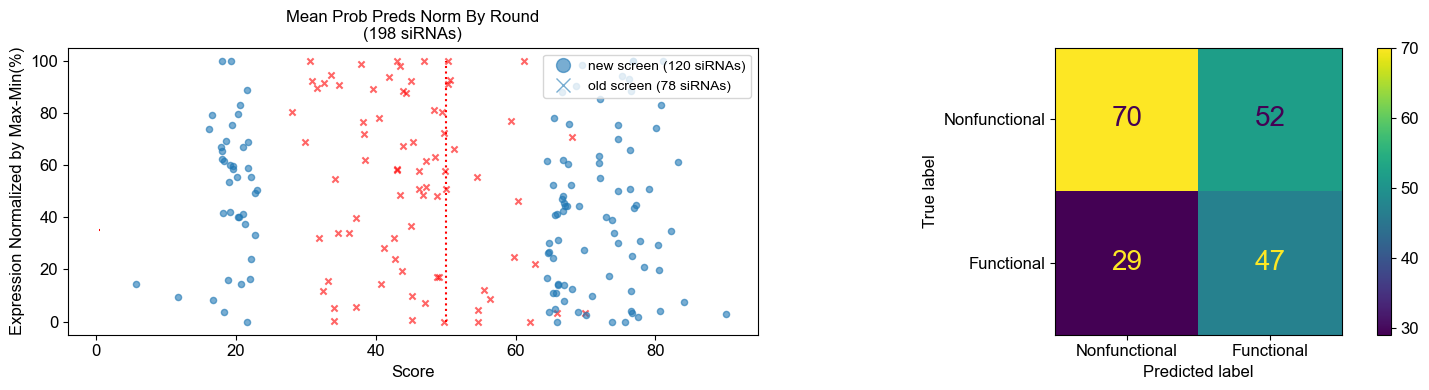

In [208]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






for sc_ in ['mean_prob_preds_norm_by_round']:
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)


    
    df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
    
        x=sc_,
        # x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        
        marker='x',
        alpha=0.6,
        c='red',
        #c=colors_ls_new_screen,
    
        ax=axs[0],
    )
    
    
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
    
        x=sc_,
        # x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        #c=colors_ls_old_screen,
    
        ax=axs[0],
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    legend_elements=[
        Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
        Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
    ]
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)
    
    axs[0].vlines(x=50,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    
    axs[0].hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')
    
    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel('Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')
    
    
     # TODO: recompute confusion matrix
        
    # cm = confusion_matrix(df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['actually_functional'],
    #              df_old_new[(df_old_new['old_screen_or_new'] == 'new')][sc_].apply(lambda x: x > 50) )

    cm = confusion_matrix(df_old_new['actually_functional'],
                 df_old_new[sc_].apply(lambda x: x > 50) )
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])
    
    disp.plot(ax=axs[1])

    for txt in axs[1].texts:
        txt.set_fontsize(20)
        
    axs[0].set_title(sc_.replace('_',' ').title()+'\n('+str(len(df_old_new))+' siRNAs)')
    
## Save Figure
fnm_final_ = 'all_combined_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')


In [783]:
# df_old_new['normalized_whole_dataset_pred_score'] = 


0.579563390118115

In [140]:
def normalize_probabilities_whole_dataset(row):
    max_
    
    return


In [141]:
min( df_old_new['prob_preds_norm_by_round_'+str(raw_prob_ct_)])

0.0

In [142]:
df_old_new[0:4].apply(lambda x: 
        normalize_probabilities_whole_dataset(x[['raw_prob_preds_1','raw_prob_preds_2',
       'raw_prob_preds_3','raw_prob_preds_4','raw_prob_preds_5',
       'raw_prob_preds_6','raw_prob_preds_7','raw_prob_preds_8',
       'raw_prob_preds_9','raw_prob_preds_10']]),
                      
                      axis=1)
                

0    None
1    None
2    None
3    None
dtype: object

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	combined_mean_pred_score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	combined_mean_pred_score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


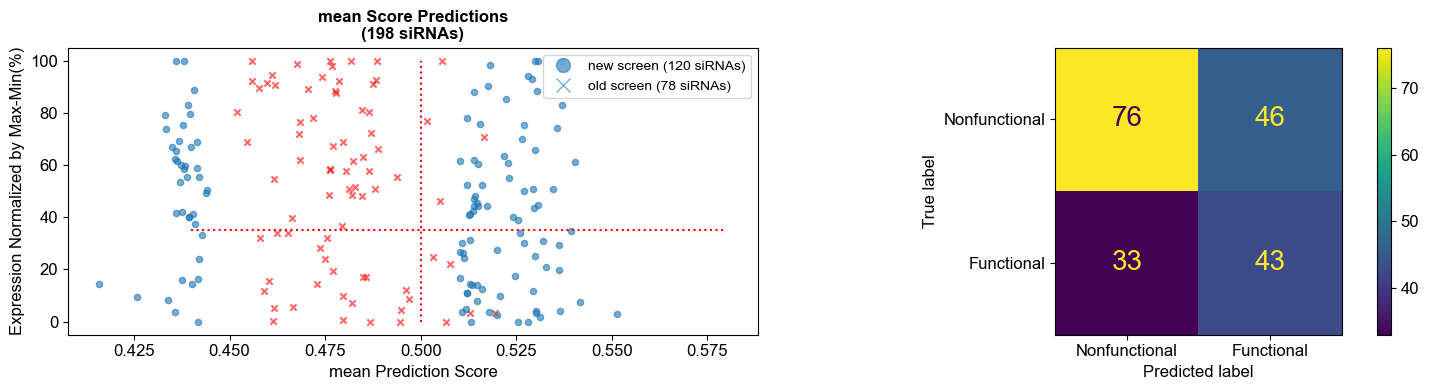

In [211]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:
for sc_ in ['mean_pred_score']:

    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)
    
    df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='x',
        alpha=0.6,
        c='red',
        #c=colors_ls_new_screen,
    
        ax=axs[0],
    )
    
    
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        #c=colors_ls_old_screen,
    
        ax=axs[0],
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    legend_elements=[
        Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
        Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
    ]
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)
    
    axs[0].vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    
    axs[0].hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')
    
    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel(sc_.split('_')[0]+' Prediction Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')

    # TODO: recompute confusion matrix
    
    cm = confusion_matrix(df_old_new['actually_functional'],
                 df_old_new[sc_].apply(lambda x: x > 0.5) )
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])
    disp.plot(ax=axs[1])
    
    for txt in axs[1].texts:
        txt.set_fontsize(20)
    axs[0].set_title(sc_.split('_')[0]+" Score Predictions\n("+str(len(df_old_new))+' siRNAs)',fontweight='bold')
    
    ## Save Figure
    fnm_final_ = 'combined_mean_pred_score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'
    
    fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
    fig.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
    fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
    fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
    print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')

                     

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


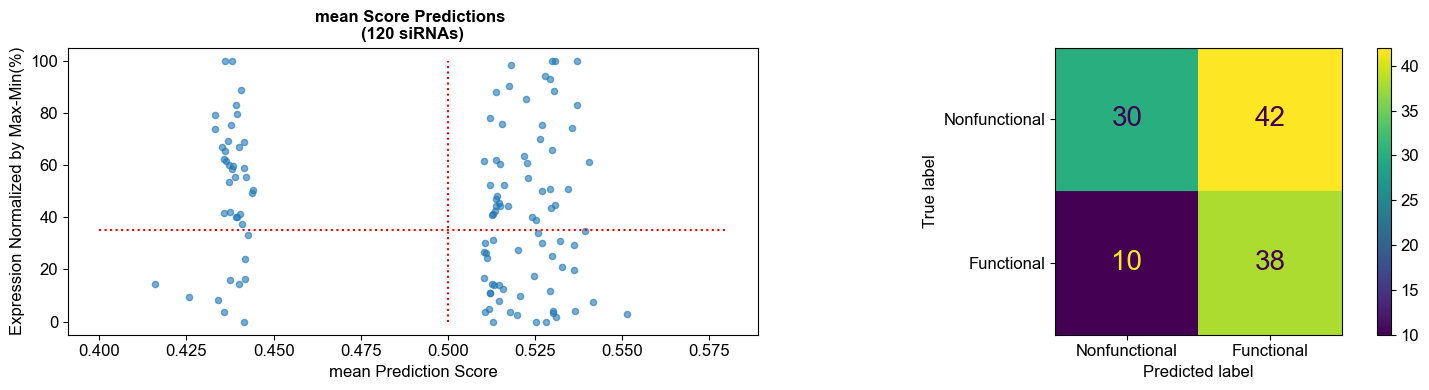

In [213]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:
for sc_ in ['mean_pred_score']:

    
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)
    
    # df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
        
    #     x=sc_,
    #     # x='score_avg_probabilities',
    #     # x = 'score_max_probabilities',
    #     # x='position',
    
    #     # y='avg_raw_expression_percent',
    #     y='normalized_expression_percent',
    #     marker='x',
    #     alpha=0.6,
    #     #c=colors_ls_new_screen,
    
    #     ax=ax,
    # )
    
    
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        #c=colors_ls_old_screen,
    
        ax=axs[0],
    )
    
    # # Legend
    # from matplotlib.lines import Line2D
    # from matplotlib.patches import Patch
    # legend_elements=[
    #     Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
    #     Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
    # ]
    # axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)
    
    axs[0].vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    

    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel(sc_.split('_')[0]+' Prediction Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')

    # TODO: recompute confusion matrix
    
    # cm = confusion_matrix(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]['actually_functional'],
    #              df_old_new[ (df_old_new['old_screen_or_new'] == 'new')][sc_].apply(lambda x: x > 0.5) )





    ## 35% threshold
    cm = confusion_matrix(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]['normalized_expression_percent'].apply(lambda x: x <= 35) ,
             df_old_new[ (df_old_new['old_screen_or_new'] == 'new')][sc_].apply(lambda x: x > 0.5) )
    axs[0].hlines(y=35,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')

    ## 25% threshold
    # cm = confusion_matrix(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]['normalized_expression_percent'].apply(lambda x: x <= 25) ,
                 # df_old_new[ (df_old_new['old_screen_or_new'] == 'new')][sc_].apply(lambda x: x > 0.5) )
    # axs[0].hlines(y=25,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')





    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])

    # Adjust font size for the values inside the matrix


    
    disp.plot(ax=axs[1])

    for txt in axs[1].texts:
        txt.set_fontsize(20)

            
    axs[0].set_title(sc_.split('_')[0]+" Score Predictions \n("+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)',fontweight='bold')
    
    
## Save Figure
fnm_final_ = 'new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                

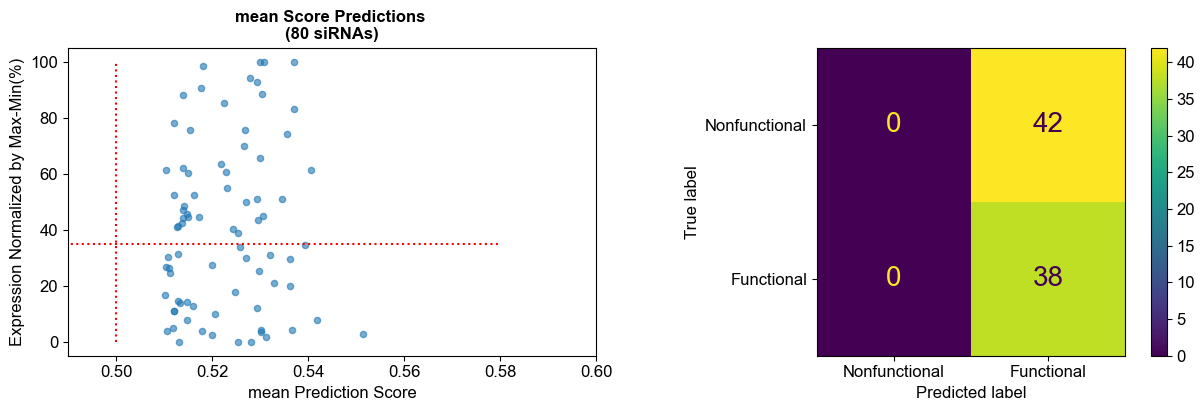

In [214]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:
for sc_ in ['mean_pred_score']:

    
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)
    
    # df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
        
    #     x=sc_,
    #     # x='score_avg_probabilities',
    #     # x = 'score_max_probabilities',
    #     # x='position',
    
    #     # y='avg_raw_expression_percent',
    #     y='normalized_expression_percent',
    #     marker='x',
    #     alpha=0.6,
    #     #c=colors_ls_new_screen,
    
    #     ax=ax,
    # )
    
    
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new') & (df_old_new['mean_pred_score'] > 0.5)].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        #c=colors_ls_old_screen,
    
        ax=axs[0],
    )
    
    # # Legend
    # from matplotlib.lines import Line2D
    # from matplotlib.patches import Patch
    # legend_elements=[
    #     Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
    #     Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
    # ]
    # axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)
    
    axs[0].vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    

    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel(sc_.split('_')[0]+' Prediction Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')

    axs[0].set_xlim(0.49,0.6)
    
    # TODO: recompute confusion matrix
    
    # cm = confusion_matrix(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]['actually_functional'],
    #              df_old_new[ (df_old_new['old_screen_or_new'] == 'new')][sc_].apply(lambda x: x > 0.5) )





    ## 35% threshold
    cm = confusion_matrix(df_old_new[ (df_old_new['old_screen_or_new'] == 'new') & (df_old_new['mean_pred_score'] > 0.5)]['normalized_expression_percent'].apply(lambda x: x <= 35) ,
             df_old_new[ (df_old_new['old_screen_or_new'] == 'new') & (df_old_new['mean_pred_score'] > 0.5)][sc_].apply(lambda x: x > 0.5) )
    axs[0].hlines(y=35,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')

    ## 25% threshold
    # cm = confusion_matrix(df_old_new[ (df_old_new['old_screen_or_new'] == 'new') & (df_old_new['mean_pred_score'] > 0.5)]['normalized_expression_percent'].apply(lambda x: x <= 25) ,
    #              df_old_new[ (df_old_new['old_screen_or_new'] == 'new') & (df_old_new['mean_pred_score'] > 0.5)][sc_].apply(lambda x: x > 0.5) )
    # axs[0].hlines(y=25,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')





    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])

    # Adjust font size for the values inside the matrix


    
    disp.plot(ax=axs[1])

    for txt in axs[1].texts:
        txt.set_fontsize(20)

            
    axs[0].set_title(sc_.split('_')[0]+" Score Predictions \n("+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'new') & (df_old_new['mean_pred_score'] > 0.5)]))+' siRNAs)',fontweight='bold')
    
    
                     

In [146]:
disp.plot(ax=axs[1])

for txt in axs[1].texts:
    txt.set_fontsize(20)

for txt in axs[1].texts:
    txt.set_fontsize(20)

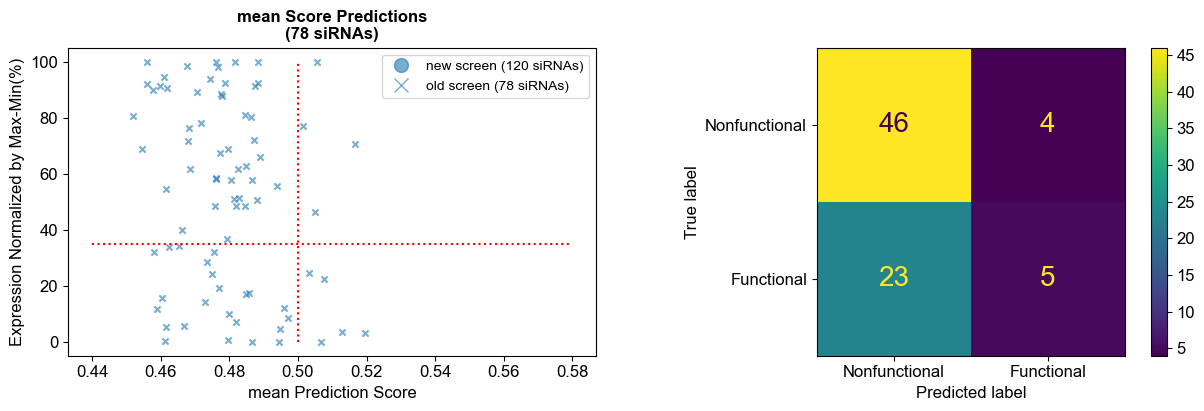

In [215]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:
for sc_ in ['mean_pred_score']:

    
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)
    
    df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='x',
        alpha=0.6,
        #c=colors_ls_new_screen,
    
        ax=axs[0],
    )
    
    
    
    
    # df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
        
    #     x=sc_,
    #     # x='score_avg_probabilities',
    #     # x = 'score_max_probabilities',
    #     # x='position',
    
    #     # y='avg_raw_expression_percent',
    #     y='normalized_expression_percent',
    #     marker='o',
    #     alpha=0.6,
    #     #c=colors_ls_old_screen,
    
    #     ax=ax,
    # )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    legend_elements=[
        Line2D([0],[0],marker='o',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
        Line2D([0],[0],marker='x',linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
    ]
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=True,fontsize=10)
    
    axs[0].vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    
    axs[0].hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')
    
    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel(sc_.split('_')[0]+' Prediction Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')

    # TODO: recompute confusion matrix
    
    cm = confusion_matrix(df_old_new[ (df_old_new['old_screen_or_new'] == 'old')]['actually_functional'],
                 df_old_new[ (df_old_new['old_screen_or_new'] == 'old')][sc_].apply(lambda x: x > 0.5) )
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])
    disp.plot(ax=axs[1])

    for txt in axs[1].texts:
        txt.set_fontsize(20)
    axs[0].set_title(sc_.split('_')[0]+" Score Predictions\n("+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'old')]))+' siRNAs)',fontweight='bold')
    
    
                     

In [148]:
df_old_new

oligo   gene  predicted_functional  actually_functional  \
0      MLH1_580   MLH1                  True                 True   
1      MLH1_578   MLH1                  True                False   
2    BCAM1_1030  BCAM1                  True                 True   
3     GYS1_3050   GYS1                  True                 True   
4     BCAM1_147  BCAM1                  True                 True   
..          ...    ...                   ...                  ...   
193   MSH3_4010   MSH3                 False                False   
194   MSH3_4035   MSH3                 False                False   
195   MSH3_4036   MSH3                 False                False   
196   MSH3_4068   MSH3                 False                False   
197   MSH3_4069   MSH3                 False                False   

     raw_prob_preds_1  raw_prob_preds_2  raw_prob_preds_3  raw_prob_preds_4  \
0            0.489886          0.522860          0.523478          0.521240   
1            0.510816          0.531920          0.507199          0.532700   
2            0.542173          0.522829          0.519606          0.524784   
3            0.530530          0.525590          0.520618          0.489031   
4            0.499403          0.509483          0.489794          0.527536   
..                ...               ...               ...               ...   
193          0.432268          0.411023          0.427649          0.423220   
194          0.434745          0.449677          0.411295          0.427558   
195          0.429446          0.449793          0.421434          0.425195   
196          0.443764          0.435206          0.432979          0.452194   
197          0.441492          0.439797          0.420430          0.429036   

     raw_prob_preds_5  raw_prob_preds_6  ...  prob_preds_norm_by_round_2  \
0            0.522266          0.537053  ...                        69.8   
1            0.509908          0.526346  ...                        75.4   
2            0.507740          0.507478  ...                        69.8   
3            0.505680          0.525554  ...                        71.5   
4            0.498614          0.493165  ...                        61.4   
..                ...               ...  ...                         ...   
193          0.442365          0.438566  ...                         0.0   
194          0.458531          0.464138  ...                        24.1   
195          0.432610          0.417311  ...                        24.2   
196          0.448816          0.456890  ...                        15.1   
197          0.432132          0.449837  ...                        18.0   

     prob_preds_norm_by_round_3  prob_preds_norm_by_round_4  \
0                          73.8                        68.5   
1                          64.3                        74.7   
2                          71.5                        70.4   
3                          72.1                        51.2   
4                          54.2                        71.9   
..                          ...                         ...   
193                        18.1                        15.6   
194                         8.5                        18.0   
195                        14.4                        16.7   
196                        21.2                        31.3   
197                        13.9                        18.8   

     prob_preds_norm_by_round_5  prob_preds_norm_by_round_6  \
0                          70.9                        78.4   
1                          62.5                        72.2   
2                          61.1                        61.3   
3                          59.7                        71.7   
4                          54.9                        53.0   
..                          ...                         ...   
193                        16.7                        21.3   
194                        27.7                        36.

# TODO: plot position and efficacy by gene (and maybe include score as 3rd component?)

In [149]:
min(df_old_new[(df_old_new['gene'] == gene_) & 
    (df_old_new['old_screen_or_new'] == 'new') ]['aver'].apply(lambda x: int(np.round(x*100,2))))

43

In [150]:
max(df_old_new[(df_old_new['gene'] == gene_) & 
    (df_old_new['old_screen_or_new'] == 'new') ]['aver'].apply(lambda x: int(np.round(x*100,2))))

53

In [151]:
df_old_new[(df_old_new['gene'] == gene_) & 
    (df_old_new['old_screen_or_new'] == 'new') ]['aver'].apply(lambda x: int(np.round(x*100,2)))



168    44
169    51
170    51
171    52
172    53
173    53
174    53
175    51
176    44
177    43
178    44
179    53
180    51
181    53
182    51
183    52
184    51
185    53
186    51
187    43
188    51
189    51
190    52
191    53
192    52
193    43
194    44
195    43
196    43
197    43
Name: aver, dtype: int64

In [158]:
class_color_dict

{1: '#F4A624', 0: '#3294D5'}

In [ ]:
df_old_new[(df_old_new['gene'] == gene_) & 
    (df_old_new['old_screen_or_new'] == 'old') ]['aver'].apply(lambda x: int(x >= 0.6)])

57    #3294D5
58    #3294D5
59    #3294D5
60    #3294D5
61    #3294D5
62    #3294D5
63    #3294D5
64    #3294D5
65    #3294D5
66    #3294D5
67    #3294D5
68    #3294D5
69    #3294D5
70    #F4A624
71    #3294D5
72    #3294D5
73    #3294D5
74    #3294D5
75    #3294D5
76    #3294D5
77    #3294D5
Name: aver, dtype: object

BCAM1
Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	BCAM1_plot_positoin_vs_expr-pcnt_old_vs_new.png
	BCAM1_plot_positoin_vs_expr-pcnt_old_vs_new.svg
GYS1
Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	GYS1_plot_positoin_vs_expr-pcnt_old_vs_new.png
	GYS1_plot_positoin_vs_expr-pcnt_old_vs_new.svg
MLH1
Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	MLH1_plot_positoin_vs_expr-pcnt_old_vs_new.png
	MLH1_plot_positoin_vs_expr-pcnt_old_vs_new.svg
MSH3
Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	MSH3_plot_positoin_vs_expr-pcnt_old_vs_new.png
	MSH3_plot_positoin_vs_expr-pcnt_old_vs_new.svg


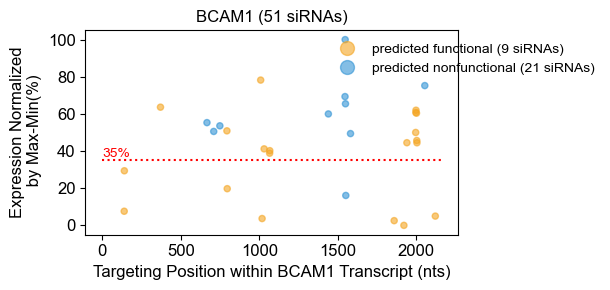

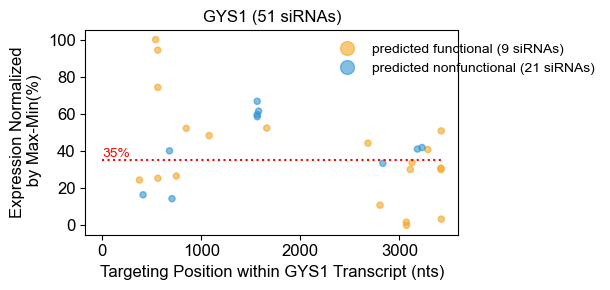

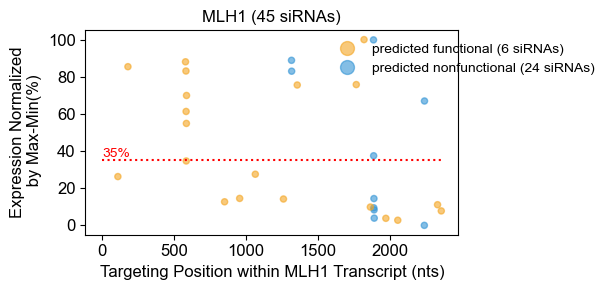

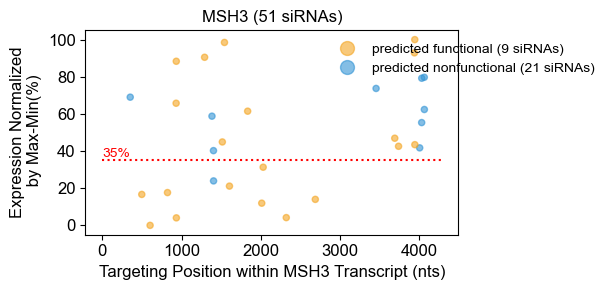

In [442]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)


import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

def colormap_to_hex_list(cmap_name,num_colors):
    """
    Generates a list of hex colors from a Matplotlib colormap.

    Args:
        cmap_name (str): Name of the Matplotlib colormap.
        num_colors (int): Number of colors to sample from the colormap.

    Returns:
        list: A list of hex color strings.
    """
    cmap = plt.cm.get_cmap(cmap_name,num_colors)
    colors = cmap(np.linspace(0,1,num_colors))
    hex_colors = [matplotlib.colors.to_hex(color) for color in colors]
    return hex_colors

# Example usage:
cmap_name = 'gist_rainbow'
num_colors = 100
hex_color_list = colormap_to_hex_list(cmap_name,num_colors)



for gene_ in ['BCAM1','GYS1','MLH1','MSH3']: # list(df['gene'].value_counts().index)
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=10,h=3)
    print(gene_)

    # colors_ls_new_screen_by_score = df_old_new[(df_old_new['gene'] == gene_) & 
    # (df_old_new['old_screen_or_new'] == 'new') ]['aver'].apply(lambda x: hex_color_list[int(np.round(x*100,2))])
    colors_ls_new_screen_by_score = df_old_new[(df_old_new['gene'] == gene_) & 
    (df_old_new['old_screen_or_new'] == 'new') ]['aver'].apply(lambda x: class_color_dict[int(x >= 0.5)])


    
    df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
        
        #x='raw_probabilities_mean',
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        c=colors_ls_new_screen_by_score,
    
        ax=axs[0],
    )

    
    # colors_ls_old_screen_by_score = df_old_new[(df_old_new['gene'] == gene_) & 
    # (df_old_new['old_screen_or_new'] == 'old') ]['aver'].apply(lambda x: hex_color_list[int(np.round(x*100,2))])
    colors_ls_old_screen_by_score = df_old_new[(df_old_new['gene'] == gene_) & 
    (df_old_new['old_screen_or_new'] == 'old') ]['aver'].apply(lambda x: class_color_dict[int(x >= 0.5)])



    # df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
        
    #     #x='raw_probabilities_mean',
    #     # x='score_avg_probabilities',
    #     # x = 'score_max_probabilities',
    #     x='position',
    
    #     # y='avg_raw_expression_percent',
    #     y='normalized_expression_percent',
    #     marker='x',
    #     alpha=0.6,
    #     c=colors_ls_old_screen_by_score,
    
    #     ax=axs[0],
    # )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    legend_elements=[
        # Line2D([0],[0],marker='o',color='black',linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
        # Line2D([0],[0],marker='x',color='black',linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
        Line2D([0],[0],marker='o',color=class_color_dict[1],linestyle='None',markersize=10,label='predicted functional ('+str(len(df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'new') & (df_old_new['min_pred_score'] >= 0.5) ]))+' siRNAs)',alpha=0.6),
        Line2D([0],[0],marker='o',color=class_color_dict[0],linestyle='None',markersize=10,label='predicted nonfunctional ('+str(len(df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'new') & (df_old_new['min_pred_score'] < 0.5) ]))+' siRNAs)',alpha=0.6),
        # Line2D([0],[0],marker='o',color=gene_color_dict[gene_],linestyle='None',markersize=10,label='new screen ('+str(len(df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'new') ]))+' siRNAs)',alpha=0.6),
        # Line2D([0],[0],marker='x',color=gene_color_dict[gene_],linestyle='None',markersize=10,label='old screen ('+str(len(df_old_new[(df_old_new['gene'] == gene_) & (df_old_new['old_screen_or_new'] == 'old') ]))+' siRNAs)',alpha=0.6),
    ]
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=False,fontsize=10,bbox_to_anchor=(1.4, 1.0))
    

    
    axs[0].set_title(gene_+' ('+str(len(df_old_new[df_old_new['gene'] == gene_]))+' siRNAs)')

    
    axs[0].set_xlabel('Targeting Position within '+gene_+' Transcript (nts)')
    axs[0].set_ylabel('Expression Normalized\n by Max-Min(%)')
    
    # prob_co_ = 0.5
    # axs[0].annotate(str(prob_co_),(prob_co_,0),color='blue')
    # axs[0].vlines(x=prob_co_,ymin=0,ymax=100,linestyle='dotted',color='blue')
    
    expr_co_ = 35
    axs[0].hlines(y=expr_co_, xmin=0, xmax=(max(df_old_new[(df_old_new['gene'] == gene_)]['position'])), linestyle='dotted',color='red')
    axs[0].annotate(str(expr_co_)+'%',(0.40,expr_co_+2),color='red')

    # cm = confusion_matrix(df_old_new[df_old_new['gene'] == gene_]['actually_functional'],
    #              df_old_new[df_old_new['gene'] == gene_]['predicted_functional'] )

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    #                               display_labels=["Nonfunctional","Functional"])
    # disp.plot(ax=axs[1])
    # axs[1].set_title(gene_+' ('+str(len(df_old_new[df_old_new['gene'] == gene_]))+' siRNAs)')
    axs[1].remove()

    ## Save Figure
    fnm_final_ = gene_.upper()+'_plot_positoin_vs_expr-pcnt_old_vs_new'
    
    fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
    fig.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
    fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
    fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
    print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')



# Move Probability threshold

78     green
79     green
80       red
81      teal
82      teal
       ...  
193     teal
194     teal
195     teal
196     teal
197     teal
Length: 120, dtype: object

teal      49
purple    28
red       23
green     20
dtype: int64

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	probco-0.519_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	probco-0.519_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


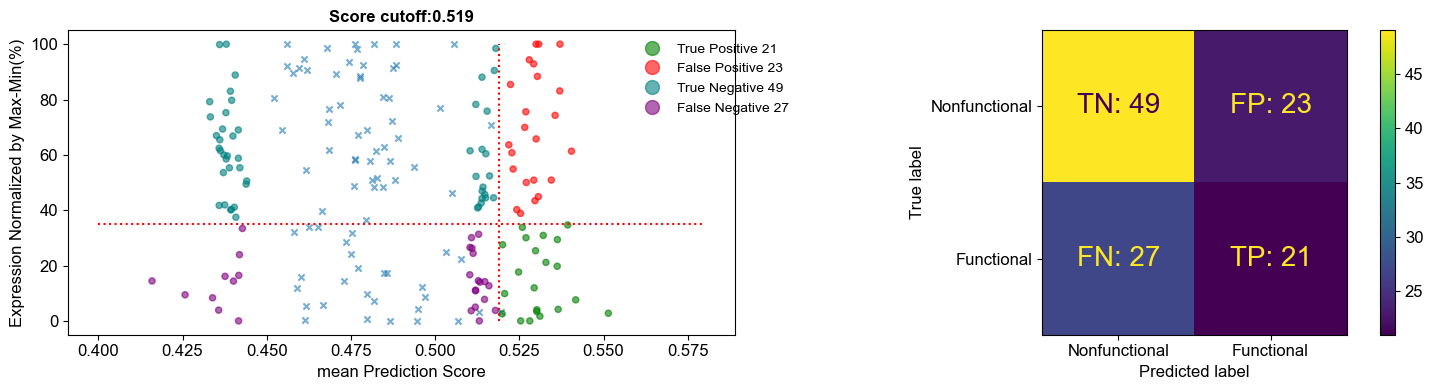

In [276]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)


bi_class_color_dict = {
    #(score,actual)
    (True,True):'green', # True Positive
    (True,False):'red', # False Positive
    (False,False):'teal', # True Negative
    (False,True):'purple',# False Negative
    
}

bi_class_label_dict = {
    #(score,actual)
    (True,True):'True Positive',
    (True,False):'False Positive',
    (False,False):'True Negative',
    (False,True):'False Negative',
}


# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:
for sc_ in ['mean_pred_score']:
    
    prob_co__ = 0.519
    axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    exp_co__ = 35
    axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    
    # class_color_ls_new_ = df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['normalized_expression_percent'].apply(lambda x: class_color_dict[int(x <= exp_co__)]) 

    class_color_ls_new_ = df_old_new[(df_old_new['old_screen_or_new'] == 'new')].apply(lambda x: bi_class_color_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)
    class_label_ls_new = df_old_new[(df_old_new['old_screen_or_new'] == 'new')].apply(lambda x: bi_class_label_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)
    
    df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='x',
        alpha=0.6,
        #c=colors_ls_new_screen,
    
        ax=axs[0],
    )
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        c=class_color_ls_new_,
    
        ax=axs[0],
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    legend_elements = []
    for k in bi_class_label_dict.keys():
        legend_elements.append(Line2D([0],[0],color=bi_class_color_dict[k],marker='o',linestyle='None',markersize=10,label=bi_class_label_dict[k]+' '+str(class_label_ls_new.value_counts()[bi_class_label_dict[k]]),alpha=0.6))
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=False,fontsize=10,bbox_to_anchor=(1.1,1))
    
    axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
    axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel(sc_.split('_')[0]+' Prediction Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')

    # Recompute confusion matrix
    cm = confusion_matrix(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]['normalized_expression_percent'].apply(lambda x: x <= exp_co__) ,
             df_old_new[ (df_old_new['old_screen_or_new'] == 'new')][sc_].apply(lambda x: x > prob_co__) )
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])

    # Adjust font size for the values inside the matrix
    disp.plot(ax=axs[1])
    for txt,l_ in zip( axs[1].texts,['TN','FP','FN','TP']):
        txt.set_fontsize(20)
        txt.set_text(l_+': '+txt.get_text())
            
    axs[0].set_title('Score cutoff:'+str(prob_co__),fontweight='bold')#sc_.split('_')[0]+" Score Predictions \n("+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)',fontweight='bold')

    
## Save Figure
fnm_final_ = 'probco-'+str(prob_co__)+'_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                

# No BCAM1

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	NO-BCAM1_probco-0.519_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	NO-BCAM1_probco-0.519_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


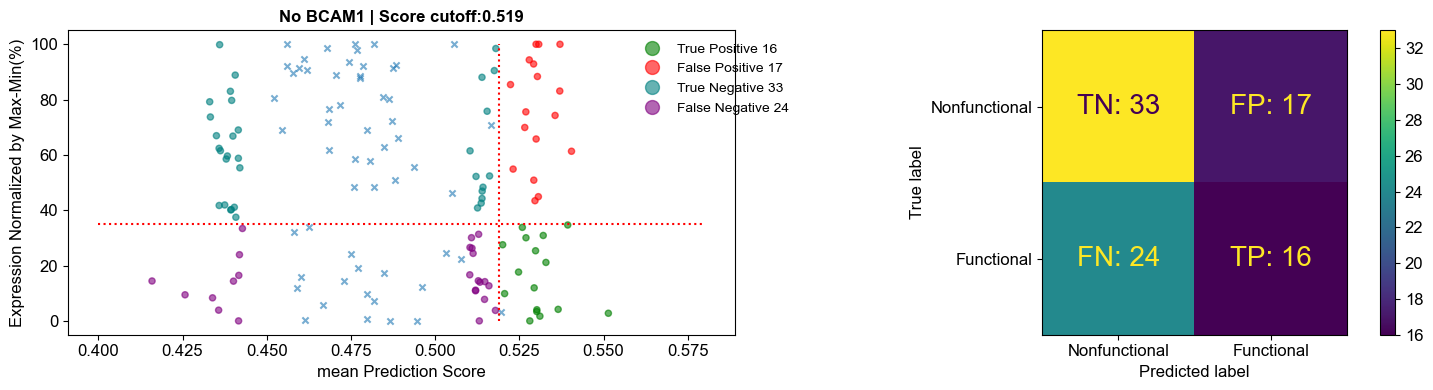

In [321]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)


bi_class_color_dict = {
    #(score,actual)
    (True,True):'green', # True Positive
    (True,False):'red', # False Positive
    (False,False):'teal', # True Negative
    (False,True):'purple',# False Negative
    
}

bi_class_label_dict = {
    #(score,actual)
    (True,True):'True Positive',
    (True,False):'False Positive',
    (False,False):'True Negative',
    (False,True):'False Negative',
}


# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:
for sc_ in ['mean_pred_score']:
    
    prob_co__ = 0.519
    axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    exp_co__ = 35
    axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    class_color_ls_new_ = df_old_new[(df_old_new['old_screen_or_new'] == 'new') & (df_old_new['gene'] != 'BCAM1') ].apply(lambda x: bi_class_color_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)
    class_label_ls_new = df_old_new[(df_old_new['old_screen_or_new'] == 'new') & (df_old_new['gene'] != 'BCAM1')].apply(lambda x: bi_class_label_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)
    
    df_old_new[ (df_old_new['old_screen_or_new'] == 'old')& (df_old_new['gene'] != 'BCAM1')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='x',
        alpha=0.6,
        #c=colors_ls_new_screen,
    
        ax=axs[0],
    )
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')& (df_old_new['gene'] != 'BCAM1')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        c=class_color_ls_new_,
    
        ax=axs[0],
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    legend_elements = []
    for k in bi_class_label_dict.keys():
        legend_elements.append(Line2D([0],[0],color=bi_class_color_dict[k],marker='o',linestyle='None',markersize=10,label=bi_class_label_dict[k]+' '+str(class_label_ls_new.value_counts()[bi_class_label_dict[k]]),alpha=0.6))
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=False,fontsize=10,bbox_to_anchor=(1.1,1))
    
    axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
    axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel(sc_.split('_')[0]+' Prediction Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')

    # Recompute confusion matrix
    cm = confusion_matrix(df_old_new[ (df_old_new['old_screen_or_new'] == 'new') & (df_old_new['gene'] != 'BCAM1') ]['normalized_expression_percent'].apply(lambda x: x <= exp_co__) ,
             df_old_new[ (df_old_new['old_screen_or_new'] == 'new') & (df_old_new['gene'] != 'BCAM1') ][sc_].apply(lambda x: x > prob_co__) )
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])

    # Adjust font size for the values inside the matrix
    disp.plot(ax=axs[1])
    for txt,l_ in zip( axs[1].texts,['TN','FP','FN','TP']):
        txt.set_fontsize(20)
        txt.set_text(l_+': '+txt.get_text())
            
    axs[0].set_title('No BCAM1 | Score cutoff:'+str(prob_co__),fontweight='bold')#sc_.split('_')[0]+" Score Predictions \n("+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)',fontweight='bold')

    
## Save Figure
fnm_final_ = 'NO-BCAM1_probco-'+str(prob_co__)+'_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                

In [396]:
df

oligo  position   gene  Replicate_1  Replicate_2  Replicate_3  \
0    BCAM1_139       139  BCAM1     29.33086     22.71854     20.63844   
1    BCAM1_140       140  BCAM1     48.30093     45.66608     39.31965   
2    BCAM1_370       370  BCAM1     78.97290     72.99040     76.55842   
3    BCAM1_666       666  BCAM1     65.25128     74.51008     65.61525   
4    BCAM1_709       709  BCAM1     59.23448     67.82481     65.12263   
..         ...       ...    ...          ...          ...          ...   
115  MSH3_4010      4010   MSH3     54.60428     53.32035     59.08915   
116  MSH3_4035      4035   MSH3     65.19468     69.44057     66.70707   
117  MSH3_4036      4036   MSH3     83.31917     95.32704     82.90980   
118  MSH3_4068      4068   MSH3     88.64831     91.02084     83.15288   
119  MSH3_4069      4069   MSH3     66.10081     75.15333     77.84770   

     avg_raw_expression_percent  std_raw_expression_percent  \
0                     24.229280                    3.705968   
1                     44.428887                    3.769512   
2                     76.173907                    2.457433   
3                     68.458870                    4.281431   
4                     64.060640                    3.586485   
..                          ...                         ...   
115                   55.671260                    2.473001   
116                   67.114107                    1.757110   
117                   87.185337                    5.759479   
118                   87.607343                    3.295341   
119                   73.033947                    5.024354   

     normalized_expression_percent  std_norm_expression_percent  ...  \
0                         7.604094                     3.997113  ...   
1                        29.390607                     4.065650  ...   
2                        63.629556                     2.650492  ...   
3                        55.308416                     4.617785  ...   
4                        50.564656                     3.868243  ...   
..                             ...                          ...  ...   
115                      41.721688                     2.942242  ...   
116                      55.335765                     2.090514  ...   
117                      79.215425                     6.852315  ...   
118                      79.717505                     3.920618  ...   
119                      62.378870                     5.977703  ...   

    raw_prob_preds_10 raw_probabilities_mean raw_probabilities_std      aver  \
0            0.552188               0.541744              0.009811  0.541744   
1            0.524716               0.536304              0.010486  0.536304   
2            0.545508               0.521891              0.017571  0.521891   
3            0.456978               0.438936              0.015080  0.438936   
4            0.437169               0.444062              0.015241  0.444062   
..                ...                    ...                   ...       ...   
115          0.443915               0.435881              0.016084  0.435881   
116          0.457238               0.442022              0.016783  0.442022   
117          0.442939               0.433067              0.009532  0.433067   
118          0.450153               0.439591              0.011775  0.439591   
119          0.446935               0.435852              0.010558  0.435852   

          max unknown_AK_scoring position_normalized  predicted_functional  \
0    0.552392                2.0                   0                  True   
1    0.553814                2.0                   1                  True   
2    0.548767                2.0                 117                  True   
3    0.468941                NaN                 266                 False   
4    0.479126                NaN                 288                 False   
..        ...                ...                 ...                 

In [ ]:
df['std_norm_expression_percent']

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	new_screen_only_efficacies.png
	new_screen_only_efficacies.svg


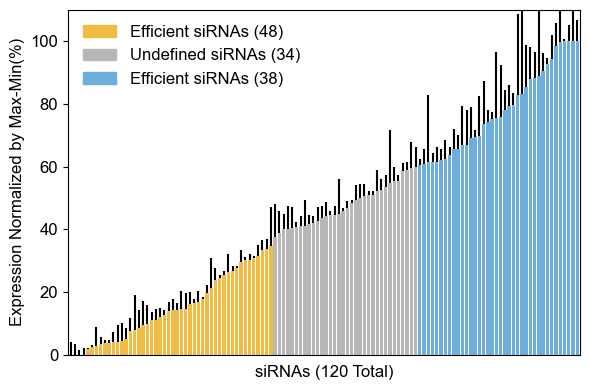

In [408]:

fig,ax = plt.subplots()
fig.set_size_inches(w=6,h=4)

df.sort_values(by='normalized_expression_percent',inplace=True,ascending=True)
num_eff_ = len(df[  (df['normalized_expression_percent'] <= 35)])
num_ineff_ = len(df[  (df['normalized_expression_percent'] > 60)])
num_undef_ = len(df) - (num_eff_+num_ineff_)

bplt = df.plot.bar(
    
    y='normalized_expression_percent',
    color=(['#F0BC44']*num_eff_)+(['#B7B7B7']*num_undef_)+(['#6EAEDD']*num_ineff_),
    yerr=([0]*len(df),df['std_norm_expression_percent']),
    ax=ax,
    width=0.8,
)


    
# # Legend
# from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Patch(color='#F0BC44', label='Efficient siRNAs ('+str(num_eff_)+')'),
    Patch(color='#B7B7B7', label='Undefined siRNAs ('+str(num_undef_)+')'),
    Patch(color='#6EAEDD', label='Efficient siRNAs ('+str(num_ineff_)+')'),
]
    
ax.legend(handles=legend_elements,loc='upper left',frameon=False,fontsize=12)#,bbox_to_anchor=(1.1,1))

# axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
# axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    
ax.set_xticks([])
ax.set_xlabel('siRNAs ('+str(len(df))+' Total)')
ax.set_ylabel('Expression Normalized by Max-Min(%)')
ax.set_ylim(0,110)
# ax.set_title('No BCAM1 | Score cutoff:'+str(prob_co__),fontweight='bold')#sc_.split('_')[0]+" Score Predictions \n("+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)',fontweight='bold')

    
## Save Figure
fnm_final_ = 'new_screen_only_efficacies'
fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                

In [443]:
df_new = df_old_new[(df_old_new['old_screen_or_new'] == 'new') ].copy()

(0.0, 110.0)

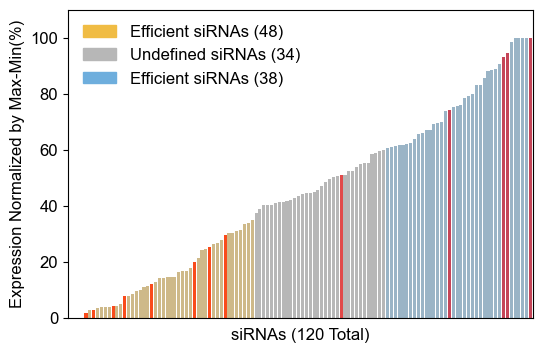

In [482]:

fig,ax = plt.subplots()
fig.set_size_inches(w=6,h=4)

new_class_color_dict={
    True:'red',
    False:'#b8b8b8',
}
df_new.sort_values(by='normalized_expression_percent',inplace=True,ascending=True)
num_eff_ = len(df_new[  (df_new['normalized_expression_percent'] <= 35)])
num_ineff_ = len(df_new[  (df_new['normalized_expression_percent'] > 60)])
num_undef_ = len(df_new) - (num_eff_+num_ineff_)
df_new['class_color'] = df_new['min_pred_score'].apply(lambda x: new_class_color_dict[int(x>=0.5085)])
# df_new['class_color'] = df_new['max_pred_score'].apply(lambda x: new_class_color_dict[int(x>=0.557)])

bplt = df_new.plot.bar(
    
    y='normalized_expression_percent',
    color=df_new['class_color'],#(['#F0BC44']*num_eff_)+(['#B7B7B7']*num_undef_)+(['#6EAEDD']*num_ineff_),
    # yerr=([0]*len(df_new),df_new['std_norm_expression_percent']),
    ax=ax,
    width=0.8,
    # alpha=0.5,
)

bplt2 = df_new.plot.bar(
    
    y='normalized_expression_percent',
    color=(['#F0BC44']*num_eff_)+(['#B7B7B7']*num_undef_)+(['#6EAEDD']*num_ineff_),
    # yerr=([0]*len(df_new),df_new['std_norm_expression_percent']),
    ax=ax,
    width=0.8,
    alpha=0.4,
)
    
# # Legend
# from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = [
    Patch(color='#F0BC44', label='Efficient siRNAs ('+str(num_eff_)+')'),
    Patch(color='#B7B7B7', label='Undefined siRNAs ('+str(num_undef_)+')'),
    Patch(color='#6EAEDD', label='Efficient siRNAs ('+str(num_ineff_)+')'),
]
    
ax.legend(handles=legend_elements,loc='upper left',frameon=False,fontsize=12)#,bbox_to_anchor=(1.1,1))

# axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
# axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    
ax.set_xticks([])
ax.set_xlabel('siRNAs ('+str(len(df_new))+' Total)')
ax.set_ylabel('Expression Normalized by Max-Min(%)')
ax.set_ylim(0,110)
# ax.set_title('No BCAM1 | Score cutoff:'+str(prob_co__),fontweight='bold')#sc_.split('_')[0]+" Score Predictions \n("+str(len(df_new_old_new[ (df_new_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)',fontweight='bold')

    
# ## Save Figure
# fnm_final_ = 'new_screen_only_efficacies'
# fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
# fig.tight_layout()
# plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
# fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
# fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
# print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                

oligo   gene  predicted_functional  actually_functional  \
127  GYS1_3070   GYS1                  True                 True   
163  MLH1_2057   MLH1                  True                 True   
174   MSH3_935   MSH3                  True                 True   
78   BCAM1_139  BCAM1                  True                 True   
183  MSH3_2014   MSH3                  True                 True   
85   BCAM1_795  BCAM1                  True                 True   
113   GYS1_561   GYS1                  True                 True   
79   BCAM1_140  BCAM1                  True                 True   
136  GYS1_3422   GYS1                  True                False   
112   GYS1_560   GYS1                  True                False   
190  MSH3_3944   MSH3                  True                False   
111   GYS1_559   GYS1                  True                False   
154  MLH1_1822   MLH1                  True                False   

     raw_prob_preds_1  raw_prob_preds_2  raw_prob_preds_3  raw_prob_preds_4  \
127          0.512966          0.537815          0.534843          0.528372   
163          0.568357          0.555436          0.525951          0.551515   
174          0.517933          0.524419          0.565206          0.529695   
78           0.538163          0.552392          0.543002          0.519491   
183          0.546169          0.549893          0.522758          0.521715   
85           0.534615          0.555873          0.527742          0.541386   
113          0.530109          0.535934          0.532565          0.515962   
79           0.539200          0.550936          0.553814          0.535004   
136          0.535852          0.528088          0.510738          0.519693   
112          0.555414          0.534842          0.538661          0.540271   
190          0.530156          0.549417          0.515394          0.525113   
111          0.542842          0.525713          0.519000          0.547117   
154          0.548722          0.526202          0.528761          0.542717   

     raw_prob_preds_5  raw_prob_preds_6  ...  prob_preds_norm_by_round_4  \
127          0.544405          0.531601  ...                        72.4   
163          0.565153          0.569503  ...                        84.9   
174          0.513974          0.537610  ...                        73.1   
78           0.542539          0.549941  ...                        67.6   
183          0.532091          0.518492  ...                        68.8   
85           0.529700          0.516880  ...                        79.4   
113          0.540221          0.540167  ...                        65.7   
79           0.531461          0.530782  ...                        76.0   
136          0.531402          0.522018  ...                        67.7   
112          0.528418          0.531509  ...                        78.8   
190          0.546643          0.527876  ...                        70.6   
111          0.545641          0.536936  ...                        82.5   
154          0.541169          0.533276  ...                        80.1   

     prob_preds_norm_by_round_5  prob_preds_norm_by_round_6  \
127                        85.9                        75.2   
163                       100.0                        97.2   
174                        65.3                        78.7   
78                         84.7                        85.8   
183                        77.6                        67.6   
85                         76.0                        66.7   
113                        83.1                        80.2   
79                         77.2                        74.8   
136                        77.1                        69.7   
112                        75.1                        75.2   
190                        87.4                        73.1   
111                        86.8                        78.3   
154                        83.7                        76.2   

 

oligo   gene  predicted_functional  actually_functional  \
164   MLH1_2242   MLH1                 False                 True   
161   MLH1_1893   MLH1                 False                 True   
160   MLH1_1892   MLH1                 False                 True   
158   MLH1_1890   MLH1                 False                 True   
115    GYS1_703   GYS1                 False                 True   
159   MLH1_1891   MLH1                 False                 True   
95   BCAM1_1550  BCAM1                 False                 True   
109    GYS1_411   GYS1                 False                 True   
178   MSH3_1405   MSH3                 False                 True   
126   GYS1_2833   GYS1                 False                 True   

     raw_prob_preds_1  raw_prob_preds_2  raw_prob_preds_3  raw_prob_preds_4  \
164          0.431430          0.415871          0.444473          0.449530   
161          0.448263          0.436862          0.430382          0.402569   
160          0.447954          0.428218          0.449849          0.430623   
158          0.436604          0.416307          0.444642          0.414451   
115          0.418086          0.433906          0.438494          0.436338   
159          0.420706          0.417347          0.442281          0.394234   
95           0.424141          0.413164          0.449589          0.455711   
109          0.438496          0.439507          0.427125          0.416978   
178          0.450667          0.447952          0.453143          0.426275   
126          0.447761          0.420395          0.441262          0.430607   

     raw_prob_preds_5  raw_prob_preds_6  ...  prob_preds_norm_by_round_4  \
164          0.464387          0.454922  ...                        29.8   
161          0.444448          0.437185  ...                         4.5   
160          0.437164          0.434262  ...                        19.6   
158          0.417694          0.436669  ...                        10.9   
115          0.417997          0.439812  ...                        22.7   
159          0.435852          0.414651  ...                         0.0   
95           0.439185          0.431970  ...                        33.2   
109          0.453154          0.453094  ...                        12.3   
178          0.443898          0.416210  ...                        17.3   
126          0.452382          0.419071  ...                        19.6   

     prob_preds_norm_by_round_5  prob_preds_norm_by_round_6  \
164                        31.7                        30.8   
161                        18.1                        20.5   
160                        13.2                        18.8   
158                         0.0                        20.2   
115                         0.2                        22.1   
159                        12.3                         7.5   
95                         14.6                        17.5   
109                        24.0                        29.8   
178                        17.8                         8.4   
126                        23.5                        10.1   

     prob_preds_norm_by_round_7  prob_preds_norm_by_round_8  \
164                        29.1                        13.9   
161                        26.0                        16.5   
160                        12.2                        14.4   
158                        12.9                         0.9   
115                        27.1                        32.2   
159                         0.0                         0.0   
95                         21.6                        30.6   
109                        39.1                        16.6   
178                        23.8                        16.4   
126                        39.1                        27.6   

     prob_preds_norm_by_round_9  prob_preds_norm_by_round_10  \
164                        21.5                         17.0   
161                        

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	plotting_good_and_bad_bar_separate.png
	plotting_good_and_bad_bar_separate.svg


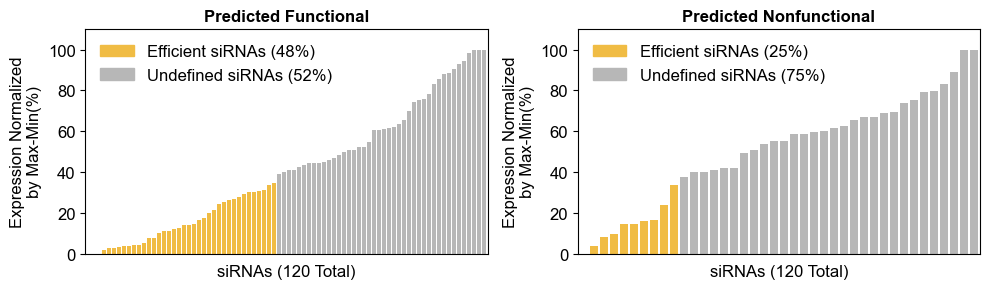

In [513]:

fig,axs = plt.subplots(1,2)
fig.set_size_inches(w=10,h=3)

df_new.sort_values(by='normalized_expression_percent',inplace=True,ascending=True)
# num_eff_ = len(df_new[  (df_new['normalized_expression_percent'] <= 35)])
# num_ineff_ = len(df_new[  (df_new['normalized_expression_percent'] > 60)])
# num_undef_ = len(df_new) - (num_eff_+num_ineff_)
# df_new['class_color'] = df_new['min_pred_score'].apply(lambda x: new_class_color_dict[(x>=0.5085)])
# df_new['class_color'] = df_new['max_pred_score'].apply(lambda x: new_class_color_dict[int(x>=0.557)])

num_eff_good_ = len(df_new[df_new['mean_pred_score'].apply(lambda x: (x>=0.5))][df_new[df_new['mean_pred_score'].apply(lambda x: (x>=0.5))]['normalized_expression_percent'] <= 35])
num_rest_good_ = (len(df_new[df_new['mean_pred_score'].apply(lambda x: (x>=0.5))])-num_eff_good_)

bplt = df_new[df_new['mean_pred_score'].apply(lambda x: (x>=0.5))].plot.bar(
    
    y='normalized_expression_percent',
    color=num_eff_good_*['#F0BC44']+num_rest_good_*['#B7B7B7'],
    # yerr=([0]*len(df_new),df_new['std_norm_expression_percent']),
    ax=axs[0],
    width=0.8,
    # alpha=0.5,
)

num_eff_bad_ = len(df_new[df_new['mean_pred_score'].apply(lambda x: (x<0.5))][df_new[df_new['mean_pred_score'].apply(lambda x: (x<0.5))]['normalized_expression_percent'] <= 35])
num_rest_bad_ = (len(df_new[df_new['mean_pred_score'].apply(lambda x: (x<0.5))])-num_eff_bad_)
bplt = df_new[df_new['mean_pred_score'].apply(lambda x: (x<0.5))].plot.bar(
    
    y='normalized_expression_percent',
    color=num_eff_bad_*['#F0BC44']+num_rest_bad_*['#B7B7B7'],

    # color=df_new['normalized_expression_percent'].apply(lambda x: new_class_color_dict[(x<0.5)])
    # color=df_new['class_color'],#(['#F0BC44']*num_eff_)+(['#B7B7B7']*num_undef_)+(['#6EAEDD']*num_ineff_),
    # yerr=([0]*len(df_new),df_new['std_norm_expression_percent']),
    ax=axs[1],
    width=0.8,
    # alpha=0.5,
)    
# # Legend
# from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements_good = [
    Patch(color='#F0BC44', label='Efficient siRNAs ('+str(int(np.round(100*num_eff_good_/(num_eff_good_+num_rest_good_),0)))+'%)'),
    Patch(color='#B7B7B7', label='Undefined siRNAs ('+str(int(np.round(100*num_rest_good_/(num_eff_good_+num_rest_good_),0)))+'%)'),
    # Patch(color='#6EAEDD', label='Efficient siRNAs ('+str(num_ineff_)+')'),
]
    
axs[0].legend(handles=legend_elements_good,loc='upper left',frameon=False,fontsize=12)#,bbox_to_anchor=(1.1,1))

legend_elements_bad = [
    Patch(color='#F0BC44', label='Efficient siRNAs ('+str(int(np.round(100*num_eff_bad_/(num_eff_bad_+num_rest_bad_),0)))+'%)'),
    Patch(color='#B7B7B7', label='Undefined siRNAs ('+str(int(np.round(100*num_rest_bad_/(num_eff_bad_+num_rest_bad_),0)))+'%)'),
    # Patch(color='#6EAEDD', label='Efficient siRNAs ('+str(num_ineff_)+')'),
]
    
axs[1].legend(handles=legend_elements_bad,loc='upper left',frameon=False,fontsize=12)#,bbox_to_anchor=(1.1,1))

# axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
# axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    
axs[0].set_xticks([])
axs[0].set_xlabel('siRNAs ('+str(len(df_new))+' Total)')
axs[0].set_ylabel('Expression Normalized\nby Max-Min(%)')
axs[0].set_ylim(0,110)
axs[0].set_title('Predicted Functional',fontweight='bold')


axs[1].set_xticks([])
axs[1].set_xlabel('siRNAs ('+str(len(df_new))+' Total)')
axs[1].set_ylabel('Expression Normalized\nby Max-Min(%)')
axs[1].set_ylim(0,110)
axs[1].set_title('Predicted Nonfunctional',fontweight='bold')

## Save Figure
fnm_final_ = 'plotting_good_and_bad_bar_separate'
fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                

In [515]:
len(df_new[df_new['mean_pred_score'].apply(lambda x: (x<0.5))])

40

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	min_score-vs-expression_normalized_experimental_eval.png
	min_score-vs-expression_normalized_experimental_eval.svg


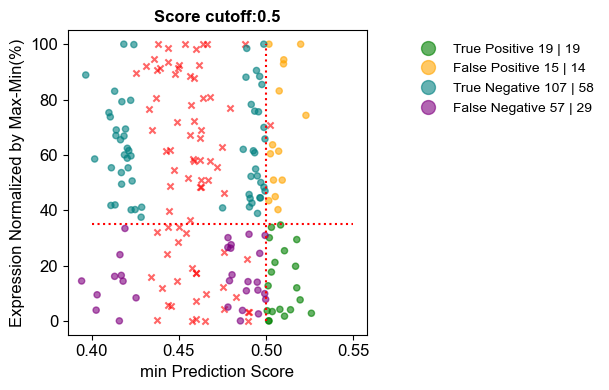

In [434]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)


bi_class_color_dict = {
    #(score,actual)
    (True,True):'green', # True Positive
    (True,False):'orange', # False Positive
    (False,False):'teal', # True Negative
    (False,True):'purple',# False Negative
    
}

bi_class_label_dict = {
    #(score,actual)
    (True,True):'True Positive',
    (True,False):'False Positive',
    (False,False):'True Negative',
    (False,True):'False Negative',
}

prob_co__ = 0.5#0.519
exp_co__ = 35
# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:
# for sc_ in ['min_pred_score']:
    



class_color_ls_new_ = df_old_new[(df_old_new['old_screen_or_new'] == 'new')  ].apply(lambda x: bi_class_color_dict[(
                                                         x['min_pred_score']>=prob_co__,
                                                         x['normalized_expression_percent']<exp_co__)], axis=1)
class_label_ls_new = df_old_new[(df_old_new['old_screen_or_new'] == 'new') ].apply(lambda x: bi_class_label_dict[(
                                                         x['min_pred_score']>=prob_co__,
                                                         x['normalized_expression_percent']<exp_co__)], axis=1)

class_color_ls_old_ = df_old_new[(df_old_new['old_screen_or_new'] == 'old')  ].apply(lambda x: bi_class_color_dict[(
                                                         x['min_pred_score']>=prob_co__,
                                                         x['normalized_expression_percent']<exp_co__)], axis=1)
class_label_ls_old = df_old_new[(df_old_new['old_screen_or_new'] == 'old') ].apply(lambda x: bi_class_label_dict[(
                                                         x['min_pred_score']>=prob_co__,
                                                         x['normalized_expression_percent']<exp_co__)], axis=1)

class_label_ls_both = pd.core.series.Series(list(class_label_ls_old)+list(class_label_ls_new))

fig,ax = plt.subplots()
fig.set_size_inches(w=10,h=4)

df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
    x='min_pred_score',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='x',
    alpha=0.6,
    # c=class_color_ls_old_,
    c='red',
    ax=ax,
)


df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
    
    x=sc_,
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='o',
    alpha=0.6,
    c=class_color_ls_new_,
    

    ax=ax,
)

# Legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

legend_elements = []
for k in bi_class_label_dict.keys():
    legend_elements.append(Line2D([0],[0],color=bi_class_color_dict[k],marker='o',linestyle='None',markersize=10,label=bi_class_label_dict[k]+' '+str(class_label_ls_both.value_counts()[bi_class_label_dict[k]])+' | '+str(class_label_ls_new.value_counts()[bi_class_label_dict[k]]),alpha=0.6))
ax.legend(handles=legend_elements,loc='upper right',frameon=False,fontsize=10,bbox_to_anchor=(1.8,1))




# ax.set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')

ax.set_xlabel(sc_.split('_')[0]+' Prediction Score')
ax.set_ylabel('Expression Normalized by Max-Min(%)')
ax.set_title('Score cutoff:'+str(prob_co__),fontweight='bold')#sc_.split('_')[0]+" Score Predictions \n("+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)',fontweight='bold')

ax.vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')

ax.hlines(y=exp_co__,xmin=0.4,xmax=0.55,linestyle='dotted',color='red')
    
    
## Save Figure
fnm_final_ = 'min_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                

In [435]:
len(df_old_exps)

84

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	NO-BCAM1+OLD_probco-0.5_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	NO-BCAM1+OLD_probco-0.5_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


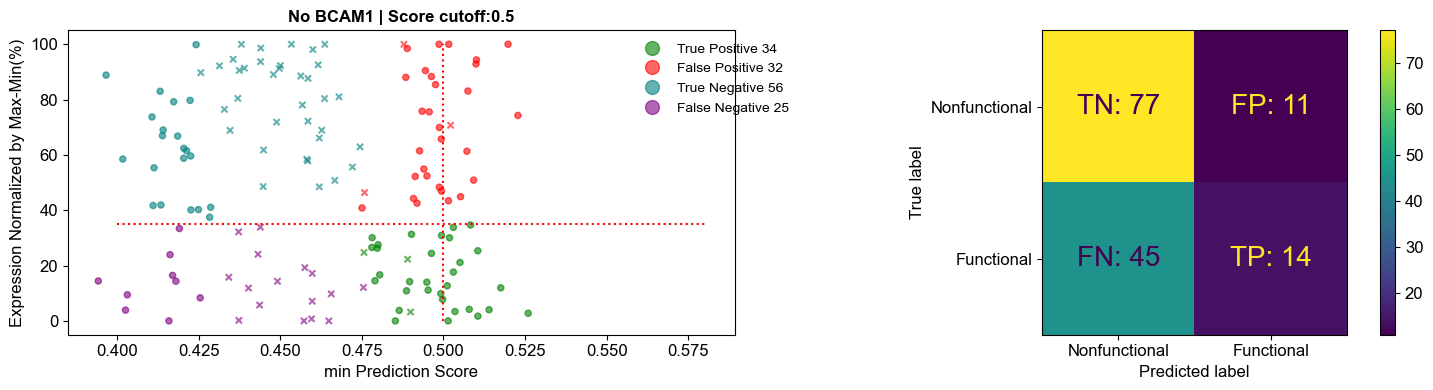

In [412]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)


bi_class_color_dict = {
    #(score,actual)
    (True,True):'green', # True Positive
    (True,False):'red', # False Positive
    (False,False):'teal', # True Negative
    (False,True):'purple',# False Negative
    
}

bi_class_label_dict = {
    #(score,actual)
    (True,True):'True Positive',
    (True,False):'False Positive',
    (False,False):'True Negative',
    (False,True):'False Negative',
}


# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:
for sc_ in ['min_pred_score']:
    
    prob_co__ = 0.5#0.519
    axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    exp_co__ = 35
    axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    class_color_ls_new_ = df_old_new[(df_old_new['old_screen_or_new'] == 'new')  ].apply(lambda x: bi_class_color_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)
    class_label_ls_new = df_old_new[(df_old_new['old_screen_or_new'] == 'new') ].apply(lambda x: bi_class_label_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)

    class_color_ls_old_ = df_old_new[(df_old_new['old_screen_or_new'] == 'old') & (df_old_new['gene'] != 'BCAM1') ].apply(lambda x: bi_class_color_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)
    class_label_ls_old = df_old_new[(df_old_new['old_screen_or_new'] == 'old') & (df_old_new['gene'] != 'BCAM1')].apply(lambda x: bi_class_label_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)

    class_label_ls_both = pd.core.series.Series(list(class_label_ls_old)+list(class_label_ls_new))
    
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)
    
    df_old_new[ (df_old_new['old_screen_or_new'] == 'old')& (df_old_new['gene'] != 'BCAM1')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='x',
        alpha=0.6,
        c=class_color_ls_old_,
    
        ax=axs[0],
    )
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')& (df_old_new['gene'] != 'BCAM1')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        c=class_color_ls_new_,
    
        ax=axs[0],
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    legend_elements = []
    for k in bi_class_label_dict.keys():
        legend_elements.append(Line2D([0],[0],color=bi_class_color_dict[k],marker='o',linestyle='None',markersize=10,label=bi_class_label_dict[k]+' '+str(class_label_ls_both.value_counts()[bi_class_label_dict[k]]),alpha=0.6))
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=False,fontsize=10,bbox_to_anchor=(1.1,1))
    
    axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
    axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel(sc_.split('_')[0]+' Prediction Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')

    # Recompute confusion matrix
    cm = confusion_matrix(df_old_new[ (df_old_new['gene'] != 'BCAM1') ]['normalized_expression_percent'].apply(lambda x: x <= exp_co__) ,
             df_old_new[  (df_old_new['gene'] != 'BCAM1') ][sc_].apply(lambda x: x > prob_co__) )
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])

    # Adjust font size for the values inside the matrix
    disp.plot(ax=axs[1])
    for txt,l_ in zip( axs[1].texts,['TN','FP','FN','TP']):
        txt.set_fontsize(20)
        txt.set_text(l_+': '+txt.get_text())
            
    axs[0].set_title('No BCAM1 | Score cutoff:'+str(prob_co__),fontweight='bold')#sc_.split('_')[0]+" Score Predictions \n("+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)',fontweight='bold')

    
## Save Figure
fnm_final_ = 'NO-BCAM1+OLD_probco-'+str(prob_co__)+'_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                

In [330]:
type(class_label_ls_old)

pandas.core.series.Series

In [378]:
int(4/5)

0

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	NO-BCAM1+OLD_probco-0.5_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	NO-BCAM1+OLD_probco-0.5_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


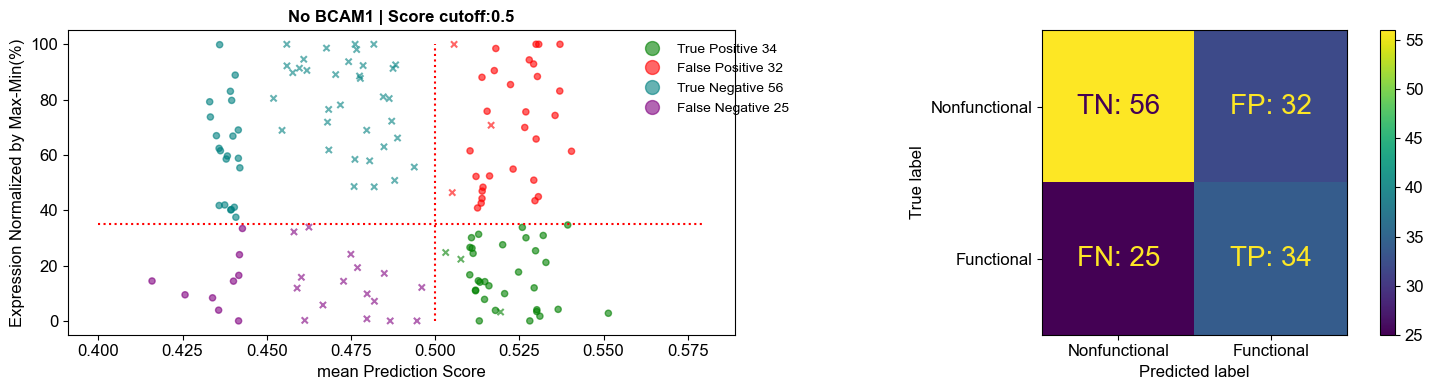

In [335]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)


bi_class_color_dict = {
    #(score,actual)
    (True,True):'green', # True Positive
    (True,False):'red', # False Positive
    (False,False):'teal', # True Negative
    (False,True):'purple',# False Negative
    
}

bi_class_label_dict = {
    #(score,actual)
    (True,True):'True Positive',
    (True,False):'False Positive',
    (False,False):'True Negative',
    (False,True):'False Negative',
}


# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:
for sc_ in ['mean_pred_score']:
    
    prob_co__ = 0.5#0.519
    axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    exp_co__ = 35
    axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    class_color_ls_new_ = df_old_new[(df_old_new['old_screen_or_new'] == 'new') & (df_old_new['gene'] != 'BCAM1') ].apply(lambda x: bi_class_color_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)
    class_label_ls_new = df_old_new[(df_old_new['old_screen_or_new'] == 'new') & (df_old_new['gene'] != 'BCAM1')].apply(lambda x: bi_class_label_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)

    class_color_ls_old_ = df_old_new[(df_old_new['old_screen_or_new'] == 'old') & (df_old_new['gene'] != 'BCAM1') ].apply(lambda x: bi_class_color_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)
    class_label_ls_old = df_old_new[(df_old_new['old_screen_or_new'] == 'old') & (df_old_new['gene'] != 'BCAM1')].apply(lambda x: bi_class_label_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)

    class_label_ls_both = pd.core.series.Series(list(class_label_ls_old)+list(class_label_ls_new))
    
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)
    
    df_old_new[ (df_old_new['old_screen_or_new'] == 'old')& (df_old_new['gene'] != 'BCAM1')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='x',
        alpha=0.6,
        c=class_color_ls_old_,
    
        ax=axs[0],
    )
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')& (df_old_new['gene'] != 'BCAM1')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        c=class_color_ls_new_,
    
        ax=axs[0],
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    legend_elements = []
    for k in bi_class_label_dict.keys():
        legend_elements.append(Line2D([0],[0],color=bi_class_color_dict[k],marker='o',linestyle='None',markersize=10,label=bi_class_label_dict[k]+' '+str(class_label_ls_both.value_counts()[bi_class_label_dict[k]]),alpha=0.6))
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=False,fontsize=10,bbox_to_anchor=(1.1,1))
    
    axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
    axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel(sc_.split('_')[0]+' Prediction Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')

    # Recompute confusion matrix
    cm = confusion_matrix(df_old_new[ (df_old_new['gene'] != 'BCAM1') ]['normalized_expression_percent'].apply(lambda x: x <= exp_co__) ,
             df_old_new[  (df_old_new['gene'] != 'BCAM1') ][sc_].apply(lambda x: x > prob_co__) )
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])

    # Adjust font size for the values inside the matrix
    disp.plot(ax=axs[1])
    for txt,l_ in zip( axs[1].texts,['TN','FP','FN','TP']):
        txt.set_fontsize(20)
        txt.set_text(l_+': '+txt.get_text())
            
    axs[0].set_title('No BCAM1 | Score cutoff:'+str(prob_co__),fontweight='bold')#sc_.split('_')[0]+" Score Predictions \n("+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)',fontweight='bold')

    
## Save Figure
fnm_final_ = 'NO-BCAM1+OLD_probco-'+str(prob_co__)+'_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                

In [324]:
class_label_ls_both

0      NaN
1      NaN
3      NaN
5      NaN
6      NaN
      ... 
193    NaN
194    NaN
195    NaN
196    NaN
197    NaN
Length: 147, dtype: object

Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	probco-0.525_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.png
	probco-0.525_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval.svg


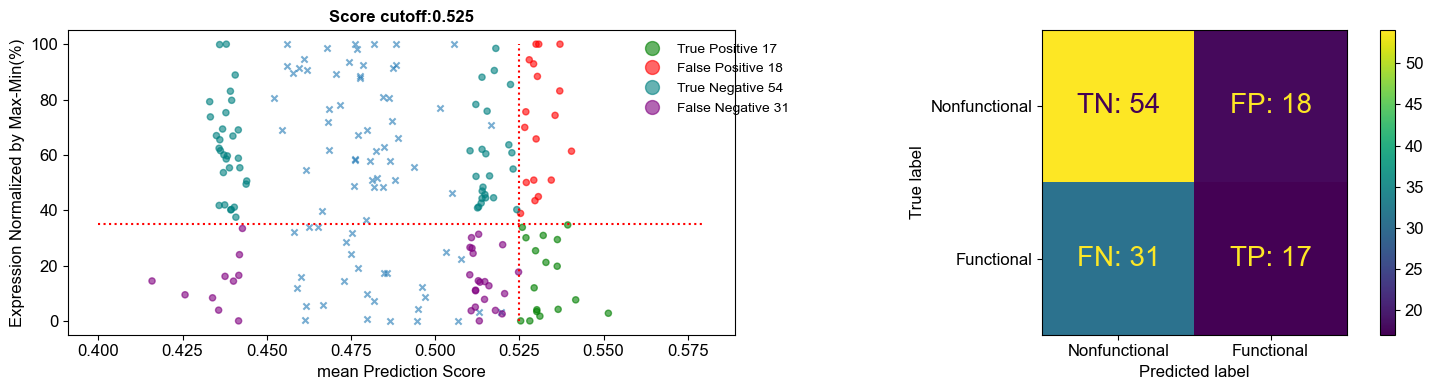

In [279]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)


bi_class_color_dict = {
    #(score,actual)
    (True,True):'green', # True Positive
    (True,False):'red', # False Positive
    (False,False):'teal', # True Negative
    (False,True):'purple',# False Negative
    
}

bi_class_label_dict = {
    #(score,actual)
    (True,True):'True Positive',
    (True,False):'False Positive',
    (False,False):'True Negative',
    (False,True):'False Negative',
}


# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:
for sc_ in ['mean_pred_score']:
    
    prob_co__ = 0.525
    axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
    
    exp_co__ = 35
    axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    
    # class_color_ls_new_ = df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['normalized_expression_percent'].apply(lambda x: class_color_dict[int(x <= exp_co__)]) 

    class_color_ls_new_ = df_old_new[(df_old_new['old_screen_or_new'] == 'new')].apply(lambda x: bi_class_color_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)
    class_label_ls_new = df_old_new[(df_old_new['old_screen_or_new'] == 'new')].apply(lambda x: bi_class_label_dict[(
                                                             x['mean_pred_score']>=prob_co__,
                                                             x['normalized_expression_percent']<exp_co__)], axis=1)
    fig,axs = plt.subplots(1,2)
    fig.set_size_inches(w=15,h=4)
    
    df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='x',
        alpha=0.6,
        #c=colors_ls_new_screen,
    
        ax=axs[0],
    )
    
    
    df_old_new[(df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
        
        x=sc_,
        # x='score_avg_probabilities',
        # x = 'score_max_probabilities',
        # x='position',
    
        # y='avg_raw_expression_percent',
        y='normalized_expression_percent',
        marker='o',
        alpha=0.6,
        c=class_color_ls_new_,
    
        ax=axs[0],
    )
    
    # Legend
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    legend_elements = []
    for k in bi_class_label_dict.keys():
        legend_elements.append(Line2D([0],[0],color=bi_class_color_dict[k],marker='o',linestyle='None',markersize=10,label=bi_class_label_dict[k]+' '+str(class_label_ls_new.value_counts()[bi_class_label_dict[k]]),alpha=0.6))
    axs[0].legend(handles=legend_elements,loc='upper right',frameon=False,fontsize=10,bbox_to_anchor=(1.1,1))
    
    axs[0].vlines(x=prob_co__,ymin=0,ymax=100,linestyle='dotted',color='red')
    axs[0].hlines(y=exp_co__,xmin=0.4,xmax=0.58,linestyle='dotted',color='red')
    

    
    # axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')
    
    axs[0].set_xlabel(sc_.split('_')[0]+' Prediction Score')
    axs[0].set_ylabel('Expression Normalized by Max-Min(%)')

    # Recompute confusion matrix
    cm = confusion_matrix(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]['normalized_expression_percent'].apply(lambda x: x <= exp_co__) ,
             df_old_new[ (df_old_new['old_screen_or_new'] == 'new')][sc_].apply(lambda x: x > prob_co__) )
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["Nonfunctional","Functional"])

    # Adjust font size for the values inside the matrix
    disp.plot(ax=axs[1])
    for txt,l_ in zip( axs[1].texts,['TN','FP','FN','TP']):
        txt.set_fontsize(20)
        txt.set_text(l_+': '+txt.get_text())
            
    axs[0].set_title('Score cutoff:'+str(prob_co__),fontweight='bold')#sc_.split('_')[0]+" Score Predictions \n("+str(len(df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]))+' siRNAs)',fontweight='bold')

    
## Save Figure
fnm_final_ = 'probco-'+str(prob_co__)+'_new_screen_only-mean-score_plot_conf-mtx_AND_score-vs-expression_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                

# Compute distance scores

'20'

Text(0, 0.5, 'Expression Normalized by Max-Min(%)')

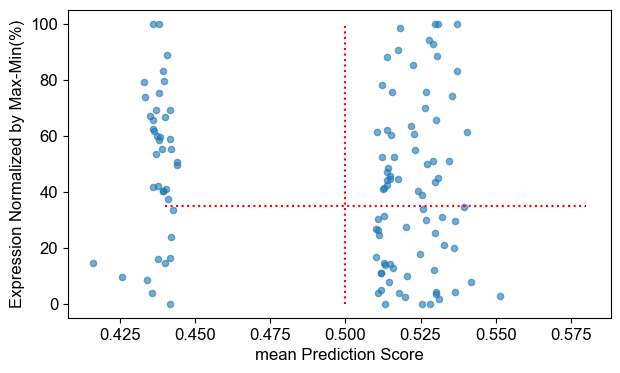

In [913]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:


fig,ax= plt.subplots()
fig.set_size_inches(w=7,h=4)

# df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
    
#     x='mean_pred_score',
#     # x='score_avg_probabilities',
#     # x = 'score_max_probabilities',
#     # x='position',

#     # y='avg_raw_expression_percent',
#     y='normalized_expression_percent',
#     marker='x',
#     alpha=0.6,
#     #c=colors_ls_new_screen,

#     ax=ax,
# )




df_old_new[ (df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
    
    x='mean_pred_score',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='o',
    alpha=0.6,
    #c=colors_ls_new_screen,

    ax=ax,
)


axs[0].vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')


axs[0].hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')


# axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')

axs[0].set_xlabel(sc_.split('_')[0]+' Prediction Score')
axs[0].set_ylabel('Expression Normalized by Max-Min(%)')



                 

Text(0, 0.5, 'Expression Normalized by Max-Min(%)')

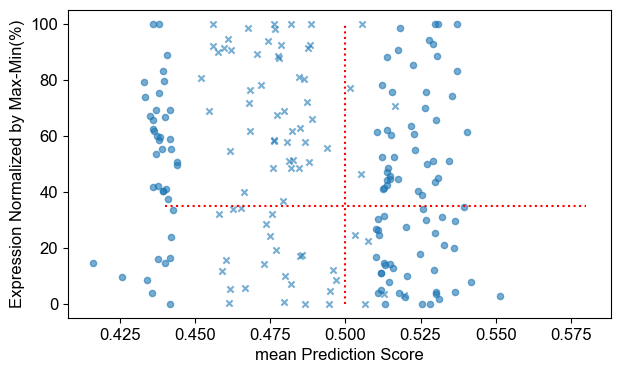

In [368]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# sklearn.metrics.confusion_matrix(y_true,y_pred)#,*,labels=None,sample_weight=None,normalize=None)






# for sc_ in ['max_pred_score','min_pred_score','q25_pred_score','q75_pred_score','median_pred_score','mean_pred_score']:


fig,ax= plt.subplots()
fig.set_size_inches(w=7,h=4)

df_old_new[ (df_old_new['old_screen_or_new'] == 'old')].plot.scatter(
    
    x='mean_pred_score',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='x',
    alpha=0.6,
    #c=colors_ls_new_screen,

    ax=ax,
)




df_old_new[ (df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
    
    x='mean_pred_score',
    # x='score_avg_probabilities',
    # x = 'score_max_probabilities',
    # x='position',

    # y='avg_raw_expression_percent',
    y='normalized_expression_percent',
    marker='o',
    alpha=0.6,
    #c=colors_ls_new_screen,

    ax=ax,
)


ax.vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')


ax.hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')


# axs[0].set_title(gene_,color=gene_color_dict[gene_],fontweight='bold')

ax.set_xlabel(sc_.split('_')[0]+' Prediction Score')
ax.set_ylabel('Expression Normalized by Max-Min(%)')



                 

In [283]:
df_old_new.to_csv('combined_old_and_new_experimental_validations_ssrf_model_screening_data.csv',index=False)

# Plot Precision-Recall Curve

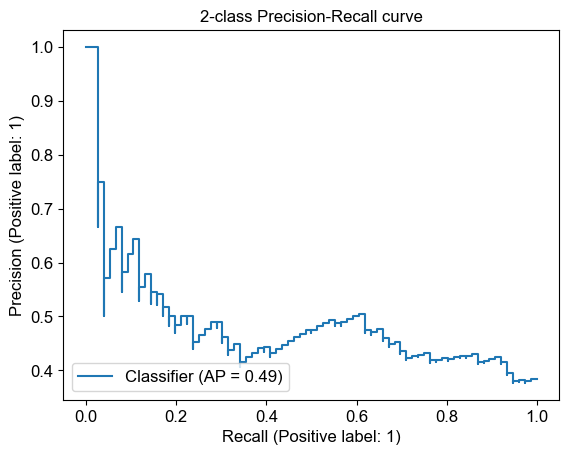

In [288]:
df_old_new[['normalized_expression_percent','mean_pred_score']]
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(
    df_old_new['normalized_expression_percent'].apply(lambda x: int(x<=35)), df_old_new['mean_pred_score'])#, plot_chance_level=True, despine=True
_ = display.ax_.set_title("2-class Precision-Recall curve")


Text(0, 0.5, 'Precision')

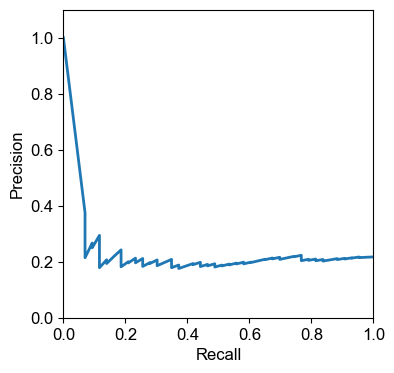

In [316]:
from sklearn.metrics import precision_recall_curve

p,r,t = precision_recall_curve(
    df_old_new['mean_pred_score'].apply(lambda x: int(x>=.52)),
    df_old_new['normalized_expression_percent'],
)

fig,ax= plt.subplots()
fig.set_size_inches(w=4,h=4)
ax.plot(r,p,linewidth=2)

ax.set_ylim(0,1.1)
ax.set_xlim(0,1)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')


In [366]:
from sklearn.metrics import f1_score
b_=0.5
while b_ < 0.54:
    for e_ in [15,20,25,30,35]:#,37]:
        
        f_ = f1_score(df_old_new[(df_old_new['gene'] != 'BCAM1')]['normalized_expression_percent'].apply(lambda x: int(x<=e_)), 
                       df_old_new[(df_old_new['gene'] != 'BCAM1')]['mean_pred_score'].apply(lambda x: int(x>b_)))
        if f_ >= 0.54:
            print(b_,e_,f_)
    b_ = b_+0.0005





0.5 35 0.5439999999999999
0.5005 35 0.5439999999999999
0.5009999999999999 35 0.5439999999999999
0.5014999999999998 35 0.5439999999999999
0.5019999999999998 35 0.5439999999999999
0.5024999999999997 35 0.5439999999999999
0.5029999999999997 35 0.5439999999999999
0.5059999999999993 35 0.5409836065573771
0.5064999999999993 35 0.5409836065573771
0.5069999999999992 35 0.5409836065573771
0.5074999999999992 35 0.5409836065573771


In [365]:
from sklearn.metrics import f1_score
b_=0.5
while b_ < 0.54:
    for e_ in [15,20,25,30,35]:#,37]:
        
        f_ = f1_score(df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['normalized_expression_percent'].apply(lambda x: int(x<=e_)), 
                       df_old_new[(df_old_new['old_screen_or_new'] == 'new')]['mean_pred_score'].apply(lambda x: int(x>b_)))
        if f_ >= 0.54:
            print(b_,e_,f_)
    b_ = b_+0.0005




0.5 35 0.5937499999999999
0.5005 35 0.5937499999999999
0.5009999999999999 35 0.5937499999999999
0.5014999999999998 35 0.5937499999999999
0.5019999999999998 35 0.5937499999999999
0.5024999999999997 35 0.5937499999999999
0.5029999999999997 35 0.5937499999999999
0.5034999999999996 35 0.5937499999999999
0.5039999999999996 35 0.5937499999999999
0.5044999999999995 35 0.5937499999999999
0.5049999999999994 35 0.5937499999999999
0.5054999999999994 35 0.5937499999999999
0.5059999999999993 35 0.5937499999999999
0.5064999999999993 35 0.5937499999999999
0.5069999999999992 35 0.5937499999999999
0.5074999999999992 35 0.5937499999999999
0.5079999999999991 35 0.5937499999999999
0.5084999999999991 35 0.5937499999999999
0.508999999999999 35 0.5937499999999999
0.509499999999999 35 0.5937499999999999
0.5099999999999989 35 0.5937499999999999
0.5104999999999988 35 0.5760000000000001
0.5109999999999988 35 0.540983606557377


In [364]:
from sklearn.metrics import f1_score
b_=0.5
while b_ < 0.54:
    for e_ in [15,20,25,30,35]:#,37]:
        
        f_ = f1_score(df_old_new[(df_old_new['old_screen_or_new'] == 'new')&(df_old_new['gene'] != 'BCAM1')]['normalized_expression_percent'].apply(lambda x: int(x<=e_)), 
                       df_old_new[(df_old_new['old_screen_or_new'] == 'new')&(df_old_new['gene'] != 'BCAM1')]['mean_pred_score'].apply(lambda x: int(x>b_)))
        if f_ >= 0.54:
            print(b_,e_,f_)
    b_ = b_+0.0005




0.5 35 0.62
0.5005 35 0.62
0.5009999999999999 35 0.62
0.5014999999999998 35 0.62
0.5019999999999998 35 0.62
0.5024999999999997 35 0.62
0.5029999999999997 35 0.62
0.5034999999999996 35 0.62
0.5039999999999996 35 0.62
0.5044999999999995 35 0.62
0.5049999999999994 35 0.62
0.5054999999999994 35 0.62
0.5059999999999993 35 0.62
0.5064999999999993 35 0.62
0.5069999999999992 35 0.62
0.5074999999999992 35 0.62
0.5079999999999991 35 0.62
0.5084999999999991 35 0.62
0.508999999999999 35 0.62
0.509499999999999 35 0.62
0.5099999999999989 35 0.62
0.5104999999999988 35 0.5979381443298969
0.5109999999999988 35 0.5684210526315789
0.5114999999999987 35 0.553191489361702
0.5119999999999987 35 0.553191489361702


Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	precision-recall-curve_all_data_normalized_experimental_eval.png
	precision-recall-curve_all_data_normalized_experimental_eval.svg


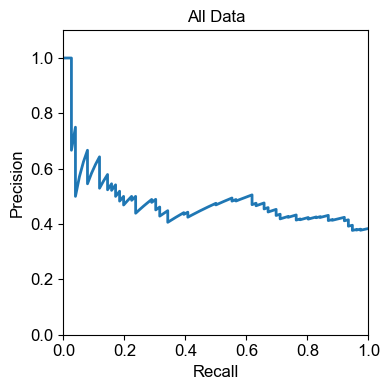

In [340]:
from sklearn.metrics import precision_recall_curve

p,r,t = precision_recall_curve(df_old_new['normalized_expression_percent'].apply(lambda x: int(x<=35)), df_old_new['mean_pred_score'])
fig,ax= plt.subplots()
fig.set_size_inches(w=4,h=4)
ax.plot(r,p,linewidth=2)

ax.set_ylim(0,1.1)
ax.set_xlim(0,1)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('All Data')

## Save Figure
fnm_final_ = 'precision-recall-curve_all_data_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                


Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	NEW-SCREEN-ONLY_precision-recall-curve_all_data_normalized_experimental_eval.png
	NEW-SCREEN-ONLY_precision-recall-curve_all_data_normalized_experimental_eval.svg


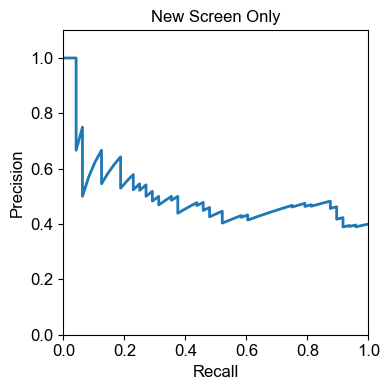

In [339]:
from sklearn.metrics import precision_recall_curve

p,r,t = precision_recall_curve(df_old_new[df_old_new['old_screen_or_new']=='new']['normalized_expression_percent'].apply(lambda x: int(x<=35)), df_old_new[df_old_new['old_screen_or_new']=='new']['mean_pred_score'])
fig,ax= plt.subplots()
fig.set_size_inches(w=4,h=4)
ax.plot(r,p,linewidth=2)

ax.set_ylim(0,1.1)
ax.set_xlim(0,1)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('New Screen Only')

## Save Figure
fnm_final_ = 'NEW-SCREEN-ONLY_precision-recall-curve_all_data_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                


Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	NO-BCAM1_precision-recall-curve_all_data_normalized_experimental_eval.png
	NO-BCAM1_precision-recall-curve_all_data_normalized_experimental_eval.svg


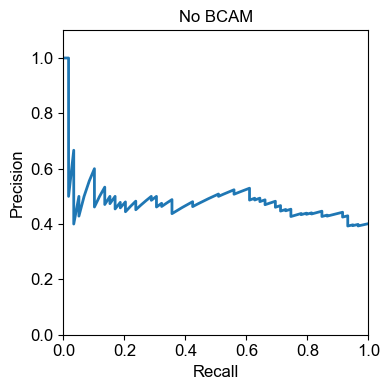

In [341]:
from sklearn.metrics import precision_recall_curve

p,r,t = precision_recall_curve(df_old_new[df_old_new['gene']!='BCAM1']['normalized_expression_percent'].apply(lambda x: int(x<=35)), df_old_new[df_old_new['gene']!='BCAM1']['mean_pred_score'])
fig,ax= plt.subplots()
fig.set_size_inches(w=4,h=4)
ax.plot(r,p,linewidth=2)

ax.set_ylim(0,1.1)
ax.set_xlim(0,1)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('No BCAM')

## Save Figure
fnm_final_ = 'NO-BCAM1_precision-recall-curve_all_data_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                


Figures saved to:
  /Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/
	NEW-SCREEN-ONLY_NO-BCAM1_precision-recall-curve_all_data_normalized_experimental_eval.png
	NEW-SCREEN-ONLY_NO-BCAM1_precision-recall-curve_all_data_normalized_experimental_eval.svg


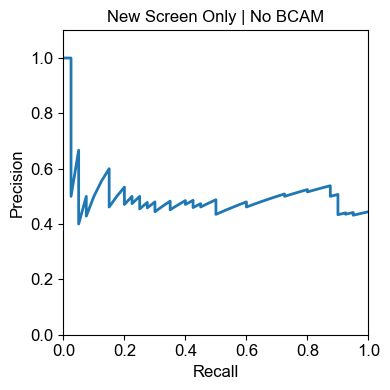

In [342]:
from sklearn.metrics import precision_recall_curve

p,r,t = precision_recall_curve(df_old_new[(df_old_new['gene']!='BCAM1') & (df_old_new['old_screen_or_new']=='new')]['normalized_expression_percent'].apply(lambda x: int(x<=35)), 
                               df_old_new[(df_old_new['gene']!='BCAM1') & (df_old_new['old_screen_or_new']=='new')]['mean_pred_score'])
fig,ax= plt.subplots()
fig.set_size_inches(w=4,h=4)
ax.plot(r,p,linewidth=2)

ax.set_ylim(0,1.1)
ax.set_xlim(0,1)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('New Screen Only | No BCAM')

## Save Figure
fnm_final_ = 'NEW-SCREEN-ONLY_NO-BCAM1_precision-recall-curve_all_data_normalized_experimental_eval'

fnm_final_dir_ = '/Users/kmonopoli/Dropbox (UMass Medical School)/sirna_design_algorithm_paper/figures/python_code_to_make_figures/plots/'
fig.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
fig.savefig(fnm_final_dir_+fnm_final_+'.svg',format='svg',transparent=True)
fig.savefig(fnm_final_dir_+fnm_final_+'.png',format='png',dpi=300,transparent=False)
print('Figures saved to:\n  '+fnm_final_dir_+'\n\t'+ fnm_final_ + '.png\n\t'+ fnm_final_ + '.svg')
                


In [308]:
help(ax.plot)

Help on method plot in module matplotlib.axes._axes:

plot(*args, scalex=True, scaley=True, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the ap

In [933]:
df_old_new['mean_prob_preds_norm_by_round']

0      69.90
1      68.14
2      65.88
3      62.73
4      62.05
       ...  
193    18.10
194    22.09
195    16.50
196    20.22
197    18.02
Name: mean_prob_preds_norm_by_round, Length: 198, dtype: float64

<AxesSubplot:>

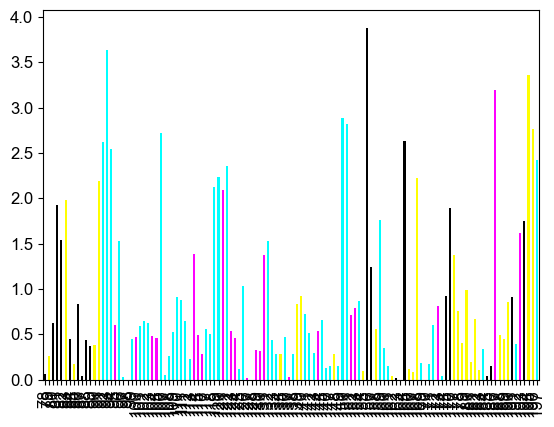

In [947]:

expr_thr_ = 35
prob_thr_ = 50
# Compute distance from thresholds
df_old_new['TESTING_threshold_score'] = df_old_new.apply(lambda x: ((x['normalized_expression_percent']*expr_thr_)/(x['mean_prob_preds_norm_by_round']*prob_thr_))
                 ,axis=1)

df_old_new['TESTING_threshold_score'] 



bool_color_dict = {
    (True,True):'black',(True,False):'magenta',(False,False):'cyan',(False,True):'yellow',
}

df_old_new.apply(lambda x: bool_color_dict[(x['actually_functional'],x['mean_prob_preds_norm_by_round'] > prob_thr_)],axis=1)


df_old_new[ (df_old_new['old_screen_or_new'] == 'new')]['TESTING_threshold_score'].plot.bar(
    color= df_old_new.apply(lambda x: bool_color_dict[(x['actually_functional'],x['mean_prob_preds_norm_by_round'] > prob_thr_)],axis=1) )





In [ ]:

fig,ax= plt.subplots()
fig.set_size_inches(w=7,h=4)

df_old_new[ (df_old_new['old_screen_or_new'] == 'new')].plot.scatter(
    
    x='mean_pred_score',
    y='normalized_expression_percent',
    marker='o',
    alpha=0.6,

    ax=ax,
)


ax.vlines(x=0.5,ymin=0,ymax=100,linestyle='dotted',color='red')

ax.hlines(y=35,xmin=0.44,xmax=0.58,linestyle='dotted',color='red')


ax.set_xlabel(sc_.split('_')[0]+' Prediction Score')
ax.set_ylabel('Expression Normalized by Max-Min(%)')



                 

In [948]:
df_old_new

oligo   gene  predicted_functional  actually_functional  \
0      MLH1_580   MLH1                  True                 True   
1      MLH1_578   MLH1                  True                False   
2    BCAM1_1030  BCAM1                  True                 True   
3     GYS1_3050   GYS1                  True                 True   
4     BCAM1_147  BCAM1                  True                 True   
..          ...    ...                   ...                  ...   
193   MSH3_4010   MSH3                 False                False   
194   MSH3_4035   MSH3                 False                False   
195   MSH3_4036   MSH3                 False                False   
196   MSH3_4068   MSH3                 False                False   
197   MSH3_4069   MSH3                 False                False   

     raw_prob_preds_1  raw_prob_preds_2  raw_prob_preds_3  raw_prob_preds_4  \
0            0.489886          0.522860          0.523478          0.521240   
1            0.510816          0.531920          0.507199          0.532700   
2            0.542173          0.522829          0.519606          0.524784   
3            0.530530          0.525590          0.520618          0.489031   
4            0.499403          0.509483          0.489794          0.527536   
..                ...               ...               ...               ...   
193          0.432268          0.411023          0.427649          0.423220   
194          0.434745          0.449677          0.411295          0.427558   
195          0.429446          0.449793          0.421434          0.425195   
196          0.443764          0.435206          0.432979          0.452194   
197          0.441492          0.439797          0.420430          0.429036   

     raw_prob_preds_5  raw_prob_preds_6  ...  prob_preds_norm_by_round_3  \
0            0.522266          0.537053  ...                        73.8   
1            0.509908          0.526346  ...                        64.3   
2            0.507740          0.507478  ...                        71.5   
3            0.505680          0.525554  ...                        72.1   
4            0.498614          0.493165  ...                        54.2   
..                ...               ...  ...                         ...   
193          0.442365          0.438566  ...                        18.1   
194          0.458531          0.464138  ...                         8.5   
195          0.432610          0.417311  ...                        14.4   
196          0.448816          0.456890  ...                        21.2   
197          0.432132          0.449837  ...                        13.9   

     prob_preds_norm_by_round_4  prob_preds_norm_by_round_5  \
0                          68.5                        70.9   
1                          74.7                        62.5   
2                          70.4                        61.1   
3                          51.2                        59.7   
4                          71.9                        54.9   
..                          ...                         ...   
193                        15.6                        16.7   
194                        18.0                        27.7   
195                        16.7                        10.1   
196                        31.3                        21.1   
197                        18.8                         9.8   

     prob_preds_norm_by_round_6  prob_preds_norm_by_round_7  \
0                          78.4                        75.5   
1                          72.2                        69.4   
2                          61.3                        53.6   
3                          71.7                        60.3   
4                          53.0                        63.4   
..                          ...                         ...   
193                        21.3                        24.8   
194                        36.2                         8.

# Export Combined (old and new) Experimental Data for Model evaluation

In [951]:
df_combined.columns

Index(['Oligo_position', 'Oligo_ID', 'Target_Region_Sequence_20mer',
       'Gene_region', 'GC_content', 'Revcomp_Guide', 'Oligo_ID_sense',
       'Oligo_ID_antisense', 'Score', 'Region', 'Hits2microRNA', 'refseq_seed',
       'hits2accessions', 'hits2gIDs', 'gIDs', 'Accessions', 'hits2mouse',
       'hits2mm', 'hits2mf', 'hits2human', 'hits2rat', 'gene_x', 'in_top',
       '16mer_in_screening_data', 'flanking_sequence', 'seqs_to_embed',
       'GloVe_embedded_sequences', 'raw_prob_preds_1', 'raw_prob_preds_2',
       'raw_prob_preds_3', 'raw_prob_preds_4', 'raw_prob_preds_5',
       'raw_prob_preds_6', 'raw_prob_preds_7', 'raw_prob_preds_8',
       'raw_prob_preds_9', 'raw_prob_preds_10', 'raw_probabilities_mean',
       'raw_probabilities_std', 'aver', 'max', 'Unnamed: 41', 'oligo_id_new',
       'oligo_name', 'gene_y', 'position', 'replicate_1', 'replicate_2',
       'replicate_3', 'avg_expression_percent', 'stdev_expression_percent',
       'NTC_1', 'NTC_2', 'NTC_3', 'NTC_avg', 'NT

In [952]:
df.columns

Index(['oligo', 'position', 'gene', 'Replicate_1', 'Replicate_2',
       'Replicate_3', 'avg_raw_expression_percent',
       'std_raw_expression_percent', 'normalized_expression_percent',
       'Oligo_position', 'Oligo_ID', 'Target_Region_Sequence_20mer',
       'Gene_region', 'GC_content', 'Revcomp_Guide', 'Oligo_ID_sense',
       'Oligo_ID_antisense', 'Score', 'Region', 'Hits2microRNA', 'refseq_seed',
       'hits2accessions', 'hits2gIDs', 'gIDs', 'Accessions', 'hits2mouse',
       'hits2mm', 'hits2mf', 'hits2human', 'hits2rat', 'in_top',
       'previously_screened_16mer', 'flanking_sequence', 'seqs_to_embed',
       'GloVe_embedded_sequences', 'raw_prob_preds_1', 'raw_prob_preds_2',
       'raw_prob_preds_3', 'raw_prob_preds_4', 'raw_prob_preds_5',
       'raw_prob_preds_6', 'raw_prob_preds_7', 'raw_prob_preds_8',
       'raw_prob_preds_9', 'raw_prob_preds_10', 'raw_probabilities_mean',
       'raw_probabilities_std', 'aver', 'max', 'unknown_AK_scoring',
       'std_norm_expressio

In [981]:
len(model_training_cols)

56

In [958]:
model_training_cols = ['oligo_name,gene,transcript_region,position,accession_numbers,person_screened,species,chemical_scaffold,sense_modifications,antisense_modifications,sense_sequence,antisense_sequence,20mer_targeting_region,gene_region,16mer_complementary_region,expression_replicate_1,expression_replicate_2,expression_replicate_3,expression_percent,standard_deviation,expression_percent_normalized_by_max_min,expression_percent_normalized_by_z_score,standard_deviation_normalized_by_subtracting_mean,ntc_replicate_1,ntc_replicate_2,ntc_replicate_3,ntc_percent,ntc_stdev,untreated_cells_replicate_1,untreated_cells_replicate_2,untreated_cells_replicate_3,untreated_cells_percent,untreated_cells_stdev,screen_type,cell_line,date_screened,comments,source_file,gene_,gene-species,cleaned_bdna_p2p3p5_human-mouse,has_multi_targ_acc,single_acc,all_accessions_from_ncbi,flanking_sequence_1,flanking_sequence_2,flanking_sequence_3,flanking_sequence_4,flanking_sequence_5,flanking_sequence_6,flanking_sequence_7,flanking_sequence_8,mismatch_16mer_for_flanks,experiment_name,duplicate_best,class'
]

for i in range(len(model_training_cols)):
    print(i+1,model_training_cols[i])

# print(model_training_cols)

1 oligo_name
2 gene
3 transcript_region
4 position
5 accession_numbers
6 person_screened
7 species
8 chemical_scaffold
9 sense_modifications
10 antisense_modifications
11 sense_sequence
12 antisense_sequence
13 20mer_targeting_region
14 gene_region
15 16mer_complementary_region
16 expression_replicate_1
17 expression_replicate_2
18 expression_replicate_3
19 expression_percent
20 standard_deviation
21 expression_percent_normalized_by_max_min
22 expression_percent_normalized_by_z_score
23 standard_deviation_normalized_by_subtracting_mean
24 ntc_replicate_1
25 ntc_replicate_2
26 ntc_replicate_3
27 ntc_percent
28 ntc_stdev
29 untreated_cells_replicate_1
30 untreated_cells_replicate_2
31 untreated_cells_replicate_3
32 untreated_cells_percent
33 untreated_cells_stdev
34 screen_type
35 cell_line
36 date_screened
37 comments
38 source_file
39 gene_
40 gene-species
41 cleaned_bdna_p2p3p5_human-mouse
42 has_multi_targ_acc
43 single_acc
44 all_accessions_from_ncbi
45 flanking_sequence_1
46 flanki

In [966]:
df.columns

Index(['oligo', 'position', 'gene', 'Replicate_1', 'Replicate_2',
       'Replicate_3', 'avg_raw_expression_percent',
       'std_raw_expression_percent', 'normalized_expression_percent',
       'Oligo_position', 'Oligo_ID', 'Target_Region_Sequence_20mer',
       'Gene_region', 'GC_content', 'Revcomp_Guide', 'Oligo_ID_sense',
       'Oligo_ID_antisense', 'Score', 'Region', 'Hits2microRNA', 'refseq_seed',
       'hits2accessions', 'hits2gIDs', 'gIDs', 'Accessions', 'hits2mouse',
       'hits2mm', 'hits2mf', 'hits2human', 'hits2rat', 'in_top',
       'previously_screened_16mer', 'flanking_sequence', 'seqs_to_embed',
       'GloVe_embedded_sequences', 'raw_prob_preds_1', 'raw_prob_preds_2',
       'raw_prob_preds_3', 'raw_prob_preds_4', 'raw_prob_preds_5',
       'raw_prob_preds_6', 'raw_prob_preds_7', 'raw_prob_preds_8',
       'raw_prob_preds_9', 'raw_prob_preds_10', 'raw_probabilities_mean',
       'raw_probabilities_std', 'aver', 'max', 'unknown_AK_scoring',
       'std_norm_expressio

In [972]:
df['flanking_sequence']

5      CACCGGCCCAGGCGCGCGGGGCCCCGCGGCTGCTGTTGCTCGCAGT...
6      ACCGGCCCAGGCGCGCGGGGCCCCGCGGCTGCTGTTGCTCGCAGTC...
24     TGCAGGGCTCTGAGCTCCAGGTCACAATGCACGACACCCGGGGCCG...
25     AAGATCACGTGGTATCGCAACGGGCAGCGCCTGGAGGTGCCCGTAG...
26     TAGAGATGAACCCAGAGGGCTACATGACCAGCCGCACGGTCCGGGA...
                             ...                        
109    CACCAAGAACATAAGAATTTTTTATAAGTAGAAAGAATTGGCCAGG...
110    AAGTAGAAAGAATTGGCCAGGCATGGTGGCTCATGCCTGTAATCCC...
111    AGTAGAAAGAATTGGCCAGGCATGGTGGCTCATGCCTGTAATCCCA...
112    TGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTAGGCAGATCACC...
113    GCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTAGGCAGATCACCT...
Name: flanking_sequence, Length: 120, dtype: object

In [974]:
df['nan_placeholder'] = np.NaN
df['nan_placeholder']

5     NaN
6     NaN
24    NaN
25    NaN
26    NaN
       ..
109   NaN
110   NaN
111   NaN
112   NaN
113   NaN
Name: nan_placeholder, Length: 120, dtype: float64

In [973]:
df[['oligo','gene']]

oligo   gene
5    BCAM1_139  BCAM1
6    BCAM1_140  BCAM1
24   BCAM1_370  BCAM1
25   BCAM1_666  BCAM1
26   BCAM1_709  BCAM1
..         ...    ...
109  MSH3_4010   MSH3
110  MSH3_4035   MSH3
111  MSH3_4036   MSH3
112  MSH3_4068   MSH3
113  MSH3_4069   MSH3

[120 rows x 2 columns]

In [975]:
df['comments'] = ['for_ssrf_model_eval_round_2']*len(df)
df['comments']

5      for_ssrf_model_eval_round_2
6      for_ssrf_model_eval_round_2
24     for_ssrf_model_eval_round_2
25     for_ssrf_model_eval_round_2
26     for_ssrf_model_eval_round_2
                  ...             
109    for_ssrf_model_eval_round_2
110    for_ssrf_model_eval_round_2
111    for_ssrf_model_eval_round_2
112    for_ssrf_model_eval_round_2
113    for_ssrf_model_eval_round_2
Name: comments, Length: 120, dtype: object

In [976]:
df['screen_type'] = ['bDNA']*len(df)
df['screen_type']

5      bDNA
6      bDNA
24     bDNA
25     bDNA
26     bDNA
       ... 
109    bDNA
110    bDNA
111    bDNA
112    bDNA
113    bDNA
Name: screen_type, Length: 120, dtype: object

In [977]:
df['person_screened'] = ['Katie Gross']*len(df)
df['person_screened']

5      Katie Gross
6      Katie Gross
24     Katie Gross
25     Katie Gross
26     Katie Gross
          ...     
109    Katie Gross
110    Katie Gross
111    Katie Gross
112    Katie Gross
113    Katie Gross
Name: person_screened, Length: 120, dtype: object

In [978]:
df['species'] = ['human']*len(df)
df['species']

5      human
6      human
24     human
25     human
26     human
       ...  
109    human
110    human
111    human
112    human
113    human
Name: species, Length: 120, dtype: object

In [979]:
df['chemical_scaffold'] = ['P3']*len(df)
df['chemical_scaffold']

5      P3
6      P3
24     P3
25     P3
26     P3
       ..
109    P3
110    P3
111    P3
112    P3
113    P3
Name: chemical_scaffold, Length: 120, dtype: object

In [982]:
# 1 oligo_name
exper_df_to_export_ = df[['oligo',
# 2 gene
'gene',
# 3 transcript_region
'nan_placeholder',
# 4 position
'position',
# 5 accession_numbers
'Accessions',
# 6 person_screened
'person_screened',
# 7 species
'species',
# 8 chemical_scaffold
'chemical_scaffold',
# 9 sense_modifications
'nan_placeholder',
# 10 antisense_modifications
'nan_placeholder',
# 11 sense_sequence
'nan_placeholder',
# 12 antisense_sequence
'nan_placeholder',
# 13 20mer_targeting_region
'Target_Region_Sequence_20mer',
# 14 gene_region
'Gene_region',
# 15 16mer_complementary_region
'refseq_seed',
# 16 expression_replicate_1 
'Replicate_1',
# 17 expression_replicate_2
'Replicate_2',
# 18 expression_replicate_3
'Replicate_3',
# 19 expression_percent
'avg_raw_expression_percent',
# 20 standard_deviation
'std_raw_expression_percent',
# 21 expression_percent_normalized_by_max_min
'normalized_expression_percent',
# 22 expression_percent_normalized_by_z_score
'nan_placeholder',
# 23 standard_deviation_normalized_by_subtracting_mean
'nan_placeholder',
# 24 ntc_replicate_1
'nan_placeholder',
# 25 ntc_replicate_2
'nan_placeholder',
# 26 ntc_replicate_3
'nan_placeholder',
# 27 ntc_percent
'nan_placeholder',
# 28 ntc_stdev
'nan_placeholder',
# 29 untreated_cells_replicate_1
'nan_placeholder',
# 30 untreated_cells_replicate_2
'nan_placeholder',
# 31 untreated_cells_replicate_3
'nan_placeholder',
# 32 untreated_cells_percent
'nan_placeholder',
# 33 untreated_cells_stdev
'nan_placeholder',
# 34 screen_type
'screen_type',
# 35 cell_line
'nan_placeholder',
# 36 date_screened
'nan_placeholder',
# 37 comments
'comments',
# 38 source_file
'nan_placeholder',
# 39 gene_
'nan_placeholder',
# 40 gene-species
'nan_placeholder',
# 41 cleaned_bdna_p2p3p5_human-mouse
'nan_placeholder',
# 42 has_multi_targ_acc
'nan_placeholder',
# 43 single_acc
'nan_placeholder',
# 44 all_accessions_from_ncbi
'nan_placeholder',
# 45 flanking_sequence_1
'flanking_sequence',
# 46 flanking_sequence_2
'nan_placeholder',
# 47 flanking_sequence_3
'nan_placeholder',
# 48 flanking_sequence_4
'nan_placeholder',
# 49 flanking_sequence_5
'nan_placeholder',
# 50 flanking_sequence_6
'nan_placeholder',
# 51 flanking_sequence_7
'nan_placeholder',
# 52 flanking_sequence_8
'nan_placeholder',
# 53 mismatch_16mer_for_flanks
'nan_placeholder',
# 54 experiment_name
'nan_placeholder',
# 55 duplicate_best
'nan_placeholder',
# 56 class
'nan_placeholder']].copy()


exper_df_to_export_


oligo   gene  nan_placeholder  position  \
5    BCAM1_139  BCAM1              NaN       139   
6    BCAM1_140  BCAM1              NaN       140   
24   BCAM1_370  BCAM1              NaN       370   
25   BCAM1_666  BCAM1              NaN       666   
26   BCAM1_709  BCAM1              NaN       709   
..         ...    ...              ...       ...   
109  MSH3_4010   MSH3              NaN      4010   
110  MSH3_4035   MSH3              NaN      4035   
111  MSH3_4036   MSH3              NaN      4036   
112  MSH3_4068   MSH3              NaN      4068   
113  MSH3_4069   MSH3              NaN      4069   

                                            Accessions person_screened  \
5                   NM_00000000;NM_005581;NM_001013257     Katie Gross   
6                   NM_00000000;NM_005581;NM_001013257     Katie Gross   
24                  NM_00000000;NM_005581;NM_001013257     Katie Gross   
25                  NM_00000000;NM_005581;NM_001013257     Katie Gross   
26                  NM_00000000;NM_005581;NM_001013257     Katie Gross   
..                                                 ...             ...   
109  XR_931597;XM_017006081;NM_001286793;NM_0012867...     Katie Gross   
110  XM_017008014;XM_017013969;NR_164652;NR_164651;...     Katie Gross   
111  XM_017008014;XM_017013969;NR_164652;NR_164651;...     Katie Gross   
112                                          NM_002439     Katie Gross   
113                                          NM_002439     Katie Gross   

    species chemical_scaffold  nan_placeholder  nan_placeholder  ...  \
5     human                P3              NaN              NaN  ...   
6     human                P3              NaN              NaN  ...   
24    human                P3              NaN              NaN  ...   
25    human                P3              NaN              NaN  ...   
26    human                P3              NaN              NaN  ...   
..      ...               ...              ...              ...  ...   
109   human                P3              NaN              NaN  ...   
110   human                P3              NaN              NaN  ...   
111   human                P3              NaN              NaN  ...   
112   human                P3              NaN              NaN  ...   
113   human                P3              NaN              NaN  ...   

     nan_placeholder  nan_placeholder  nan_placeholder  nan_placeholder  \
5                NaN              NaN              NaN              NaN   
6                NaN              NaN              NaN              NaN   
24               NaN              NaN              NaN              NaN   
25               NaN              NaN              NaN              NaN   
26               NaN              NaN              NaN              NaN   
..               ...              ...              ...              ...   
109              NaN              NaN              NaN              NaN   
110              NaN              NaN              NaN              NaN   
111              NaN              NaN              NaN              NaN   
112              NaN              NaN              NaN              NaN   
113              NaN              NaN              NaN              NaN   

     nan_placeholder  nan_placeholder  nan_placeholder  nan_placeholder  \
5                NaN              NaN              NaN              NaN   
6                NaN              NaN              NaN              NaN   
24               NaN              NaN              NaN              NaN   
25               NaN              NaN              NaN              NaN   
26               NaN              NaN              NaN              NaN   
..               ...              ...              ...              ...   
109              NaN              NaN              NaN              NaN   
110              NaN              NaN              NaN              NaN   
111              NaN              NaN              NaN

In [985]:
exper_df_to_export_.columns=model_training_cols

exper_df_to_export_


oligo_name   gene  transcript_region  position  \
5    BCAM1_139  BCAM1                NaN       139   
6    BCAM1_140  BCAM1                NaN       140   
24   BCAM1_370  BCAM1                NaN       370   
25   BCAM1_666  BCAM1                NaN       666   
26   BCAM1_709  BCAM1                NaN       709   
..         ...    ...                ...       ...   
109  MSH3_4010   MSH3                NaN      4010   
110  MSH3_4035   MSH3                NaN      4035   
111  MSH3_4036   MSH3                NaN      4036   
112  MSH3_4068   MSH3                NaN      4068   
113  MSH3_4069   MSH3                NaN      4069   

                                     accession_numbers person_screened  \
5                   NM_00000000;NM_005581;NM_001013257     Katie Gross   
6                   NM_00000000;NM_005581;NM_001013257     Katie Gross   
24                  NM_00000000;NM_005581;NM_001013257     Katie Gross   
25                  NM_00000000;NM_005581;NM_001013257     Katie Gross   
26                  NM_00000000;NM_005581;NM_001013257     Katie Gross   
..                                                 ...             ...   
109  XR_931597;XM_017006081;NM_001286793;NM_0012867...     Katie Gross   
110  XM_017008014;XM_017013969;NR_164652;NR_164651;...     Katie Gross   
111  XM_017008014;XM_017013969;NR_164652;NR_164651;...     Katie Gross   
112                                          NM_002439     Katie Gross   
113                                          NM_002439     Katie Gross   

    species chemical_scaffold  sense_modifications  antisense_modifications  \
5     human                P3                  NaN                      NaN   
6     human                P3                  NaN                      NaN   
24    human                P3                  NaN                      NaN   
25    human                P3                  NaN                      NaN   
26    human                P3                  NaN                      NaN   
..      ...               ...                  ...                      ...   
109   human                P3                  NaN                      NaN   
110   human                P3                  NaN                      NaN   
111   human                P3                  NaN                      NaN   
112   human                P3                  NaN                      NaN   
113   human                P3                  NaN                      NaN   

     ...  flanking_sequence_3  flanking_sequence_4 flanking_sequence_5  \
5    ...                  NaN                  NaN                 NaN   
6    ...                  NaN                  NaN                 NaN   
24   ...                  NaN                  NaN                 NaN   
25   ...                  NaN                  NaN                 NaN   
26   ...                  NaN                  NaN                 NaN   
..   ...                  ...                  ...                 ...   
109  ...                  NaN                  NaN                 NaN   
110  ...                  NaN                  NaN                 NaN   
111  ...                  NaN                  NaN                 NaN   
112  ...                  NaN                  NaN                 NaN   
113  ...                  NaN                  NaN                 NaN   

    flanking_sequence_6 flanking_sequence_7  flanking_sequence_8  \
5                   NaN                 NaN                  NaN   
6                   NaN                 NaN                  NaN   
24                  NaN                 NaN                  NaN   
25                  NaN                 NaN                  NaN   
26                  NaN                 NaN                  NaN   
..                  ...                 ...                  ...   
109                 NaN                 NaN                  NaN   
110                 NaN                 NaN                  NaN   
111             

In [986]:
exper_df_to_export_.to_csv('new_screen_model_evaluation_round_2_FEB-14-2025.csv',index=False)


In [ ]:
# 1 oligo_name
'oligo',
# 2 gene
'gene',
# 3 transcript_region
[np.NaN]*len(df),
# 4 position
'position',
# 5 accession_numbers
'Accessions',
# 6 person_screened
['Katie Gross']*len(df),
# 7 species
['human']*len(df),
# 8 chemical_scaffold
['P3']*len(df),
# 9 sense_modifications
[np.NaN]*len(df),
# 10 antisense_modifications
[np.NaN]*len(df),
# 11 sense_sequence
[np.NaN]*len(df),
# 12 antisense_sequence
[np.NaN]*len(df),
# 13 20mer_targeting_region
'Target_Region_Sequence_20mer',
# 14 gene_region
'Gene_region',
# 15 16mer_complementary_region
'refseq_seed',
# 16 expression_replicate_1 
'Replicate_1',
# 17 expression_replicate_2
'Replicate_2',
# 18 expression_replicate_3
'Replicate_3',
# 19 expression_percent
'avg_raw_expression_percent',
# 20 standard_deviation
'std_raw_expression_percent',
# 21 expression_percent_normalized_by_max_min
'normalized_expression_percent',
# 22 expression_percent_normalized_by_z_score
[np.NaN]*len(df),
# 23 standard_deviation_normalized_by_subtracting_mean
[np.NaN]*len(df),
# 24 ntc_replicate_1
[np.NaN]*len(df),
# 25 ntc_replicate_2
[np.NaN]*len(df),
# 26 ntc_replicate_3
[np.NaN]*len(df),
# 27 ntc_percent
[np.NaN]*len(df),
# 28 ntc_stdev
[np.NaN]*len(df),
# 29 untreated_cells_replicate_1
[np.NaN]*len(df),
# 30 untreated_cells_replicate_2
[np.NaN]*len(df),
# 31 untreated_cells_replicate_3
[np.NaN]*len(df),
# 32 untreated_cells_percent
[np.NaN]*len(df),
# 33 untreated_cells_stdev
[np.NaN]*len(df),
# 34 screen_type
['bDNA']*len(df),
# 35 cell_line
[np.NaN]*len(df),
# 36 date_screened
['Jan-15-2025']*len(df),
# 37 comments
['for_ssrf_model_eval_round_2']*len(df),
# 38 source_file
[np.NaN]*len(df),
# 39 gene_
[np.NaN]*len(df),
# 40 gene-species
[np.NaN]*len(df),
# 41 cleaned_bdna_p2p3p5_human-mouse
[np.NaN]*len(df),
# 42 has_multi_targ_acc
[np.NaN]*len(df),
# 43 single_acc
[np.NaN]*len(df),
# 44 all_accessions_from_ncbi
[np.NaN]*len(df),
# 45 flanking_sequence_1
'flanking_sequence',
# 46 flanking_sequence_2
[np.NaN]*len(df),
# 47 flanking_sequence_3
[np.NaN]*len(df),
# 48 flanking_sequence_4
[np.NaN]*len(df),
# 49 flanking_sequence_5
[np.NaN]*len(df),
# 50 flanking_sequence_6
[np.NaN]*len(df),
# 51 flanking_sequence_7
[np.NaN]*len(df),
# 52 flanking_sequence_8
[np.NaN]*len(df),
# 53 mismatch_16mer_for_flanks
[np.NaN]*len(df),
# 54 experiment_name
[np.NaN]*len(df),
# 55 duplicate_best
[np.NaN]*len(df),
# 56 class
[np.NaN]*len(df),



In [965]:
df['Target_Region_Sequence_20mer']

5      GCUGGUGGAGGUGAUGCGAG
6      CUGGUGGAGGUGAUGCGAGG
24     GGUGGGCGACGAGCGAGACU
25     UGCUCUCCCUCACCAGCACC
26     UGACCGAGACGCCAGCUUCC
               ...         
109    CACCUGAGGUCAGGAGUUCA
110    AGCCUGGCCAACAUGGCAAA
111    GCCUGGCCAACAUGGCAAAA
112    UAAAAAUAUAAAGUACAUCU
113    AAAAAUAUAAAGUACAUCUC
Name: Target_Region_Sequence_20mer, Length: 120, dtype: object

In [964]:
df.columns

Index(['oligo', 'position', 'gene', 'Replicate_1', 'Replicate_2',
       'Replicate_3', 'avg_raw_expression_percent',
       'std_raw_expression_percent', 'normalized_expression_percent',
       'Oligo_position', 'Oligo_ID', 'Target_Region_Sequence_20mer',
       'Gene_region', 'GC_content', 'Revcomp_Guide', 'Oligo_ID_sense',
       'Oligo_ID_antisense', 'Score', 'Region', 'Hits2microRNA', 'refseq_seed',
       'hits2accessions', 'hits2gIDs', 'gIDs', 'Accessions', 'hits2mouse',
       'hits2mm', 'hits2mf', 'hits2human', 'hits2rat', 'in_top',
       'previously_screened_16mer', 'flanking_sequence', 'seqs_to_embed',
       'GloVe_embedded_sequences', 'raw_prob_preds_1', 'raw_prob_preds_2',
       'raw_prob_preds_3', 'raw_prob_preds_4', 'raw_prob_preds_5',
       'raw_prob_preds_6', 'raw_prob_preds_7', 'raw_prob_preds_8',
       'raw_prob_preds_9', 'raw_prob_preds_10', 'raw_probabilities_mean',
       'raw_probabilities_std', 'aver', 'max', 'unknown_AK_scoring',
       'std_norm_expressio

In [ ]:
oligo_name,gene,transcript_region,position,accession_numbers,person_screened,species,chemical_scaffold,sense_modifications,antisense_modifications,sense_sequence,antisense_sequence,20mer_targeting_region,gene_region,16mer_complementary_region,expression_replicate_1,expression_replicate_2,expression_replicate_3,expression_percent,standard_deviation,expression_percent_normalized_by_max_min,expression_percent_normalized_by_z_score,standard_deviation_normalized_by_subtracting_mean,ntc_replicate_1,ntc_replicate_2,ntc_replicate_3,ntc_percent,ntc_stdev,untreated_cells_replicate_1,untreated_cells_replicate_2,untreated_cells_replicate_3,untreated_cells_percent,untreated_cells_stdev,screen_type,cell_line,date_screened,comments,source_file,gene_,gene-species,cleaned_bdna_p2p3p5_human-mouse,has_multi_targ_acc,single_acc,all_accessions_from_ncbi,flanking_sequence_1,flanking_sequence_2,flanking_sequence_3,flanking_sequence_4,flanking_sequence_5,flanking_sequence_6,flanking_sequence_7,flanking_sequence_8,mismatch_16mer_for_flanks,experiment_name,duplicate_best,class


###MSH6_NM_000179_2191,MSH6,,2191,NM_000179,Jillian Belgrad,human,P3,(mA)#(mA)#(mA)(fU)(mU)(fA)(mG)(fC)(mC)(fA)(mU)(mU)(mG)(fA)#(mU)#(mA)-TegChol,P(mU)#(fA)#(mU)(fC)(fA)(fA)(mU)(fG)(mG)(fC)(mU)(fA)(mA)(fU)#(mU)#(fU)#(mU)#(mG)#(mA)#(fA)#(mU),UAUCAAUGGCUAAUUUUGAAU,AAAUUAGCCAUUGAUA,UAUCAAUGGCUAAUUUUGAA,,CAATGGCTAATTTTGA,14.7742406,16.6266977,14.1465079,15.18248207,1.052878968,0.022029195,,,,,,,,,,,,,bDNA,HeLa,,P3 ("old",fm),Jillian_siRNAscreening_msh6_pold2_rrm2b_020824.xlsx,msh6,msh6-human,,FALSE,NM_000179,NM_001407362.1;NM_001406818.1;NM_001406819.1;NM_001406822.1;NM_001406827.1;NM_001406825.1;NM_001406821.1;NM_001406829.1;NM_001406824.1;NM_001406820.1;NM_001406823.1;NM_001406826.1;NM_001406828.1;NM_001406806.1;NM_001406798.1;NM_001406803.1;NM_001406804.1;NM_001406831.1;NM_001406805.1;NM_001406808.1,ATTCCATTGGGTTGACACCAGGAGAGAAAAGTGAATTGGCCCTCTCTGCTCTAGGTGGTTGTGTCTTCTACCTCAAAAAATGCCTTATTGATCAGGAGCTTTTATCAATGGCTAATTTTGAAGAATATATTCCCTTGGATTCTGACACAGTCAGCACTACAAGATCTGGTGCTATCTTCACCAAAGCCTATCAACGAATGGTGCTAGATGCAGTGACATTAAACAA,,,,,,,,16mer perfect match to target,MSH6_human_P3_HeLa_bDNA,,1



